In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
data =np.array([["Ezequiel_1", "'came', 'pass', 'thirtieth', 'year', ',', 'fourth', 'month', ',', 'fifth', 'day', 'month', ',', 'among', 'captives', 'river', 'chebar', ',', 'heavens', 'opened', ',', 'saw', 'visions', 'god.in', 'fifth', 'day', 'month', ',', 'fifth', 'year', 'king', 'jehoiachin', ', 'captivity', ',', 'word', 'lord', 'came', 'expressly', 'ezekiel', 'priest', ',', 'son', 'buzi', ',', 'land', 'chaldeans', 'river', 'chebar', ';', 'hand', 'lord', 'him.and', 'looked', ',', ',', 'behold', ',', 'whirlwind', 'came', 'north', ',', 'great', 'cloud', ',', 'fire', 'enfolding', ',', 'brightness', ',', 'middle', 'thereof', 'color', 'amber', ',', 'middle', 'fire.also', 'middle', 'thereof', 'came', 'likeness', 'four', 'living', 'creatures', '.', 'appearance', ';', 'likeness', 'man.and', 'every', 'one', 'four', 'faces', ',', 'every', 'one', 'four', 'wings.and', 'feet', 'straight', 'feet', ';', 'sole', 'feet', 'like', 'sole', 'calf', ', 'foot', ':', 'sparkled', 'like', 'color', 'burnished', 'brass.and', 'hands', 'man', 'wings', 'four', 'sides', ';', 'four', 'faces', 'wings.their', 'wings', 'joined', 'one', 'another', ';', 'turned', 'went', ';', 'went', 'every', 'one', 'straight', 'forward.as', 'likeness', 'faces', ',', 'four', 'face', 'man', ',', 'face', 'lion', ',', 'right', 'side', ':', 'four', 'face', 'ox', 'left', 'side', ';', 'four', 'also', 'face', 'eagle.thus', 'faces', ':', 'wings', 'stretched', 'upward', ';', 'two', 'wings', 'every', 'one', 'joined', 'one', 'another', ',', 'two', 'covered', 'bodies.and', 'went', 'every', 'one', 'straight', 'forward', ':', 'spirit', 'go', ',', 'went', ';', 'turned', 'went.as', 'likeness', 'living', 'creatures', ',', 'appearance', 'like', 'burning', 'coals', 'fire', ',', 'like', 'appearance', 'lamps', ':', 'went', 'among', 'living', 'creatures', ';', 'fire', 'bright', ',', 'fire', 'went', 'forth', 'lightning.and', 'living', 'creatures', 'ran', 'returned', 'appearance', 'flash', 'lightning.now', 'beheld', 'living', 'creatures', ',', 'behold', 'one', 'wheel', 'earth', 'living', 'creatures', ',', 'four', 'faces.the', 'appearance', 'wheels', 'work', 'like', 'color', 'beryl', ':', 'four', 'one', 'likeness', ':', 'appearance', 'work', 'wheel', 'middle', 'wheel.when', 'went', ',', 'went', 'four', 'sides', ':', 'turned', 'went.as', 'rings', ',', 'high', 'dreadful', ';', 'rings', 'full', 'eyes', 'round', 'four.and', 'living', 'creatures', 'went', ',', 'wheels', 'went', ':', 'living', 'creatures', 'lifted', 'earth', ',', 'wheels', 'lifted', 'up.wherever', 'spirit', 'go', ',', 'went', ',', 'thither', 'spirit', 'go', ';', 'wheels', 'lifted', ':', 'spirit', 'living', 'creature', 'wheels.when', 'went', ',', 'went', ';', 'stood', ',', 'stood', ';', 'lifted', 'earth', ',', 'wheels', 'lifted', ':', 'spirit', 'living', 'creature', 'wheels.and', 'likeness', 'firmament', 'heads', 'living', 'creature', 'color', 'terrible', 'crystal', ',', 'stretched', 'forth', 'heads', 'above.and', 'firmament', 'wings', 'straight', ',', 'one', 'toward', ':', 'every', 'one', 'two', ',', 'covered', 'side', ',', 'every', 'one', 'two', ',', 'covered', 'side', ',', 'bodies.and', 'went', ',', 'heard', 'noise', 'wings', ',', 'like', 'noise', 'great', 'waters', ',', 'voice', 'almighty', ',', 'voice', 'speech', ',', 'noise', 'host', ':', 'stood', ',', 'let', 'wings.and', 'voice', 'firmament', 'heads', ',', 'stood', ',', 'let', 'wings.and', 'firmament', 'heads', 'likeness', 'throne', ',', 'appearance', 'sapphire', 'stone', ':', 'likeness', 'throne', 'likeness', 'appearance', 'man', 'it.and', 'saw', 'color', 'amber', ',', 'appearance', 'fire', 'round', 'within', ',', 'appearance', 'loins', 'even', 'upward', ',', 'appearance', 'loins', 'even', 'downward', ',', 'saw', 'appearance', 'fire', ',', 'brightness', 'round', 'about.as', 'appearance', 'bow', 'cloud', 'day', 'rain', ',', 'appearance', 'brightness', 'round', '.', 'appearance', 'likeness', 'glory', 'lord', '.', 'saw', ',', 'fell', 'face', ',', 'heard', 'voice', 'one', 'spoke', '.'"],
               ["Ezequiel_2", "'said', ',', 'son', 'man', ',', 'stand', 'feet', ',', 'speak', 'you.and', 'spirit', 'entered', 'spoke', ',', 'set', 'feet', ',', 'heard', 'spoke', 'me.and', 'said', ',', 'son', 'man', ',', 'send', 'children', 'israel', ',', 'rebellious', 'nation', 'rebelled', ':', 'fathers', 'transgressed', ',', 'even', 'day.for', 'impudent', 'children', 'stiff', 'hearted', '.', 'send', ';', 'shall', 'say', ',', 'thus', 'said', 'lord', 'god.and', ',', 'whether', 'hear', ',', 'whether', 'forbear', ',', '(', 'rebellious', 'house', ',', ')', 'yet', 'shall', 'know', 'prophet', 'among', 'them.and', ',', 'son', 'man', ',', 'afraid', ',', 'neither', 'afraid', 'words', ',', 'though', 'briers', 'thorns', ',', 'dwell', 'among', 'scorpions', ':', 'afraid', 'words', ',', 'dismayed', 'looks', ',', 'though', 'rebellious', 'house.and', 'shall', 'speak', 'words', ',', 'whether', 'hear', ',', 'whether', 'forbear', ':', 'rebellious.but', ',', 'son', 'man', ',', 'hear', 'say', ';', 'rebellious', 'like', 'rebellious', 'house', ':', 'open', 'mouth', ',', 'eat', 'give', 'you.and', 'looked', ',', 'behold', ',', 'hand', 'sent', ';', ',', 'see', ',', 'roll', 'book', 'therein', ';', 'spread', ';', 'written', 'within', 'without', ':', 'written', 'therein', 'lamentations', ',', 'mourning', ',', 'woe', '.'"],
               ["Ezequiel_3", "'moreover', 'said', ',', 'son', 'man', ',', 'eat', 'find', ';', 'eat', 'roll', ',', 'go', 'speak', 'house', 'israel.so', 'opened', 'mouth', ',', 'caused', 'eat', 'roll.and', 'said', ',', 'son', 'man', ',', 'cause', 'belly', 'eat', ',', 'fill', 'bowels', 'roll', 'give', '.', 'eat', ';', 'mouth', 'honey', 'sweetness.and', 'said', ',', 'son', 'man', ',', 'go', ',', 'get', 'house', 'israel', ',', 'speak', 'words', 'them.for', 'sent', 'people', 'strange', 'speech', 'hard', 'language', ',', 'house', 'israel', ';', 'many', 'people', 'strange', 'speech', 'hard', 'language', ',', 'whose', 'words', 'understand', '.', 'surely', ',', 'sent', ',', 'would', 'listened', 'you.but', 'house', 'israel', 'listen', ';', 'listen', ':', 'house', 'israel', 'impudent', 'hardhearted.behold', ',', 'made', 'face', 'strong', 'faces', ',', 'forehead', 'strong', 'foreheads.as', 'adamant', 'harder', 'flint', 'made', 'forehead', ':', 'fear', ',', 'neither', 'dismayed', 'looks', ',', 'though', 'rebellious', 'house.moreover', 'said', ',', 'son', 'man', ',', 'words', 'shall', 'speak', 'receive', 'heart', ',', 'hear', 'ears.and', 'go', ',', 'get', 'captivity', ',', 'children', 'people', ',', 'speak', ',', 'tell', ',', 'thus', 'said', 'lord', 'god', ';', 'whether', 'hear', ',', 'whether', 'forbear.then', 'spirit', 'took', ',', 'heard', 'behind', 'voice', 'great', 'rushing', ',', 'saying', ',', 'blessed', 'glory', 'lord', 'place.i', 'heard', 'also', 'noise', 'wings', 'living', 'creatures', 'touched', 'one', 'another', ',', 'noise', 'wheels', ',', 'noise', 'great', 'rushing.so', 'spirit', 'lifted', ',', 'took', 'away', ',', 'went', 'bitterness', ',', 'heat', 'spirit', ';', 'hand', 'lord', 'strong', 'me.then', 'came', 'captivity', 'telabib', ',', 'dwelled', 'river', 'chebar', ',', 'sat', 'sat', ',', 'remained', 'astonished', 'among', 'seven', 'days.and', 'came', 'pass', 'end', 'seven', 'days', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'made', 'watchman', 'house', 'israel', ':', 'therefore', 'hear', 'word', 'mouth', ',', 'give', 'warning', 'me.when', 'say', 'wicked', ',', 'shall', 'surely', 'die', ';', 'give', 'warning', ',', 'speak', 'warn', 'wicked', 'wicked', 'way', ',', 'save', 'life', ';', 'wicked', 'man', 'shall', 'die', 'iniquity', ';', 'blood', 'require', 'hand.yet', 'warn', 'wicked', ',', 'turn', 'wickedness', ',', 'wicked', 'way', ',', 'shall', 'die', 'iniquity', ';', 'delivered', 'soul.again', ',', 'righteous', 'man', 'turn', 'righteousness', ',', 'commit', 'iniquity', ',', 'lay', 'stumbling-block', ',', 'shall', 'die', ':', 'given', 'warning', ',', 'shall', 'die', 'sin', ',', 'righteousness', 'done', 'shall', 'remembered', ';', 'blood', 'require', 'hand.nevertheless', 'warn', 'righteous', 'man', ',', 'righteous', 'sin', ',', 'sin', ',', 'shall', 'surely', 'live', ',', 'warned', ';', 'also', 'delivered', 'soul.and', 'hand', 'lord', ';', 'said', ',', 'arise', ',', 'go', 'forth', 'plain', ',', 'talk', 'you.then', 'arose', ',', 'went', 'forth', 'plain', ':', ',', 'behold', ',', 'glory', 'lord', 'stood', ',', 'glory', 'saw', 'river', 'chebar', ':', 'fell', 'face.then', 'spirit', 'entered', ',', 'set', 'feet', ',', 'spoke', ',', 'said', ',', 'go', ',', 'shut', 'within', 'house.but', ',', 'son', 'man', ',', 'behold', ',', 'shall', 'put', 'bands', ',', 'shall', 'bind', ',', 'shall', 'go', 'among', ':', 'make', 'tongue', 'sticks', 'roof', 'mouth', ',', 'shall', 'dumb', ',', 'shall', 'reprover', ':', 'rebellious', 'house.but', 'speak', ',', 'open', 'mouth', ',', 'shall', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'hears', ',', 'let', 'hear', ';', 'declines', ',', 'let', 'forbear', ':', 'rebellious', 'house', '.'"],
               ["Ezequiel_4", "'also', ',', 'son', 'man', ',', 'take', 'tile', ',', 'lay', ',', 'portray', 'city', ',', 'even', 'jerusalem', ':', 'lay', 'siege', ',', 'build', 'fort', ',', 'cast', 'mount', ';', 'set', 'camp', 'also', ',', 'set', 'battering', 'rams', 'round', 'about.moreover', 'take', 'iron', 'pan', ',', 'set', 'wall', 'iron', 'city', ':', 'set', 'face', ',', 'shall', 'besieged', ',', 'shall', 'lay', 'siege', '.', 'shall', 'sign', 'house', 'israel.lie', 'also', 'left', 'side', ',', 'lay', 'iniquity', 'house', 'israel', ':', 'according', 'number', 'days', 'shall', 'lie', 'shall', 'bear', 'iniquity.for', 'laid', 'years', 'iniquity', ',', 'according', 'number', 'days', ',', 'three', 'hundred', 'ninety', 'days', ':', 'shall', 'bear', 'iniquity', 'house', 'israel.and', 'accomplished', ',', 'lie', 'right', 'side', ',', 'shall', 'bear', 'iniquity', 'house', 'judah', 'forty', 'days', ':', 'appointed', 'day', 'year.therefore', 'shall', 'set', 'face', 'toward', 'siege', 'jerusalem', ',', 'arm', 'shall', 'uncovered', ',', 'shall', 'prophesy', 'it.and', ',', 'behold', ',', 'lay', 'bands', ',', 'shall', 'turn', 'one', 'side', 'another', ',', 'till', 'ended', 'days', 'siege.take', 'also', 'wheat', ',', 'barley', ',', 'beans', ',', 'lentils', ',', 'millet', ',', 'fitches', ',', 'put', 'one', 'vessel', ',', 'make', 'bread', 'thereof', ',', 'according', 'number', 'days', 'shall', 'lie', 'side', ',', 'three', 'hundred', 'ninety', 'days', 'shall', 'eat', 'thereof.and', 'meat', 'shall', 'eat', 'shall', 'weight', ',', 'twenty', 'shekels', 'day', ':', 'time', 'time', 'shall', 'eat', 'it.you', 'shall', 'drink', 'also', 'water', 'measure', ',', 'sixth', 'part', 'hin', ':', 'time', 'time', 'shall', 'drink.and', 'shall', 'eat', 'barley', 'cakes', ',', 'shall', 'bake', 'dung', 'comes', 'man', ',', 'sight.and', 'lord', 'said', ',', 'even', 'thus', 'shall', 'children', 'israel', 'eat', 'defiled', 'bread', 'among', 'gentiles', ',', 'drive', 'them.then', 'said', ',', 'ah', 'lord', 'god', '!', 'behold', ',', 'soul', 'polluted', ':', 'youth', 'even', 'till', 'eaten', 'dies', ',', 'torn', 'pieces', ';', 'neither', 'came', 'abominable', 'flesh', 'mouth.then', 'said', ',', 'see', ',', 'given', 'cow', ', 'dung', 'man', ', 'dung', ',', 'shall', 'prepare', 'bread', 'therewith.moreover', 'said', ',', 'son', 'man', ',', 'behold', ',', 'break', 'staff', 'bread', 'jerusalem', ':', 'shall', 'eat', 'bread', 'weight', ',', 'care', ';', 'shall', 'drink', 'water', 'measure', ',', 'astonishment', ':', 'may', 'want', 'bread', 'water', ',', 'astonished', 'one', 'another', ',', 'consume', 'away', 'iniquity', '.'"],
               ["Ezequiel_5", "',', 'son', 'man', ',', 'take', 'sharp', 'knife', ',', 'take', 'barber', ', 'razor', ',', 'cause', 'pass', 'head', 'beard', ':', 'take', 'balances', 'weigh', ',', 'divide', 'hair.you', 'shall', 'burn', 'fire', 'third', 'part', 'middle', 'city', ',', 'days', 'siege', 'fulfilled', ':', 'shall', 'take', 'third', 'part', ',', 'smite', 'knife', ':', 'third', 'part', 'shall', 'scatter', 'wind', ';', 'draw', 'sword', 'them.you', 'shall', 'also', 'take', 'thereof', 'number', ',', 'bind', 'skirts.then', 'take', ',', 'cast', 'middle', 'fire', ',', 'burn', 'fire', ';', 'thereof', 'shall', 'fire', 'come', 'forth', 'house', 'israel.thus', 'said', 'lord', 'god', ';', 'jerusalem', ':', 'set', 'middle', 'nations', 'countries', 'round', 'her.and', 'changed', 'judgments', 'wickedness', 'nations', ',', 'statutes', 'countries', 'round', ':', 'refused', 'judgments', 'statutes', ',', 'walked', 'them.therefore', 'thus', 'said', 'lord', 'god', ';', 'multiplied', 'nations', 'round', ',', 'walked', 'statutes', ',', 'neither', 'kept', 'judgments', ',', 'neither', 'done', 'according', 'judgments', 'nations', 'round', ';', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'even', ',', ',', 'execute', 'judgments', 'middle', 'sight', 'nations.and', 'done', ',', 'whereunto', 'like', ',', 'abominations.therefore', 'fathers', 'shall', 'eat', 'sons', 'middle', ',', 'sons', 'shall', 'eat', 'fathers', ';', 'execute', 'judgments', ',', 'whole', 'remnant', 'scatter', 'winds.why', ',', 'live', ',', 'said', 'lord', 'god', ';', 'surely', ',', 'defiled', 'sanctuary', 'detestable', 'things', ',', 'abominations', ',', 'therefore', 'also', 'diminish', ';', 'neither', 'shall', 'eye', 'spare', ',', 'neither', 'pity.a', 'third', 'part', 'shall', 'die', 'pestilence', ',', 'famine', 'shall', 'consumed', 'middle', ':', 'third', 'part', 'shall', 'fall', 'sword', 'round', ';', 'scatter', 'third', 'part', 'winds', ',', 'draw', 'sword', 'them.thus', 'shall', 'anger', 'accomplished', ',', 'cause', 'fury', 'rest', ',', 'comforted', ':', 'shall', 'know', 'lord', 'spoken', 'zeal', ',', 'accomplished', 'fury', 'them.moreover', 'make', 'waste', ',', 'reproach', 'among', 'nations', 'round', ',', 'sight', 'pass', 'by.so', 'shall', 'reproach', 'taunt', ',', 'instruction', 'astonishment', 'nations', 'round', ',', 'shall', 'execute', 'judgments', 'anger', 'fury', 'furious', 'rebukes', '.', 'lord', 'spoken', 'it.when', 'shall', 'send', 'evil', 'arrows', 'famine', ',', 'shall', 'destruction', ',', 'send', 'destroy', ':', 'increase', 'famine', ',', 'break', 'staff', 'bread', ':', 'send', 'famine', 'evil', 'beasts', ',', 'shall', 'bereave', ':', 'pestilence', 'blood', 'shall', 'pass', ';', 'bring', 'sword', '.', 'lord', 'spoken', '.'"],
               ["Ezequiel_6", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'toward', 'mountains', 'israel', ',', 'prophesy', ',', 'say', ',', 'mountains', 'israel', ',', 'hear', 'word', 'lord', 'god', ';', 'thus', 'said', 'lord', 'god', 'mountains', ',', 'hills', ',', 'rivers', ',', 'valleys', ';', 'behold', ',', ',', 'even', ',', 'bring', 'sword', ',', 'destroy', 'high', 'places.and', 'altars', 'shall', 'desolate', ',', 'images', 'shall', 'broken', ':', 'cast', 'slain', 'men', 'idols.and', 'lay', 'dead', 'carcasses', 'children', 'israel', 'idols', ';', 'scatter', 'bones', 'round', 'altars.in', 'dwelling', 'places', 'cities', 'shall', 'laid', 'waste', ',', 'high', 'places', 'shall', 'desolate', ';', 'altars', 'may', 'laid', 'waste', 'made', 'desolate', ',', 'idols', 'may', 'broken', 'cease', ',', 'images', 'may', 'cut', ',', 'works', 'may', 'abolished.and', 'slain', 'shall', 'fall', 'middle', ',', 'shall', 'know', 'lord.yet', 'leave', 'remnant', ',', 'may', 'shall', 'escape', 'sword', 'among', 'nations', ',', 'shall', 'scattered', 'countries.and', 'escape', 'shall', 'remember', 'among', 'nations', 'shall', 'carried', 'captives', ',', 'broken', 'whorish', 'heart', ',', 'departed', ',', 'eyes', ',', 'go', 'whoring', 'idols', ':', 'shall', 'loathe', 'evils', 'committed', 'abominations.and', 'shall', 'know', 'lord', ',', 'said', 'vain', 'would', 'evil', 'them.thus', 'said', 'lord', 'god', ';', 'smite', 'hand', ',', 'stamp', 'foot', ',', 'say', ',', 'alas', 'evil', 'abominations', 'house', 'israel', '!', 'shall', 'fall', 'sword', ',', 'famine', ',', 'pestilence.he', 'far', 'shall', 'die', 'pestilence', ';', 'near', 'shall', 'fall', 'sword', ';', 'remains', 'besieged', 'shall', 'die', 'famine', ':', 'thus', 'accomplish', 'fury', 'them.then', 'shall', 'know', 'lord', ',', 'slain', 'men', 'shall', 'among', 'idols', 'round', 'altars', ',', 'every', 'high', 'hill', ',', 'tops', 'mountains', ',', 'every', 'green', 'tree', ',', 'every', 'thick', 'oak', ',', 'place', 'offer', 'sweet', 'smell', 'idols.so', 'stretch', 'hand', ',', 'make', 'land', 'desolate', ',', 'yes', ',', 'desolate', 'wilderness', 'toward', 'diblath', ',', 'habitations', ':', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_7", "'moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'also', ',', 'son', 'man', ',', 'thus', 'said', 'lord', 'god', 'land', 'israel', ';', 'end', ',', 'end', 'come', 'four', 'corners', 'land.now', 'end', 'come', ',', 'send', 'anger', ',', 'judge', 'according', 'ways', ',', 'recompense', 'abominations.and', 'eye', 'shall', 'spare', ',', 'neither', 'pity', ':', 'recompense', 'ways', ',', 'abominations', 'shall', 'middle', ':', 'shall', 'know', 'lord.thus', 'said', 'lord', 'god', ';', 'evil', ',', 'evil', ',', 'behold', ',', 'come.an', 'end', 'come', ',', 'end', 'come', ':', 'watches', ';', 'behold', ',', 'come.the', 'morning', 'come', ',', 'dwell', 'land', ':', 'time', 'come', ',', 'day', 'trouble', 'near', ',', 'sounding', 'mountains.now', 'shortly', 'pour', 'fury', ',', 'accomplish', 'anger', ':', 'judge', 'according', 'ways', ',', 'recompense', 'abominations.and', 'eye', 'shall', 'spare', ',', 'neither', 'pity', ':', 'recompense', 'according', 'ways', 'abominations', 'middle', ';', 'shall', 'know', 'lord', 'smites.behold', 'day', ',', 'behold', ',', 'come', ':', 'morning', 'gone', 'forth', ';', 'rod', 'blossomed', ',', 'pride', 'budded.violence', 'risen', 'rod', 'wickedness', ':', 'none', 'shall', 'remain', ',', 'multitude', ',', ', ':', 'neither', 'shall', 'wailing', 'them.the', 'time', 'come', ',', 'day', 'draws', 'near', ':', 'let', 'buyer', 'rejoice', ',', 'seller', 'mourn', ':', 'wrath', 'multitude', 'thereof.for', 'seller', 'shall', 'return', 'sold', ',', 'although', 'yet', 'alive', ':', 'vision', 'touching', 'whole', 'multitude', 'thereof', ',', 'shall', 'return', ';', 'neither', 'shall', 'strengthen', 'iniquity', 'life.they', 'blown', 'trumpet', ',', 'even', 'make', 'ready', ';', 'none', 'goes', 'battle', ':', 'wrath', 'multitude', 'thereof.the', 'sword', 'without', ',', 'pestilence', 'famine', 'within', ':', 'field', 'shall', 'die', 'sword', ';', 'city', ',', 'famine', 'pestilence', 'shall', 'devour', 'him.but', 'escape', 'shall', 'escape', ',', 'shall', 'mountains', 'like', 'doves', 'valleys', ',', 'mourning', ',', 'every', 'one', 'iniquity.all', 'hands', 'shall', 'feeble', ',', 'knees', 'shall', 'weak', 'water.they', 'shall', 'also', 'gird', 'sackcloth', ',', 'horror', 'shall', 'cover', ';', 'shame', 'shall', 'faces', ',', 'baldness', 'heads.they', 'shall', 'cast', 'silver', 'streets', ',', 'gold', 'shall', 'removed', ':', 'silver', 'gold', 'shall', 'able', 'deliver', 'day', 'wrath', 'lord', ':', 'shall', 'satisfy', 'souls', ',', 'neither', 'fill', 'bowels', ':', 'stumbling', 'block', 'iniquity.as', 'beauty', 'ornament', ',', 'set', 'majesty', ':', 'made', 'images', 'abominations', 'detestable', 'things', 'therein', ':', 'therefore', 'set', 'far', 'them.and', 'give', 'hands', 'strangers', 'prey', ',', 'wicked', 'earth', 'spoil', ';', 'shall', 'pollute', 'it.my', 'face', 'turn', 'also', ',', 'shall', 'pollute', 'secret', 'place', ':', 'robbers', 'shall', 'enter', ',', 'defile', 'it.make', 'chain', ':', 'land', 'full', 'bloody', 'crimes', ',', 'city', 'full', 'violence.why', 'bring', 'worst', 'heathen', ',', 'shall', 'possess', 'houses', ':', 'also', 'make', 'pomp', 'strong', 'cease', ';', 'holy', 'places', 'shall', 'defiled.destruction', 'comes', ';', 'shall', 'seek', 'peace', ',', 'shall', 'none.mischief', 'shall', 'come', 'mischief', ',', 'rumor', 'shall', 'rumor', ';', 'shall', 'seek', 'vision', 'prophet', ';', 'law', 'shall', 'perish', 'priest', ',', 'counsel', 'ancients.the', 'king', 'shall', 'mourn', ',', 'prince', 'shall', 'clothed', 'desolation', ',', 'hands', 'people', 'land', 'shall', 'troubled', ':', 'way', ',', 'according', 'deserts', 'judge', ';', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_8", "'came', 'pass', 'sixth', 'year', ',', 'sixth', 'month', ',', 'fifth', 'day', 'month', ',', 'sat', 'house', ',', 'elders', 'judah', 'sat', ',', 'hand', 'lord', 'god', 'fell', 'me.then', 'beheld', ',', 'see', 'likeness', 'appearance', 'fire', ':', 'appearance', 'loins', 'even', 'downward', ',', 'fire', ';', 'loins', 'even', 'upward', ',', 'appearance', 'brightness', ',', 'color', 'amber.and', 'put', 'forth', 'form', 'hand', ',', 'took', 'lock', 'head', ';', 'spirit', 'lifted', 'earth', 'heaven', ',', 'brought', 'visions', 'god', 'jerusalem', ',', 'door', 'inner', 'gate', 'looks', 'toward', 'north', ';', 'seat', 'image', 'jealousy', ',', 'provokes', 'jealousy.and', ',', 'behold', ',', 'glory', 'god', 'israel', ',', 'according', 'vision', 'saw', 'plain.then', 'said', ',', 'son', 'man', ',', 'lift', 'eyes', 'way', 'toward', 'north', '.', 'lifted', 'eyes', 'way', 'toward', 'north', ',', 'behold', 'northward', 'gate', 'altar', 'image', 'jealousy', 'entry.he', 'said', 'furthermore', ',', 'son', 'man', ',', 'see', '?', 'even', 'great', 'abominations', 'house', 'israel', 'commits', ',', 'go', 'far', 'sanctuary', '?', 'turn', 'yet', ',', 'shall', 'see', 'greater', 'abominations.and', 'brought', 'door', 'court', ';', 'looked', ',', 'behold', 'hole', 'wall.then', 'said', ',', 'son', 'man', ',', 'dig', 'wall', ':', 'dig', 'wall', ',', 'behold', 'door.and', 'said', ',', 'go', ',', 'behold', 'wicked', 'abominations', 'here.so', 'went', 'saw', ';', 'behold', 'every', 'form', 'creeping', 'things', ',', 'abominable', 'beasts', ',', 'idols', 'house', 'israel', ',', 'portrayed', 'wall', 'round', 'about.and', 'stood', 'seventy', 'men', 'ancients', 'house', 'israel', ',', 'middle', 'stood', 'jaazaniah', 'son', 'shaphan', ',', 'every', 'man', 'censer', 'hand', ';', 'thick', 'cloud', 'incense', 'went', 'up.then', 'said', ',', 'son', 'man', ',', 'seen', 'ancients', 'house', 'israel', 'dark', ',', 'every', 'man', 'chambers', 'imagery', '?', 'say', ',', 'lord', 'sees', 'us', ';', 'lord', 'forsaken', 'earth.he', 'said', 'also', ',', 'turn', 'yet', ',', 'shall', 'see', 'greater', 'abominations', 'do.then', 'brought', 'door', 'gate', 'lord', ', 'house', 'toward', 'north', ';', ',', 'behold', ',', 'sat', 'women', 'weeping', 'tammuz.then', 'said', ',', 'seen', ',', 'son', 'man', '?', 'turn', 'yet', ',', 'shall', 'see', 'greater', 'abominations', 'these.and', 'brought', 'inner', 'court', 'lord', ', 'house', ',', ',', 'behold', ',', 'door', 'temple', 'lord', ',', 'porch', 'altar', ',', 'five', 'twenty', 'men', ',', 'backs', 'toward', 'temple', 'lord', ',', 'faces', 'toward', 'east', ';', 'worshipped', 'sun', 'toward', 'east.then', 'said', ',', 'seen', ',', 'son', 'man', '?', 'light', 'thing', 'house', 'judah', 'commit', 'abominations', 'commit', '?', 'filled', 'land', 'violence', ',', 'returned', 'provoke', 'anger', ':', ',', 'see', ',', 'put', 'branch', 'nose.therefore', 'also', 'deal', 'fury', ':', 'eye', 'shall', 'spare', ',', 'neither', 'pity', ':', 'though', 'cry', 'ears', 'loud', 'voice', ',', 'yet', 'hear', '.'"],
               ["Ezequiel_9", "',', 'son', 'man', ',', 'take', 'sharp', 'knife', ',', 'take', 'barber', ', 'razor', ',', 'cause', 'pass', 'head', 'beard', ':', 'take', 'balances', 'weigh', ',', 'divide', 'hair.you', 'shall', 'burn', 'fire', 'third', 'part', 'middle', 'city', ',', 'days', 'siege', 'fulfilled', ':', 'shall', 'take', 'third', 'part', ',', 'smite', 'knife', ':', 'third', 'part', 'shall', 'scatter', 'wind', ';', 'draw', 'sword', 'them.you', 'shall', 'also', 'take', 'thereof', 'number', ',', 'bind', 'skirts.then', 'take', ',', 'cast', 'middle', 'fire', ',', 'burn', 'fire', ';', 'thereof', 'shall', 'fire', 'come', 'forth', 'house', 'israel.thus', 'said', 'lord', 'god', ';', 'jerusalem', ':', 'set', 'middle', 'nations', 'countries', 'round', 'her.and', 'changed', 'judgments', 'wickedness', 'nations', ',', 'statutes', 'countries', 'round', ':', 'refused', 'judgments', 'statutes', ',', 'walked', 'them.therefore', 'thus', 'said', 'lord', 'god', ';', 'multiplied', 'nations', 'round', ',', 'walked', 'statutes', ',', 'neither', 'kept', 'judgments', ',', 'neither', 'done', 'according', 'judgments', 'nations', 'round', ';', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'even', ',', ',', 'execute', 'judgments', 'middle', 'sight', 'nations.and', 'done', ',', 'whereunto', 'like', ',', 'abominations.therefore', 'fathers', 'shall', 'eat', 'sons', 'middle', ',', 'sons', 'shall', 'eat', 'fathers', ';', 'execute', 'judgments', ',', 'whole', 'remnant', 'scatter', 'winds.why', ',', 'live', ',', 'said', 'lord', 'god', ';', 'surely', ',', 'defiled', 'sanctuary', 'detestable', 'things', ',', 'abominations', ',', 'therefore', 'also', 'diminish', ';', 'neither', 'shall', 'eye', 'spare', ',', 'neither', 'pity.a', 'third', 'part', 'shall', 'die', 'pestilence', ',', 'famine', 'shall', 'consumed', 'middle', ':', 'third', 'part', 'shall', 'fall', 'sword', 'round', ';', 'scatter', 'third', 'part', 'winds', ',', 'draw', 'sword', 'them.thus', 'shall', 'anger', 'accomplished', ',', 'cause', 'fury', 'rest', ',', 'comforted', ':', 'shall', 'know', 'lord', 'spoken', 'zeal', ',', 'accomplished', 'fury', 'them.moreover', 'make', 'waste', ',', 'reproach', 'among', 'nations', 'round', ',', 'sight', 'pass', 'by.so', 'shall', 'reproach', 'taunt', ',', 'instruction', 'astonishment', 'nations', 'round', ',', 'shall', 'execute', 'judgments', 'anger', 'fury', 'furious', 'rebukes', '.', 'lord', 'spoken', 'it.when', 'shall', 'send', 'evil', 'arrows', 'famine', ',', 'shall', 'destruction', ',', 'send', 'destroy', ':', 'increase', 'famine', ',', 'break', 'staff', 'bread', ':', 'send', 'famine', 'evil', 'beasts', ',', 'shall', 'bereave', ':', 'pestilence', 'blood', 'shall', 'pass', ';', 'bring', 'sword', '.', 'lord', 'spoken', '.'"],
               ["Ezequiel_10", "'looked', ',', ',', 'behold', ',', 'firmament', 'head', 'cherubim', 'appeared', 'sapphire', 'stone', ',', 'appearance', 'likeness', 'throne.and', 'spoke', 'man', 'clothed', 'linen', ',', 'said', ',', 'go', 'wheels', ',', 'even', 'cherub', ',', 'fill', 'hand', 'coals', 'fire', 'cherubim', ',', 'scatter', 'city', '.', 'went', 'sight.now', 'cherubim', 'stood', 'right', 'side', 'house', ',', 'man', 'went', ';', 'cloud', 'filled', 'inner', 'court.then', 'glory', 'lord', 'went', 'cherub', ',', 'stood', 'threshold', 'house', ';', 'house', 'filled', 'cloud', ',', 'court', 'full', 'brightness', 'lord', ', 'glory.and', 'sound', cherubims'wings, 'heard', 'even', 'outer', 'court', ',', 'voice', 'almighty', 'god', 'speaks.and', 'came', 'pass', ',', 'commanded', 'man', 'clothed', 'linen', ',', 'saying', ',', 'take', 'fire', 'wheels', ',', 'cherubim', ';', 'went', ',', 'stood', 'beside', 'wheels.and', 'one', 'cherub', 'stretched', 'forth', 'hand', 'cherubim', 'fire', 'cherubim', ',', 'took', 'thereof', ',', 'put', 'hands', 'clothed', 'linen', ':', 'took', ',', 'went', 'out.and', 'appeared', 'cherubim', 'form', 'man', ', 'hand', 'wings.and', 'looked', ',', 'behold', 'four', 'wheels', 'cherubim', ',', 'one', 'wheel', 'one', 'cherub', ',', 'another', 'wheel', 'another', 'cherub', ':', 'appearance', 'wheels', 'color', 'beryl', 'stone.and', 'appearances', ',', 'four', 'one', 'likeness', ',', 'wheel', 'middle', 'wheel.when', 'went', ',', 'went', 'four', 'sides', ';', 'turned', 'went', ',', 'place', 'head', 'looked', 'followed', ';', 'turned', 'went.and', 'whole', 'body', ',', 'backs', ',', 'hands', ',', 'wings', ',', 'wheels', ',', 'full', 'eyes', 'round', ',', 'even', 'wheels', 'four', 'had.as', 'wheels', ',', 'cried', 'hearing', ',', 'wheel.and', 'every', 'one', 'four', 'faces', ':', 'first', 'face', 'face', 'cherub', ',', 'second', 'face', 'face', 'man', ',', 'third', 'face', 'lion', ',', 'fourth', 'face', 'eagle.and', 'cherubim', 'lifted', '.', 'living', 'creature', 'saw', 'river', 'chebar.and', 'cherubim', 'went', ',', 'wheels', 'went', ':', 'cherubim', 'lifted', 'wings', 'mount', 'earth', ',', 'wheels', 'also', 'turned', 'beside', 'them.when', 'stood', ',', 'stood', ';', 'lifted', ',', 'lifted', 'also', ':', 'spirit', 'living', 'creature', 'them.then', 'glory', 'lord', 'departed', 'threshold', 'house', ',', 'stood', 'cherubim.and', 'cherubim', 'lifted', 'wings', ',', 'mounted', 'earth', 'sight', ':', 'went', ',', 'wheels', 'also', 'beside', ',', 'every', 'one', 'stood', 'door', 'east', 'gate', 'lord', ', 'house', ';', 'glory', 'god', 'israel', 'above.this', 'living', 'creature', 'saw', 'god', 'israel', 'river', 'chebar', ';', 'knew', 'cherubim.every', 'one', 'four', 'faces', 'apiece', ',', 'every', 'one', 'four', 'wings', ';', 'likeness', 'hands', 'man', 'wings.and', 'likeness', 'faces', 'faces', 'saw', 'river', 'chebar', ',', 'appearances', ':', 'went', 'every', 'one', 'straight', 'forward', '.'"],
               ["Ezequiel_11", "'moreover', 'spirit', 'lifted', ',', 'brought', 'east', 'gate', 'lord', ', 'house', ',', 'looks', 'eastward', ':', 'behold', 'door', 'gate', 'five', 'twenty', 'men', ';', 'among', 'saw', 'jaazaniah', 'son', 'azur', ',', 'pelatiah', 'son', 'benaiah', ',', 'princes', 'people.then', 'said', ',', 'son', 'man', ',', 'men', 'devise', 'mischief', ',', 'give', 'wicked', 'counsel', 'city', ':', 'say', ',', 'near', ';', 'let', 'us', 'build', 'houses', ':', 'city', 'caldron', ',', 'flesh.therefore', 'prophesy', ',', 'prophesy', ',', 'son', 'man.and', 'spirit', 'lord', 'fell', ',', 'said', ',', 'speak', ';', 'thus', 'said', 'lord', ';', 'thus', 'said', ',', 'house', 'israel', ':', 'know', 'things', 'come', 'mind', ',', 'every', 'one', 'them.you', 'multiplied', 'slain', 'city', ',', 'filled', 'streets', 'thereof', 'slain.therefore', 'thus', 'said', 'lord', 'god', ';', 'slain', 'laid', 'middle', ',', 'flesh', ',', 'city', 'caldron', ':', 'bring', 'forth', 'middle', 'it.you', 'feared', 'sword', ';', 'bring', 'sword', ',', 'said', 'lord', 'god.and', 'bring', 'middle', 'thereof', ',', 'deliver', 'hands', 'strangers', ',', 'execute', 'judgments', 'among', 'you.you', 'shall', 'fall', 'sword', ';', 'judge', 'border', 'israel', ';', 'shall', 'know', 'lord.this', 'city', 'shall', 'caldron', ',', 'neither', 'shall', 'flesh', 'middle', 'thereof', ';', 'judge', 'border', 'israel', ':', 'shall', 'know', 'lord', ':', 'walked', 'statutes', ',', 'neither', 'executed', 'judgments', ',', 'done', 'manners', 'heathen', 'round', 'you.and', 'came', 'pass', ',', 'prophesied', ',', 'pelatiah', 'son', 'benaiah', 'died', '.', 'fell', 'face', ',', 'cried', 'loud', 'voice', ',', 'said', ',', 'ah', 'lord', 'god', '!', 'make', 'full', 'end', 'remnant', 'israel', '?', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'brothers', ',', 'even', 'brothers', ',', 'men', 'kindred', ',', 'house', 'israel', 'wholly', ',', 'inhabitants', 'jerusalem', 'said', ',', 'get', 'far', 'lord', ':', 'us', 'land', 'given', 'possession.therefore', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'although', 'cast', 'far', 'among', 'heathen', ',', 'although', 'scattered', 'among', 'countries', ',', 'yet', 'little', 'sanctuary', 'countries', 'shall', 'come.therefore', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'even', 'gather', 'people', ',', 'assemble', 'countries', 'scattered', ',', 'give', 'land', 'israel.and', 'shall', 'come', 'thither', ',', 'shall', 'take', 'away', 'detestable', 'things', 'thereof', 'abominations', 'thereof', 'there.and', 'give', 'one', 'heart', ',', 'put', 'new', 'spirit', 'within', ';', 'take', 'stony', 'heart', 'flesh', ',', 'give', 'heart', 'flesh', ':', 'may', 'walk', 'statutes', ',', 'keep', 'ordinances', ',', ':', 'shall', 'people', ',', 'god.but', 'whose', 'heart', 'walks', 'heart', 'detestable', 'things', 'abominations', ',', 'recompense', 'way', 'heads', ',', 'said', 'lord', 'godthen', 'cherubim', 'lift', 'wings', ',', 'wheels', 'beside', ';', 'glory', 'god', 'israel', 'above.and', 'glory', 'lord', 'went', 'middle', 'city', ',', 'stood', 'mountain', 'east', 'side', 'city.afterwards', 'spirit', 'took', ',', 'brought', 'vision', 'spirit', 'god', 'chaldea', ',', 'captivity', '.', 'vision', 'seen', 'went', 'me.then', 'spoke', 'captivity', 'things', 'lord', 'showed', '.'"],
               ["Ezequiel_12", "'word', 'lord', 'also', 'came', ',', 'saying', ',', 'son', 'man', ',', 'dwell', 'middle', 'rebellious', 'house', ',', 'eyes', 'see', ',', 'see', ';', 'ears', 'hear', ',', 'hear', ':', 'rebellious', 'house.therefore', ',', 'son', 'man', ',', 'prepare', 'stuff', 'removing', ',', 'remove', 'day', 'sight', ';', 'shall', 'remove', 'place', 'another', 'place', 'sight', ':', 'may', 'consider', ',', 'though', 'rebellious', 'house.then', 'shall', 'bring', 'forth', 'stuff', 'day', 'sight', ',', 'stuff', 'removing', ':', 'shall', 'go', 'forth', 'even', 'sight', ',', 'go', 'forth', 'captivity.dig', 'wall', 'sight', ',', 'carry', 'thereby.in', 'sight', 'shall', 'bear', 'shoulders', ',', 'carry', 'forth', 'twilight', ':', 'shall', 'cover', 'face', ',', 'see', 'ground', ':', 'set', 'sign', 'house', 'israel.and', 'commanded', ':', 'brought', 'forth', 'stuff', 'day', ',', 'stuff', 'captivity', ',', 'even', 'dig', 'wall', 'hand', ';', 'brought', 'forth', 'twilight', ',', 'bore', 'shoulder', 'sight.and', 'morning', 'came', 'word', 'lord', ',', 'saying', ',', 'son', 'man', ',', 'house', 'israel', ',', 'rebellious', 'house', ',', 'said', ',', '?', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'burden', 'concerns', 'prince', 'jerusalem', ',', 'house', 'israel', 'among', 'them.say', ',', 'sign', ':', 'like', 'done', ',', 'shall', 'done', ':', 'shall', 'remove', 'go', 'captivity.and', 'prince', 'among', 'shall', 'bear', 'shoulder', 'twilight', ',', 'shall', 'go', 'forth', ':', 'shall', 'dig', 'wall', 'carry', 'thereby', ':', 'shall', 'cover', 'face', ',', 'see', 'ground', 'eyes.my', 'net', 'also', 'spread', ',', 'shall', 'taken', 'snare', ':', 'bring', 'babylon', 'land', 'chaldeans', ';', 'yet', 'shall', 'see', ',', 'though', 'shall', 'die', 'there.and', 'scatter', 'toward', 'every', 'wind', 'help', ',', 'bands', ';', 'draw', 'sword', 'them.and', 'shall', 'know', 'lord', ',', 'shall', 'scatter', 'among', 'nations', ',', 'disperse', 'countries.but', 'leave', 'men', 'sword', ',', 'famine', ',', 'pestilence', ';', 'may', 'declare', 'abominations', 'among', 'heathen', 'come', ';', 'shall', 'know', 'lord.moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'eat', 'bread', 'quaking', ',', 'drink', 'water', 'trembling', 'carefulness', ';', 'say', 'people', 'land', ',', 'thus', 'said', 'lord', 'god', 'inhabitants', 'jerusalem', ',', 'land', 'israel', ';', 'shall', 'eat', 'bread', 'carefulness', ',', 'drink', 'water', 'astonishment', ',', 'land', 'may', 'desolate', 'therein', ',', 'violence', 'dwell', 'therein.and', 'cities', 'inhabited', 'shall', 'laid', 'waste', ',', 'land', 'shall', 'desolate', ';', 'shall', 'know', 'lord.and', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'proverb', 'land', 'israel', ',', 'saying', ',', 'days', 'prolonged', ',', 'every', 'vision', 'fails', '?', 'tell', 'therefore', ',', 'thus', 'said', 'lord', 'god', ';', 'make', 'proverb', 'cease', ',', 'shall', 'use', 'proverb', 'israel', ';', 'say', ',', 'days', 'hand', ',', 'effect', 'every', 'vision.for', 'shall', 'vain', 'vision', 'flattering', 'divination', 'within', 'house', 'israel.for', 'lord', ':', 'speak', ',', 'word', 'shall', 'speak', 'shall', 'come', 'pass', ';', 'shall', 'prolonged', ':', 'days', ',', 'rebellious', 'house', ',', 'say', 'word', ',', 'perform', ',', 'said', 'lord', 'god.again', 'word', 'lord', 'came', ',', 'saying.son', 'man', ',', 'behold', ',', 'house', 'israel', 'say', ',', 'vision', 'sees', 'many', 'days', 'come', ',', 'prophesies', 'times', 'far', 'off.therefore', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'shall', 'none', 'words', 'prolonged', ',', 'word', 'spoken', 'shall', 'done', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_13", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'prophesy', 'prophets', 'israel', 'prophesy', ',', 'say', 'prophesy', 'hearts', ',', 'hear', 'word', 'lord', ';', 'thus', 'said', 'lord', 'god', ';', 'woe', 'foolish', 'prophets', ',', 'follow', 'spirit', ',', 'seen', 'nothing', '!', 'israel', ',', 'prophets', 'like', 'foxes', 'deserts.you', 'gone', 'gaps', ',', 'neither', 'made', 'hedge', 'house', 'israel', 'stand', 'battle', 'day', 'lord.they', 'seen', 'vanity', 'lying', 'divination', ',', 'saying', ',', 'lord', 'said', ':', 'lord', 'sent', ':', 'made', 'others', 'hope', 'would', 'confirm', 'word.have', 'seen', 'vain', 'vision', ',', 'spoken', 'lying', 'divination', ',', 'whereas', 'say', ',', 'lord', 'said', ';', 'albeit', 'spoken', '?', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'spoken', 'vanity', ',', 'seen', 'lies', ',', 'therefore', ',', 'behold', ',', ',', 'said', 'lord', 'god.and', 'hand', 'shall', 'prophets', 'see', 'vanity', ',', 'divine', 'lies', ':', 'shall', 'assembly', 'people', ',', 'neither', 'shall', 'written', 'writing', 'house', 'israel', ',', 'neither', 'shall', 'enter', 'land', 'israel', ';', 'shall', 'know', 'lord', 'god.because', ',', 'even', 'seduced', 'people', ',', 'saying', ',', 'peace', ';', 'peace', ';', 'one', 'built', 'wall', ',', ',', 'see', ',', 'others', 'daubed', 'untempered', 'mortar', ':', 'say', 'daub', 'untempered', 'mortar', ',', 'shall', 'fall', ':', 'shall', 'overflowing', 'shower', ';', ',', 'great', 'hailstones', ',', 'shall', 'fall', ';', 'stormy', 'wind', 'shall', 'rend', 'it.see', ',', 'wall', 'fallen', ',', 'shall', 'said', ',', 'daubing', 'daubed', '?', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'even', 'rend', 'stormy', 'wind', 'fury', ';', 'shall', 'overflowing', 'shower', 'anger', ',', 'great', 'hailstones', 'fury', 'consume', 'it.so', 'break', 'wall', 'daubed', 'untempered', 'mortar', ',', 'bring', 'ground', ',', 'foundation', 'thereof', 'shall', 'discovered', ',', 'shall', 'fall', ',', 'shall', 'consumed', 'middle', 'thereof', ':', 'shall', 'know', 'lord.thus', 'accomplish', 'wrath', 'wall', ',', 'daubed', 'untempered', 'mortar', ',', 'say', ',', 'wall', ',', 'neither', 'daubed', ';', 'wit', ',', 'prophets', 'israel', 'prophesy', 'concerning', 'jerusalem', ',', 'see', 'visions', 'peace', ',', 'peace', ',', 'said', 'lord', 'god.likewise', ',', 'son', 'man', ',', 'set', 'face', 'daughters', 'people', ',', 'prophesy', 'heart', ';', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'woe', 'women', 'sew', 'pillows', 'armholes', ',', 'make', 'kerchiefs', 'head', 'every', 'stature', 'hunt', 'souls', '!', 'hunt', 'souls', 'people', ',', 'save', 'souls', 'alive', 'come', '?', 'pollute', 'among', 'people', 'handfuls', 'barley', 'pieces', 'bread', ',', 'slay', 'souls', 'die', ',', 'save', 'souls', 'alive', 'live', ',', 'lying', 'people', 'hear', 'lies', '?', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'pillows', ',', 'hunt', 'souls', 'make', 'fly', ',', 'tear', 'arms', ',', 'let', 'souls', 'go', ',', 'even', 'souls', 'hunt', 'make', 'fly.your', 'kerchiefs', 'also', 'tear', ',', 'deliver', 'people', 'hand', ',', 'shall', 'hand', 'hunted', ';', 'shall', 'know', 'lord.because', 'lies', 'made', 'heart', 'righteous', 'sad', ',', 'made', 'sad', ';', 'strengthened', 'hands', 'wicked', ',', 'return', 'wicked', 'way', ',', 'promising', 'life', ':', 'therefore', 'shall', 'see', 'vanity', ',', 'divine', 'divinations', ':', 'deliver', 'people', 'hand', ':', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_14", "'came', 'certain', 'elders', 'israel', ',', 'sat', 'me.and', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'men', 'set', 'idols', 'heart', ',', 'put', 'stumbling', 'block', 'iniquity', 'face', ':', 'inquired', '?', 'therefore', 'speak', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'every', 'man', 'house', 'israel', 'sets', 'idols', 'heart', ',', 'puts', 'stumbling', 'block', 'iniquity', 'face', ',', 'comes', 'prophet', ';', 'lord', 'answer', 'comes', 'according', 'multitude', 'idols', ';', 'may', 'take', 'house', 'israel', 'heart', ',', 'estranged', 'idols.therefore', 'say', 'house', 'israel', ',', 'thus', 'said', 'lord', 'god', ';', 'repent', ',', 'turn', 'idols', ';', 'turn', 'away', 'faces', 'abominations.for', 'every', 'one', 'house', 'israel', ',', 'stranger', 'sojournes', 'israel', ',', 'separates', ',', 'sets', 'idols', 'heart', ',', 'puts', 'stumbling', 'block', 'iniquity', 'face', ',', 'comes', 'prophet', 'inquire', 'concerning', ';', 'lord', 'answer', ':', 'set', 'face', 'man', ',', 'make', 'sign', 'proverb', ',', 'cut', 'middle', 'people', ';', 'shall', 'know', 'lord.and', 'prophet', 'deceived', 'spoken', 'thing', ',', 'lord', 'deceived', 'prophet', ',', 'stretch', 'hand', ',', 'destroy', 'middle', 'people', 'israel.and', 'shall', 'bear', 'punishment', 'iniquity', ':', 'punishment', 'prophet', 'shall', 'even', 'punishment', 'seeks', ';', 'house', 'israel', 'may', 'go', 'astray', ',', 'neither', 'polluted', 'transgressions', ';', 'may', 'people', ',', 'may', 'god', ',', 'said', 'lord', 'god.the', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'land', 'sins', 'trespassing', 'grievously', ',', 'stretch', 'hand', ',', 'break', 'staff', 'bread', 'thereof', ',', 'send', 'famine', ',', 'cut', 'man', 'beast', ':', 'though', 'three', 'men', ',', 'noah', ',', 'daniel', ',', 'job', ',', ',', 'deliver', 'souls', 'righteousness', ',', 'said', 'lord', 'god.if', 'cause', 'noisome', 'beasts', 'pass', 'land', ',', 'spoil', ',', 'desolate', ',', 'man', 'may', 'pass', 'beasts', ':', 'though', 'three', 'men', ',', 'live', ',', 'said', 'lord', 'god', ',', 'shall', 'deliver', 'neither', 'sons', 'daughters', ';', 'shall', 'delivered', ',', 'land', 'shall', 'desolate.or', 'bring', 'sword', 'land', ',', 'say', ',', 'sword', ',', 'go', 'land', ';', 'cut', 'man', 'beast', ':', 'though', 'three', 'men', ',', 'live', ',', 'said', 'lord', 'god', ',', 'shall', 'deliver', 'neither', 'sons', 'daughters', ',', 'shall', 'delivered', 'themselves.or', 'send', 'pestilence', 'land', ',', 'pour', 'fury', 'blood', ',', 'cut', 'man', 'beast', ':', 'though', 'noah', ',', 'daniel', ',', 'job', ',', 'live', ',', 'said', 'lord', 'god', ',', 'shall', 'deliver', 'neither', 'son', 'daughter', ';', 'shall', 'deliver', 'souls', 'righteousness.for', 'thus', 'said', 'lord', 'god', ';', 'much', 'send', 'four', 'sore', 'judgments', 'jerusalem', ',', 'sword', ',', 'famine', ',', 'noisome', 'beast', ',', 'pestilence', ',', 'cut', 'man', 'beast', '?', 'yet', ',', 'behold', ',', 'therein', 'shall', 'left', 'remnant', 'shall', 'brought', 'forth', ',', 'sons', 'daughters', ':', 'behold', ',', 'shall', 'come', 'forth', ',', 'shall', 'see', 'way', 'doings', ':', 'shall', 'comforted', 'concerning', 'evil', 'brought', 'jerusalem', ',', 'even', 'concerning', 'brought', 'it.and', 'shall', 'comfort', ',', 'see', 'ways', 'doings', ':', 'shall', 'know', 'done', 'without', 'cause', 'done', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_15", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'vine', 'tree', 'tree', ',', 'branch', 'among', 'trees', 'forest', '?', 'shall', 'wood', 'taken', 'thereof', 'work', '?', 'men', 'take', 'pin', 'hang', 'vessel', 'thereon', '?', 'behold', ',', 'cast', 'fire', 'fuel', ';', 'fire', 'devours', 'ends', ',', 'middle', 'burned', '.', 'meet', 'work', '?', 'behold', ',', 'whole', ',', 'meet', 'work', ':', 'much', 'less', 'shall', 'meet', 'yet', 'work', ',', 'fire', 'devoured', ',', 'burned', '?', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'vine', 'tree', 'among', 'trees', 'forest', ',', 'given', 'fire', 'fuel', ',', 'give', 'inhabitants', 'jerusalem.and', 'set', 'face', ';', 'shall', 'go', 'one', 'fire', ',', 'another', 'fire', 'shall', 'devour', ';', 'shall', 'know', 'lord', ',', 'set', 'face', 'them.and', 'make', 'land', 'desolate', ',', 'committed', 'trespass', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_16", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'cause', 'jerusalem', 'know', 'abominations', ',', 'say', ',', 'thus', 'said', 'lord', 'god', 'jerusalem', ';', 'birth', 'nativity', 'land', 'canaan', ';', 'father', 'amorite', ',', 'mother', 'hittite.and', 'nativity', ',', 'day', 'born', 'navel', 'cut', ',', 'neither', 'washed', 'water', 'supple', ';', 'salted', ',', 'swaddled', 'all.none', 'eye', 'pitied', ',', ',', 'compassion', ';', 'cast', 'open', 'field', ',', 'loathing', 'person', ',', 'day', 'born.and', 'passed', ',', 'saw', 'polluted', 'blood', ',', 'said', 'blood', ',', 'live', ';', 'yes', ',', 'said', 'blood', ',', 'live.i', 'caused', 'multiply', 'bud', 'field', ',', 'increased', 'waxen', 'great', ',', 'come', 'excellent', 'ornaments', ':', 'breasts', 'fashioned', ',', 'hair', 'grown', ',', 'whereas', 'naked', 'bore.now', 'passed', ',', 'looked', ',', 'behold', ',', 'time', 'time', 'love', ';', 'spread', 'skirt', ',', 'covered', 'nakedness', ':', 'yes', ',', 'swore', ',', 'entered', 'covenant', ',', 'said', 'lord', 'god', ',', 'became', 'mine.then', 'washed', 'water', ';', 'yes', ',', 'thoroughly', 'washed', 'away', 'blood', ',', 'anointed', 'oil.i', 'clothed', 'also', 'broidered', 'work', ',', 'shod', 'badgers'skin', ',', 'girded', 'fine', 'linen', ',', 'covered', 'silk.i', 'decked', 'also', 'ornaments', ',', 'put', 'bracelets', 'hands', ',', 'chain', 'neck.and', 'put', 'jewel', 'forehead', ',', 'earrings', 'ears', ',', 'beautiful', 'crown', 'head.thus', 'decked', 'gold', 'silver', ';', 'raiment', 'fine', 'linen', ',', 'silk', ',', 'broidered', 'work', ';', 'eat', 'fine', 'flour', ',', 'honey', ',', 'oil', ':', 'exceeding', 'beautiful', ',', 'prosper', 'kingdom.and', 'renown', 'went', 'forth', 'among', 'heathen', 'beauty', ':', 'perfect', 'comeliness', ',', 'put', ',', 'said', 'lord', 'god.but', 'trust', 'beauty', ',', 'played', 'harlot', 'renown', ',', 'poured', 'fornications', 'every', 'one', 'passed', ';', 'was.and', 'garments', 'take', ',', 'decked', 'high', 'places', 'divers', 'colors', ',', 'played', 'harlot', 'thereupon', ':', 'like', 'things', 'shall', 'come', ',', 'neither', 'shall', 'so.you', 'also', 'taken', 'fair', 'jewels', 'gold', 'silver', ',', 'given', ',', 'made', 'images', 'men', ',', 'commit', 'prostitution', ',', 'took', 'broidered', 'garments', ',', 'covered', ':', 'set', 'oil', 'incense', 'them.my', 'meat', 'also', 'gave', ',', 'fine', 'flour', ',', 'oil', ',', 'honey', ',', 'fed', ',', 'even', 'set', 'sweet', 'smell', ':', 'thus', ',', 'said', 'lord', 'god.moreover', 'taken', 'sons', 'daughters', ',', 'borne', ',', 'sacrificed', 'devoured', '.', 'prostitutions', 'small', 'matter', ',', 'slain', 'children', ',', 'delivered', 'cause', 'pass', 'fire', '?', 'abominations', 'prostitutions', 'remembered', 'days', 'youth', ',', 'naked', 'bore', ',', 'polluted', 'blood.and', 'came', 'pass', 'wickedness', ',', '(', 'woe', ',', 'woe', '!', 'said', 'lord', 'god', ';', ')', 'also', 'built', 'eminent', 'place', ',', 'made', 'high', 'place', 'every', 'street.you', 'built', 'high', 'place', 'every', 'head', 'way', ',', 'made', 'beauty', 'abhorred', ',', 'opened', 'feet', 'every', 'one', 'passed', ',', 'multiplied', 'prostitutions.you', 'also', 'committed', 'fornication', 'egyptians', 'neighbors', ',', 'great', 'flesh', ';', 'increased', 'prostitutions', ',', 'provoke', 'anger.behold', ',', 'therefore', 'stretched', 'hand', ',', 'diminished', 'ordinary', 'food', ',', 'delivered', 'hate', ',', 'daughters', 'philistines', ',', 'ashamed', 'lewd', 'way.you', 'played', 'whore', 'also', 'assyrians', ',', 'insatiable', ';', 'yes', ',', 'played', 'harlot', ',', 'yet', 'could', 'satisfied.you', 'moreover', 'multiplied', 'fornication', 'land', 'canaan', 'chaldea', ';', 'yet', 'satisfied', 'therewith.how', 'weak', 'heart', ',', 'said', 'lord', 'god', ',', 'seeing', 'things', ',', 'work', 'imperious', 'whorish', 'woman', ';', 'build', 'eminent', 'place', 'head', 'every', 'way', ',', 'make', 'high', 'place', 'every', 'street', ';', 'harlot', ',', 'scorn', 'hire', ';', 'wife', 'commits', 'adultery', ',', 'takes', 'strangers', 'instead', 'husband', '!', 'give', 'gifts', 'whores', ':', 'give', 'gifts', 'lovers', ',', 'hire', ',', 'may', 'come', 'every', 'side', 'prostitution.and', 'contrary', 'women', 'prostitutions', ',', 'whereas', 'none', 'follows', 'commit', 'prostitutions', ':', 'give', 'reward', ',', 'reward', 'given', ',', 'therefore', 'contrary.why', ',', 'harlot', ',', 'hear', 'word', 'lord', ':', 'thus', 'said', 'lord', 'god', ';', 'filthiness', 'poured', ',', 'nakedness', 'discovered', 'prostitutions', 'lovers', ',', 'idols', 'abominations', ',', 'blood', 'children', ',', 'give', ';', 'behold', ',', 'therefore', 'gather', 'lovers', ',', 'taken', 'pleasure', ',', 'loved', ',', 'hated', ';', 'even', 'gather', 'round', ',', 'discover', 'nakedness', ',', 'may', 'see', 'nakedness.and', 'judge', ',', 'women', 'break', 'wedlock', 'shed', 'blood', 'judged', ';', 'give', 'blood', 'fury', 'jealousy.and', 'also', 'give', 'hand', ',', 'shall', 'throw', 'eminent', 'place', ',', 'shall', 'break', 'high', 'places', ':', 'shall', 'strip', 'also', 'clothes', ',', 'shall', 'take', 'fair', 'jewels', ',', 'leave', 'naked', 'bore.they', 'shall', 'also', 'bring', 'company', ',', 'shall', 'stone', 'stones', ',', 'thrust', 'swords.and', 'shall', 'burn', 'houses', 'fire', ',', 'execute', 'judgments', 'sight', 'many', 'women', ':', 'cause', 'cease', 'playing', 'harlot', ',', 'also', 'shall', 'give', 'hire', 'more.so', 'make', 'fury', 'toward', 'rest', ',', 'jealousy', 'shall', 'depart', ',', 'quiet', ',', 'angry.because', 'remembered', 'days', 'youth', ',', 'fretted', 'things', ';', 'behold', ',', 'therefore', 'also', 'recompense', 'way', 'head', ',', 'said', 'lord', 'god', ':', 'shall', 'commit', 'lewdness', 'abominations.behold', ',', 'every', 'one', 'uses', 'proverbs', 'shall', 'use', 'proverb', ',', 'saying', ',', 'mother', ',', 'daughter.you', 'mother', ', 'daughter', ',', 'lothes', 'husband', 'children', ';', 'sister', 'sisters', ',', 'loathed', 'husbands', 'children', ':', 'mother', 'hittite', ',', 'father', 'amorite.and', 'elder', 'sister', 'samaria', ',', 'daughters', 'dwell', 'left', 'hand', ':', 'younger', 'sister', ',', 'dwells', 'right', 'hand', ',', 'sodom', 'daughters.yet', 'walked', 'ways', ',', 'done', 'abominations', ':', ',', 'little', 'thing', ',', 'corrupted', 'ways.as', 'live', ',', 'said', 'lord', 'god', ',', 'sodom', 'sister', 'done', ',', 'daughters', ',', 'done', ',', 'daughters.behold', ',', 'iniquity', 'sister', 'sodom', ',', 'pride', ',', 'fullness', 'bread', ',', 'abundance', 'idleness', 'daughters', ',', 'neither', 'strengthen', 'hand', 'poor', 'needy.and', 'haughty', ',', 'committed', 'abomination', ':', 'therefore', 'took', 'away', 'saw', 'good.neither', 'samaria', 'committed', 'half', 'sins', ';', 'multiplied', 'abominations', ',', 'justified', 'sisters', 'abominations', 'done.you', 'also', ',', 'judged', 'sisters', ',', 'bear', 'shame', 'sins', 'committed', 'abominable', ':', 'righteous', ':', 'yes', ',', 'confounded', 'also', ',', 'bear', 'shame', ',', 'justified', 'sisters.when', 'shall', 'bring', 'captivity', ',', 'captivity', 'sodom', 'daughters', ',', 'captivity', 'samaria', 'daughters', ',', 'bring', 'captivity', 'captives', 'middle', ':', 'may', 'bear', 'shame', ',', 'may', 'confounded', 'done', ',', 'comfort', 'them.when', 'sisters', ',', 'sodom', 'daughters', ',', 'shall', 'return', 'former', 'estate', ',', 'samaria', 'daughters', 'shall', 'return', 'former', 'estate', ',', 'daughters', 'shall', 'return', 'former', 'estate.for', 'sister', 'sodom', 'mentioned', 'mouth', 'day', 'pride', ',', 'wickedness', 'discovered', ',', 'time', 'reproach', 'daughters', 'syria', ',', 'round', ',', 'daughters', 'philistines', ',', 'despise', 'round', 'about.you', 'borne', 'lewdness', 'abominations', ',', 'said', 'lord.for', 'thus', 'said', 'lord', 'god', ';', 'even', 'deal', 'done', ',', 'despised', 'oath', 'breaking', 'covenant.nevertheless', 'remember', 'covenant', 'days', 'youth', ',', 'establish', 'everlasting', 'covenant.then', 'shall', 'remember', 'ways', ',', 'ashamed', ',', 'shall', 'receive', 'sisters', ',', 'elder', 'younger', ':', 'give', 'daughters', ',', 'covenant.and', 'establish', 'covenant', ';', 'shall', 'know', 'lord', ':', 'may', 'remember', ',', 'confounded', ',', 'never', 'open', 'mouth', 'shame', ',', 'pacified', 'toward', 'done', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_17", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'put', 'forth', 'riddle', ',', 'speak', 'parable', 'house', 'israel', ';', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'great', 'eagle', 'great', 'wings', ',', 'long', 'winged', ',', 'full', 'feathers', ',', 'divers', 'colors', ',', 'came', 'lebanon', ',', 'took', 'highest', 'branch', 'cedar', ':', 'cropped', 'top', 'young', 'twigs', ',', 'carried', 'land', 'traffic', ';', 'set', 'city', 'merchants.he', 'took', 'also', 'seed', 'land', ',', 'planted', 'fruitful', 'field', ';', 'placed', 'great', 'waters', ',', 'set', 'willow', 'tree.and', 'grew', ',', 'became', 'spreading', 'vine', 'low', 'stature', ',', 'whose', 'branches', 'turned', 'toward', ',', 'roots', 'thereof', ':', 'became', 'vine', ',', 'brought', 'forth', 'branches', ',', 'shot', 'forth', 'sprigs.there', 'also', 'another', 'great', 'eagle', 'great', 'wings', 'many', 'feathers', ':', ',', 'behold', ',', 'vine', 'bend', 'roots', 'toward', ',', 'shot', 'forth', 'branches', 'toward', ',', 'might', 'water', 'furrows', 'plantation.it', 'planted', 'good', 'soil', 'great', 'waters', ',', 'might', 'bring', 'forth', 'branches', ',', 'might', 'bear', 'fruit', ',', 'might', 'goodly', 'vine.say', ',', 'thus', 'said', 'lord', 'god', ';', 'shall', 'prosper', '?', 'shall', 'pull', 'roots', 'thereof', ',', 'cut', 'fruit', 'thereof', ',', 'wither', '?', 'shall', 'wither', 'leaves', 'spring', ',', 'even', 'without', 'great', 'power', 'many', 'people', 'pluck', 'roots', 'thereof.yes', ',', 'behold', ',', 'planted', ',', 'shall', 'prosper', '?', 'shall', 'utterly', 'wither', ',', 'east', 'wind', 'touches', '?', 'shall', 'wither', 'furrows', 'grew.moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'say', 'rebellious', 'house', ',', 'know', 'things', 'mean', '?', 'tell', ',', 'behold', ',', 'king', 'babylon', 'come', 'jerusalem', ',', 'taken', 'king', 'thereof', ',', 'princes', 'thereof', ',', 'led', 'babylon', ';', 'taken', 'king', ', 'seed', ',', 'made', 'covenant', ',', 'taken', 'oath', ':', 'also', 'taken', 'mighty', 'land', ':', 'kingdom', 'might', 'base', ',', 'might', 'lift', ',', 'keeping', 'covenant', 'might', 'stand.but', 'rebelled', 'sending', 'ambassadors', 'egypt', ',', 'might', 'give', 'horses', 'much', 'people', '.', 'shall', 'prosper', '?', 'shall', 'escape', 'things', '?', 'shall', 'break', 'covenant', ',', 'delivered', '?', 'live', ',', 'said', 'lord', 'god', ',', 'surely', 'place', 'king', 'dwells', 'made', 'king', ',', 'whose', 'oath', 'despised', ',', 'whose', 'covenant', 'broke', ',', 'even', 'middle', 'babylon', 'shall', 'die.neither', 'shall', 'pharaoh', 'mighty', 'army', 'great', 'company', 'make', 'war', ',', 'casting', 'mounts', ',', 'building', 'forts', ',', 'cut', 'many', 'persons', ':', 'seeing', 'despised', 'oath', 'breaking', 'covenant', ',', ',', 'see', ',', 'given', 'hand', ',', 'done', 'things', ',', 'shall', 'escape.therefore', 'thus', 'said', 'lord', 'god', ';', 'live', ',', 'surely', 'oath', 'despised', ',', 'covenant', 'broken', ',', 'even', 'recompense', 'head.and', 'spread', 'net', ',', 'shall', 'taken', 'snare', ',', 'bring', 'babylon', ',', 'plead', 'trespass', 'trespassed', 'me.and', 'fugitives', 'bands', 'shall', 'fall', 'sword', ',', 'remain', 'shall', 'scattered', 'toward', 'winds', ':', 'shall', 'know', 'lord', 'spoken', 'it.thus', 'said', 'lord', 'god', ';', 'also', 'take', 'highest', 'branch', 'high', 'cedar', ',', 'set', ';', 'crop', 'top', 'young', 'twigs', 'tender', 'one', ',', 'plant', 'high', 'mountain', 'eminent', ':', 'mountain', 'height', 'israel', 'plant', ':', 'shall', 'bring', 'forth', 'boughs', ',', 'bear', 'fruit', ',', 'goodly', 'cedar', ':', 'shall', 'dwell', 'fowl', 'every', 'wing', ';', 'shadow', 'branches', 'thereof', 'shall', 'dwell.and', 'trees', 'field', 'shall', 'know', 'lord', 'brought', 'high', 'tree', ',', 'exalted', 'low', 'tree', ',', 'dried', 'green', 'tree', ',', 'made', 'dry', 'tree', 'flourish', ':', 'lord', 'spoken', 'done', '.'"],
               ["Ezequiel_18", "'word', 'lord', 'came', ',', 'saying', ',', 'mean', ',', 'use', 'proverb', 'concerning', 'land', 'israel', ',', 'saying', ',', 'fathers', 'eaten', 'sour', 'grapes', ',', 'children', ', 'teeth', 'set', 'edge', '?', 'live', ',', 'said', 'lord', 'god', ',', 'shall', 'occasion', 'use', 'proverb', 'israel.behold', ',', 'souls', 'mine', ';', 'soul', 'father', ',', 'also', 'soul', 'son', 'mine', ':', 'soul', 'sins', ',', 'shall', 'die.but', 'man', ',', 'lawful', 'right', ',', 'eaten', 'mountains', ',', 'neither', 'lifted', 'eyes', 'idols', 'house', 'israel', ',', 'neither', 'defiled', 'neighbor', ', 'wife', ',', 'neither', 'come', 'near', 'menstruous', 'woman', ',', 'oppressed', ',', 'restored', 'debtor', 'pledge', ',', 'spoiled', 'none', 'violence', ',', 'given', 'bread', 'hungry', ',', 'covered', 'naked', 'garment', ';', 'given', 'forth', 'usury', ',', 'neither', 'taken', 'increase', ',', 'withdrawn', 'hand', 'iniquity', ',', 'executed', 'true', 'judgment', 'man', 'man', ',', 'walked', 'statutes', ',', 'kept', 'judgments', ',', 'deal', 'truly', ';', ',', 'shall', 'surely', 'live', ',', 'said', 'lord', 'god.if', 'beget', 'son', 'robber', ',', 'shedder', 'blood', ',', 'like', 'one', 'things', ',', 'duties', ',', 'even', 'eaten', 'mountains', ',', 'defiled', 'neighbor', ', 'wife', ',', 'oppressed', 'poor', 'needy', ',', 'spoiled', 'violence', ',', 'restored', 'pledge', ',', 'lifted', 'eyes', 'idols', ',', 'committed', 'abomination', ',', 'given', 'forth', 'usury', ',', 'taken', 'increase', ':', 'shall', 'live', '?', 'shall', 'live', ':', 'done', 'abominations', ';', 'shall', 'surely', 'die', ';', 'blood', 'shall', 'him.now', ',', 'see', ',', 'beget', 'son', ',', 'sees', 'father', ', 'sins', 'done', ',', 'considers', ',', 'like', ',', 'eaten', 'mountains', ',', 'neither', 'lifted', 'eyes', 'idols', 'house', 'israel', ',', 'defiled', 'neighbor', ', 'wife', ',', 'neither', 'oppressed', ',', 'withheld', 'pledge', ',', 'neither', 'spoiled', 'violence', ',', 'given', 'bread', 'hungry', ',', 'covered', 'naked', 'garment', ',', 'taken', 'hand', 'poor', ',', 'received', 'usury', 'increase', ',', 'executed', 'judgments', ',', 'walked', 'statutes', ';', 'shall', 'die', 'iniquity', 'father', ',', 'shall', 'surely', 'live.as', 'father', ',', 'cruelly', 'oppressed', ',', 'spoiled', 'brother', 'violence', ',', 'good', 'among', 'people', ',', 'see', ',', 'even', 'shall', 'die', 'iniquity.yet', 'say', ',', '?', 'son', 'bear', 'iniquity', 'father', '?', 'son', 'done', 'lawful', 'right', ',', 'kept', 'statutes', ',', 'done', ',', 'shall', 'surely', 'live.the', 'soul', 'sins', ',', 'shall', 'die', '.', 'son', 'shall', 'bear', 'iniquity', 'father', ',', 'neither', 'shall', 'father', 'bear', 'iniquity', 'son', ':', 'righteousness', 'righteous', 'shall', ',', 'wickedness', 'wicked', 'shall', 'him.but', 'wicked', 'turn', 'sins', 'committed', ',', 'keep', 'statutes', ',', 'lawful', 'right', ',', 'shall', 'surely', 'live', ',', 'shall', 'die.all', 'transgressions', 'committed', ',', 'shall', 'mentioned', ':', 'righteousness', 'done', 'shall', 'live.have', 'pleasure', 'wicked', 'die', '?', 'said', 'lord', 'god', ':', 'return', 'ways', ',', 'live', '?', 'righteous', 'turns', 'away', 'righteousness', ',', 'commits', 'iniquity', ',', 'according', 'abominations', 'wicked', 'man', ',', 'shall', 'live', '?', 'righteousness', 'done', 'shall', 'mentioned', ':', 'trespass', 'trespassed', ',', 'sin', 'sinned', ',', 'shall', 'die.yet', 'say', ',', 'way', 'lord', 'equal', '.', 'hear', ',', 'house', 'israel', ';', 'way', 'equal', '?', 'ways', 'unequal', '?', 'righteous', 'man', 'turns', 'away', 'righteousness', ',', 'commits', 'iniquity', ',', 'dies', ';', 'iniquity', 'done', 'shall', 'die.again', ',', 'wicked', 'man', 'turns', 'away', 'wickedness', 'committed', ',', 'lawful', 'right', ',', 'shall', 'save', 'soul', 'alive.because', 'considers', ',', 'turns', 'away', 'transgressions', 'committed', ',', 'shall', 'surely', 'live', ',', 'shall', 'die.yet', 'said', 'house', 'israel', ',', 'way', 'lord', 'equal', '.', 'house', 'israel', ',', 'ways', 'equal', '?', 'ways', 'unequal', '?', 'therefore', 'judge', ',', 'house', 'israel', ',', 'every', 'one', 'according', 'ways', ',', 'said', 'lord', 'god', '.', 'repent', ',', 'turn', 'transgressions', ';', 'iniquity', 'shall', 'ruin.cast', 'away', 'transgressions', ',', 'whereby', 'transgressed', ';', 'make', 'new', 'heart', 'new', 'spirit', ':', 'die', ',', 'house', 'israel', '?', 'pleasure', 'death', 'dies', ',', 'said', 'lord', 'god', ':', 'turn', ',', 'live', '.'"],
               ["Ezequiel_19", "'moreover', 'take', 'lamentation', 'princes', 'israel', ',', 'say', ',', 'mother', '?', 'lioness', ':', 'lay', 'among', 'lions', ',', 'nourished', 'whelps', 'among', 'young', 'lions.and', 'brought', 'one', 'whelps', ':', 'became', 'young', 'lion', ',', 'learned', 'catch', 'prey', ';', 'devoured', 'men.the', 'nations', 'also', 'heard', ';', 'taken', 'pit', ',', 'brought', 'chains', 'land', 'egypt.now', 'saw', 'waited', ',', 'hope', 'lost', ',', 'took', 'another', 'whelps', ',', 'made', 'young', 'lion.and', 'went', 'among', 'lions', ',', 'became', 'young', 'lion', ',', 'learned', 'catch', 'prey', ',', 'devoured', 'men.and', 'knew', 'desolate', 'palaces', ',', 'laid', 'waste', 'cities', ';', 'land', 'desolate', ',', 'fullness', 'thereof', ',', 'noise', 'roaring.then', 'nations', 'set', 'every', 'side', 'provinces', ',', 'spread', 'net', ':', 'taken', 'pit.and', 'put', 'ward', 'chains', ',', 'brought', 'king', 'babylon', ':', 'brought', 'holds', ',', 'voice', 'heard', 'mountains', 'israel.your', 'mother', 'like', 'vine', 'blood', ',', 'planted', 'waters', ':', 'fruitful', 'full', 'branches', 'reason', 'many', 'waters.and', 'strong', 'rods', 'scepters', 'bore', 'rule', ',', 'stature', 'exalted', 'among', 'thick', 'branches', ',', 'appeared', 'height', 'multitude', 'branches.but', 'plucked', 'fury', ',', 'cast', 'ground', ',', 'east', 'wind', 'dried', 'fruit', ':', 'strong', 'rods', 'broken', 'withered', ';', 'fire', 'consumed', 'them.and', 'planted', 'wilderness', ',', 'dry', 'thirsty', 'ground.and', 'fire', 'gone', 'rod', 'branches', ',', 'devoured', 'fruit', ',', 'strong', 'rod', 'scepter', 'rule', '.', 'lamentation', ',', 'shall', 'lamentation', '.'"],
               ["Ezequiel_20", "'came', 'pass', 'seventh', 'year', ',', 'fifth', 'month', ',', 'tenth', 'day', 'month', ',', 'certain', 'elders', 'israel', 'came', 'inquire', 'lord', ',', 'sat', 'me.then', 'came', 'word', 'lord', ',', 'saying', ',', 'son', 'man', ',', 'speak', 'elders', 'israel', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'come', 'inquire', '?', 'live', ',', 'said', 'lord', 'god', ',', 'inquired', 'you.will', 'judge', ',', 'son', 'man', ',', 'judge', '?', 'cause', 'know', 'abominations', 'fathers', ':', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'day', 'chose', 'israel', ',', 'lifted', 'hand', 'seed', 'house', 'jacob', ',', 'made', 'known', 'land', 'egypt', ',', 'lifted', 'hand', ',', 'saying', ',', 'lord', 'god', ';', 'day', 'lifted', 'hand', ',', 'bring', 'forth', 'land', 'egypt', 'land', 'espied', ',', 'flowing', 'milk', 'honey', ',', 'glory', 'lands', ':', 'said', ',', 'cast', 'away', 'every', 'man', 'abominations', 'eyes', ',', 'defile', 'idols', 'egypt', ':', 'lord', 'god.but', 'rebelled', ',', 'would', 'listen', ':', 'every', 'man', 'cast', 'away', 'abominations', 'eyes', ',', 'neither', 'forsake', 'idols', 'egypt', ':', 'said', ',', 'pour', 'fury', ',', 'accomplish', 'anger', 'middle', 'land', 'egypt.but', 'worked', 'name', ', 'sake', ',', 'polluted', 'heathen', ',', 'among', ',', 'whose', 'sight', 'made', 'known', ',', 'bringing', 'forth', 'land', 'egypt.why', 'caused', 'go', 'forth', 'land', 'egypt', ',', 'brought', 'wilderness.and', 'gave', 'statutes', ',', 'showed', 'judgments', ',', 'man', ',', 'shall', 'even', 'live', 'them.moreover', 'also', 'gave', 'sabbaths', ',', 'sign', ',', 'might', 'know', 'lord', 'sanctify', 'them.but', 'house', 'israel', 'rebelled', 'wilderness', ':', 'walked', 'statutes', ',', 'despised', 'judgments', ',', 'man', ',', 'shall', 'even', 'live', ';', 'sabbaths', 'greatly', 'polluted', ':', 'said', ',', 'would', 'pour', 'fury', 'wilderness', ',', 'consume', 'them.but', 'worked', 'name', ', 'sake', ',', 'polluted', 'heathen', ',', 'whose', 'sight', 'brought', 'out.yet', 'also', 'lifted', 'hand', 'wilderness', ',', 'would', 'bring', 'land', 'given', ',', 'flowing', 'milk', 'honey', ',', 'glory', 'lands', ';', 'despised', 'judgments', ',', 'walked', 'statutes', ',', 'polluted', 'sabbaths', ':', 'heart', 'went', 'idols.nevertheless', 'eye', 'spared', 'destroying', ',', 'neither', 'make', 'end', 'wilderness.but', 'said', 'children', 'wilderness', ',', 'walk', 'statutes', 'fathers', ',', 'neither', 'observe', 'judgments', ',', 'defile', 'idols', ':', 'lord', 'god', ';', 'walk', 'statutes', ',', 'keep', 'judgments', ',', ';', 'hallow', 'sabbaths', ';', 'shall', 'sign', ',', 'may', 'know', 'lord', 'god.notwithstanding', 'children', 'rebelled', ':', 'walked', 'statutes', ',', 'neither', 'kept', 'judgments', ',', 'man', ',', 'shall', 'even', 'live', ';', 'polluted', 'sabbaths', ':', 'said', ',', 'would', 'pour', 'fury', ',', 'accomplish', 'anger', 'wilderness.nevertheless', 'withdrew', 'hand', ',', 'worked', 'name', ', 'sake', ',', 'polluted', 'sight', 'heathen', ',', 'whose', 'sight', 'brought', 'forth.i', 'lifted', 'hand', 'also', 'wilderness', ',', 'would', 'scatter', 'among', 'heathen', ',', 'disperse', 'countries', ';', 'executed', 'judgments', ',', 'despised', 'statutes', ',', 'polluted', 'sabbaths', ',', 'eyes', fathers'idols.why, 'gave', 'also', 'statutes', 'good', ',', 'judgments', 'whereby', 'live', ';', 'polluted', 'gifts', ',', 'caused', 'pass', 'fire', 'opens', 'womb', ',', 'might', 'make', 'desolate', ',', 'end', 'might', 'know', 'lord.therefore', ',', 'son', 'man', ',', 'speak', 'house', 'israel', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'yet', 'fathers', 'blasphemed', ',', 'committed', 'trespass', 'me.for', 'brought', 'land', ',', 'lifted', 'hand', 'give', ',', 'saw', 'every', 'high', 'hill', ',', 'thick', 'trees', ',', 'offered', 'sacrifices', ',', 'presented', 'provocation', 'offering', ':', 'also', 'made', 'sweet', 'smell', ',', 'poured', 'drink', 'offerings.then', 'said', ',', 'high', 'place', 'whereunto', 'go', '?', 'name', 'whereof', 'called', 'bamah', 'day.why', 'say', 'house', 'israel', ',', 'thus', 'said', 'lord', 'god', ';', 'polluted', 'manner', 'fathers', '?', 'commit', 'prostitution', 'abominations', '?', 'offer', 'gifts', ',', 'make', 'sons', 'pass', 'fire', ',', 'pollute', 'idols', ',', 'even', 'day', ':', 'shall', 'inquired', ',', 'house', 'israel', '?', 'live', ',', 'said', 'lord', 'god', ',', 'inquired', 'you.and', 'comes', 'mind', 'shall', ',', 'say', ',', 'heathen', ',', 'families', 'countries', ',', 'serve', 'wood', 'stone.as', 'live', ',', 'said', 'lord', 'god', ',', 'surely', 'mighty', 'hand', ',', 'stretched', 'arm', ',', 'fury', 'poured', ',', 'rule', ':', 'bring', 'people', ',', 'gather', 'countries', 'wherein', 'scattered', ',', 'mighty', 'hand', ',', 'stretched', 'arm', ',', 'fury', 'poured', 'out.and', 'bring', 'wilderness', 'people', ',', 'plead', 'face', 'face.like', 'pleaded', 'fathers', 'wilderness', 'land', 'egypt', ',', 'plead', ',', 'said', 'lord', 'god.and', 'cause', 'pass', 'rod', ',', 'bring', 'bond', 'covenant', ':', 'purge', 'among', 'rebels', ',', 'transgress', ':', 'bring', 'forth', 'country', 'sojourn', ',', 'shall', 'enter', 'land', 'israel', ':', 'shall', 'know', 'lord.as', ',', 'house', 'israel', ',', 'thus', 'said', 'lord', 'god', ';', 'go', ',', 'serve', 'every', 'one', 'idols', ',', 'hereafter', 'also', ',', 'listen', ':', 'pollute', 'holy', 'name', 'gifts', ',', 'idols.for', 'holy', 'mountain', ',', 'mountain', 'height', 'israel', ',', 'said', 'lord', 'god', ',', 'shall', 'house', 'israel', ',', 'land', ',', 'serve', ':', 'accept', ',', 'require', 'offerings', ',', 'first', 'fruits', 'oblations', ',', 'holy', 'things.i', 'accept', 'sweet', 'smell', ',', 'bring', 'people', ',', 'gather', 'countries', 'wherein', 'scattered', ';', 'sanctified', 'heathen.and', 'shall', 'know', 'lord', ',', 'shall', 'bring', 'land', 'israel', ',', 'country', 'lifted', 'hand', 'give', 'fathers.and', 'shall', 'remember', 'ways', ',', 'doings', ',', 'wherein', 'defiled', ';', 'shall', 'loathe', 'sight', 'evils', 'committed.and', 'shall', 'know', 'lord', 'worked', 'name', ', 'sake', ',', 'according', 'wicked', 'ways', ',', 'according', 'corrupt', 'doings', ',', 'house', 'israel', ',', 'said', 'lord', 'god.moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'toward', 'south', ',', 'drop', 'word', 'toward', 'south', ',', 'prophesy', 'forest', 'south', 'field', ';', 'say', 'forest', 'south', ',', 'hear', 'word', 'lord', ';', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'kindle', 'fire', ',', 'shall', 'devour', 'every', 'green', 'tree', ',', 'every', 'dry', 'tree', ':', 'flaming', 'flame', 'shall', 'quenched', ',', 'faces', 'south', 'north', 'shall', 'burned', 'therein.and', 'flesh', 'shall', 'see', 'lord', 'kindled', ':', 'shall', 'quenched.then', 'said', ',', 'ah', 'lord', 'god', '!', 'say', ',', 'speak', 'parables', '?'"],
               ["Ezequiel_21", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'toward', 'jerusalem', ',', 'drop', 'word', 'toward', 'holy', 'places', ',', 'prophesy', 'land', 'israel', ',', 'say', 'land', 'israel', ',', 'thus', 'said', 'lord', ';', 'behold', ',', ',', 'draw', 'forth', 'sword', 'sheath', ',', 'cut', 'righteous', 'wicked.seeing', 'cut', 'righteous', 'wicked', ',', 'therefore', 'shall', 'sword', 'go', 'forth', 'sheath', 'flesh', 'south', 'north', ':', 'flesh', 'may', 'know', 'lord', 'drawn', 'forth', 'sword', 'sheath', ':', 'shall', 'return', 'more.sigh', 'therefore', ',', 'son', 'man', ',', 'breaking', 'loins', ';', 'bitterness', 'sigh', 'eyes.and', 'shall', ',', 'say', ',', 'sigh', '?', 'shall', 'answer', ',', 'tidings', ';', 'comes', ':', 'every', 'heart', 'shall', 'melt', ',', 'hands', 'shall', 'feeble', ',', 'every', 'spirit', 'shall', 'faint', ',', 'knees', 'shall', 'weak', 'water', ':', 'behold', ',', 'comes', ',', 'shall', 'brought', 'pass', ',', 'said', 'lord', 'god.again', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', ';', 'say', ',', 'sword', ',', 'sword', 'sharpened', ',', 'also', 'furbished', ':', 'sharpened', 'make', 'sore', 'slaughter', ';', 'furbished', 'may', 'glitter', ':', 'make', 'mirth', '?', 'scorns', 'rod', 'son', ',', 'every', 'tree.and', 'given', 'furbished', ',', 'may', 'handled', ':', 'sword', 'sharpened', ',', 'furbished', ',', 'give', 'hand', 'slayer.cry', 'howl', ',', 'son', 'man', ':', 'shall', 'people', ',', 'shall', 'princes', 'israel', ':', 'terrors', 'reason', 'sword', 'shall', 'people', ':', 'smite', 'therefore', 'thigh.because', 'trial', ',', 'sword', 'scorn', 'even', 'rod', '?', 'shall', ',', 'said', 'lord', 'god.you', 'therefore', ',', 'son', 'man', ',', 'prophesy', ',', 'smite', 'hands', 'together', '.', 'let', 'sword', 'doubled', 'third', 'time', ',', 'sword', 'slain', ':', 'sword', 'great', 'men', 'slain', ',', 'enters', 'privy', 'chambers.i', 'set', 'point', 'sword', 'gates', ',', 'heart', 'may', 'faint', ',', 'ruins', 'multiplied', ':', 'ah', '!', 'made', 'bright', ',', 'wrapped', 'slaughter.go', 'one', 'way', ',', 'either', 'right', 'hand', ',', 'left', ',', 'wherever', 'face', 'set.i', 'also', 'smite', 'hands', 'together', ',', 'cause', 'fury', 'rest', ':', 'lord', 'said', 'it.the', 'word', 'lord', 'came', ',', 'saying', ',', 'also', ',', 'son', 'man', ',', 'appoint', 'two', 'ways', ',', 'sword', 'king', 'babylon', 'may', 'come', ':', 'two', 'shall', 'come', 'forth', 'one', 'land', ':', 'choose', 'place', ',', 'choose', 'head', 'way', 'city.appoint', 'way', ',', 'sword', 'may', 'come', 'rabbath', 'ammonites', ',', 'judah', 'jerusalem', 'defended.for', 'king', 'babylon', 'stood', 'parting', 'way', ',', 'head', 'two', 'ways', ',', 'use', 'divination', ':', 'made', 'arrows', 'bright', ',', 'consulted', 'images', ',', 'looked', 'liver.at', 'right', 'hand', 'divination', 'jerusalem', ',', 'appoint', 'captains', ',', 'open', 'mouth', 'slaughter', ',', 'lift', 'voice', 'shouting', ',', 'appoint', 'battering', 'rams', 'gates', ',', 'cast', 'mount', ',', 'build', 'fort.and', 'shall', 'false', 'divination', 'sight', ',', 'sworn', 'oaths', ':', 'call', 'remembrance', 'iniquity', ',', 'may', 'taken.therefore', 'thus', 'said', 'lord', 'god', ';', 'made', 'iniquity', 'remembered', ',', 'transgressions', 'discovered', ',', 'doings', 'sins', 'appear', ';', ',', 'say', ',', 'come', 'remembrance', ',', 'shall', 'taken', 'hand.and', ',', 'profane', 'wicked', 'prince', 'israel', ',', 'whose', 'day', 'come', ',', 'iniquity', 'shall', 'end', ',', 'thus', 'said', 'lord', 'god', ';', 'remove', 'diadem', ',', 'take', 'crown', ':', 'shall', ':', 'exalt', 'low', ',', 'abase', 'high.i', 'overturn', ',', 'overturn', ',', 'overturn', ',', ':', 'shall', ',', 'come', 'whose', 'right', ';', 'give', 'him.and', ',', 'son', 'man', ',', 'prophesy', 'say', ',', 'thus', 'said', 'lord', 'god', 'concerning', 'ammonites', ',', 'concerning', 'reproach', ';', 'even', 'say', ',', 'sword', ',', 'sword', 'drawn', ':', 'slaughter', 'furbished', ',', 'consume', 'glittering', ':', 'whiles', 'see', 'vanity', ',', 'whiles', 'divine', 'lie', ',', 'bring', 'necks', 'slain', ',', 'wicked', ',', 'whose', 'day', 'come', ',', 'iniquity', 'shall', 'end.shall', 'cause', 'return', 'sheath', '?', 'judge', 'place', 'created', ',', 'land', 'nativity.and', 'pour', 'indignation', ',', 'blow', 'fire', 'wrath', ',', 'deliver', 'hand', 'brutish', 'men', ',', 'skillful', 'destroy.you', 'shall', 'fuel', 'fire', ';', 'blood', 'shall', 'middle', 'land', ';', 'shall', 'remembered', ':', 'lord', 'spoken', '.'"],
               ["Ezequiel_22", "'moreover', 'word', 'lord', 'came', ',', 'saying', ',', ',', 'son', 'man', ',', 'judge', ',', 'judge', 'bloody', 'city', '?', 'yes', ',', 'shall', 'show', 'abominations.then', 'say', ',', 'thus', 'said', 'lord', 'god', ',', 'city', 'sheds', 'blood', 'middle', ',', 'time', 'may', 'come', ',', 'makes', 'idols', 'defile', 'herself.you', 'become', 'guilty', 'blood', 'shed', ';', 'defiled', 'idols', 'made', ';', 'caused', 'days', 'draw', 'near', ',', 'come', 'even', 'years', ':', 'therefore', 'made', 'reproach', 'heathen', ',', 'mocking', 'countries.those', 'near', ',', 'far', ',', 'shall', 'mock', ',', 'infamous', 'much', 'vexed.behold', ',', 'princes', 'israel', ',', 'every', 'one', 'power', 'shed', 'blood.in', 'set', 'light', 'father', 'mother', ':', 'middle', 'dealt', 'oppression', 'stranger', ':', 'vexed', 'fatherless', 'widow.you', 'despised', 'holy', 'things', ',', 'profaned', 'sabbaths.in', 'men', 'carry', 'tales', 'shed', 'blood', ':', 'eat', 'mountains', ':', 'middle', 'commit', 'lewdness.in', 'discovered', fathers'nakedness, ':', 'humbled', 'set', 'apart', 'pollution.and', 'one', 'committed', 'abomination', 'neighbor', ', 'wife', ';', 'another', 'lewdly', 'defiled', 'daughter', 'law', ';', 'another', 'humbled', 'sister', ',', 'father', ', 'daughter.in', 'taken', 'gifts', 'shed', 'blood', ';', 'taken', 'usury', 'increase', ',', 'greedily', 'gained', 'neighbors', 'extortion', ',', 'forgotten', ',', 'said', 'lord', 'god.behold', ',', 'therefore', 'smitten', 'hand', 'dishonest', 'gain', 'made', ',', 'blood', 'middle', 'you.can', 'heart', 'endure', ',', 'hands', 'strong', ',', 'days', 'shall', 'deal', '?', 'lord', 'spoken', ',', 'it.and', 'scatter', 'among', 'heathen', ',', 'disperse', 'countries', ',', 'consume', 'filthiness', 'you.and', 'shall', 'take', 'inheritance', 'sight', 'heathen', ',', 'shall', 'know', 'lord.and', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'house', 'israel', 'become', 'dross', ':', 'brass', ',', 'tin', ',', 'iron', ',', 'lead', ',', 'middle', 'furnace', ';', 'even', 'dross', 'silver.therefore', 'thus', 'said', 'lord', 'god', ';', 'become', 'dross', ',', 'behold', ',', 'therefore', 'gather', 'middle', 'jerusalem.as', 'gather', 'silver', ',', 'brass', ',', 'iron', ',', 'lead', ',', 'tin', ',', 'middle', 'furnace', ',', 'blow', 'fire', ',', 'melt', ';', 'gather', 'anger', 'fury', ',', 'leave', ',', 'melt', 'you.yes', ',', 'gather', ',', 'blow', 'fire', 'wrath', ',', 'shall', 'melted', 'middle', 'therof.as', 'silver', 'melted', 'middle', 'furnace', ',', 'shall', 'melted', 'middle', 'thereof', ';', 'shall', 'know', 'lord', 'poured', 'fury', 'you.and', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'say', ',', 'land', 'cleansed', ',', 'rained', 'day', 'indignation.there', 'conspiracy', 'prophets', 'middle', 'thereof', ',', 'like', 'roaring', 'lion', 'ravening', 'prey', ';', 'devoured', 'souls', ';', 'taken', 'treasure', 'precious', 'things', ';', 'made', 'many', 'widows', 'middle', 'thereof.her', 'priests', 'violated', 'law', ',', 'profaned', 'holy', 'things', ':', 'put', 'difference', 'holy', 'profane', ',', 'neither', 'showed', 'difference', 'unclean', 'clean', ',', 'hid', 'eyes', 'sabbaths', ',', 'profaned', 'among', 'them.her', 'princes', 'middle', 'thereof', 'like', 'wolves', 'ravening', 'prey', ',', 'shed', 'blood', ',', 'destroy', 'souls', ',', 'get', 'dishonest', 'gain.and', 'prophets', 'daubed', 'untempered', 'mortar', ',', 'seeing', 'vanity', ',', 'divining', 'lies', ',', 'saying', ',', 'thus', 'said', 'lord', 'god', ',', 'lord', 'spoken.the', 'people', 'land', 'used', 'oppression', ',', 'exercised', 'robbery', ',', 'vexed', 'poor', 'needy', ':', 'yes', ',', 'oppressed', 'stranger', 'wrongfully.and', 'sought', 'man', 'among', ',', 'make', 'hedge', ',', 'stand', 'gap', 'land', ',', 'destroy', ':', 'found', 'none.therefore', 'poured', 'indignation', ';', 'consumed', 'fire', 'wrath', ':', 'way', 'recompensed', 'heads', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_23", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'two', 'women', ',', 'daughters', 'one', 'mother', ':', 'committed', 'prostitutions', 'egypt', ';', 'committed', 'prostitutions', 'youth', ':', 'breasts', 'pressed', ',', 'bruised', 'teats', 'virginity.and', 'names', 'aholah', 'elder', ',', 'aholibah', 'sister', ':', 'mine', ',', 'bore', 'sons', 'daughters', '.', 'thus', 'names', ';', 'samaria', 'aholah', ',', 'jerusalem', 'aholibah.and', 'aholah', 'played', 'harlot', 'mine', ';', 'doted', 'lovers', ',', 'assyrians', 'neighbors', ',', 'clothed', 'blue', ',', 'captains', 'rulers', ',', 'desirable', 'young', 'men', ',', 'horsemen', 'riding', 'horses.thus', 'committed', 'prostitutions', ',', 'chosen', 'men', 'assyria', ',', 'doted', ':', 'idols', 'defiled', 'herself.neither', 'left', 'prostitutions', 'brought', 'egypt', ':', 'youth', 'lay', ',', 'bruised', 'breasts', 'virginity', ',', 'poured', 'prostitution', 'her.why', 'delivered', 'hand', 'lovers', ',', 'hand', 'assyrians', ',', 'doted.these', 'discovered', 'nakedness', ':', 'took', 'sons', 'daughters', ',', 'slew', 'sword', ':', 'became', 'famous', 'among', 'women', ';', 'executed', 'judgment', '.', 'sister', 'aholibah', 'saw', ',', 'corrupt', 'inordinate', 'love', ',', 'prostitutions', 'sister', 'prostitutions.she', 'doted', 'assyrians', 'neighbors', ',', 'captains', 'rulers', 'clothed', 'gorgeously', ',', 'horsemen', 'riding', 'horses', ',', 'desirable', 'young', 'men.then', 'saw', 'defiled', ',', 'took', 'one', 'way', ',', 'increased', 'prostitutions', ':', 'saw', 'men', 'portrayed', 'wall', ',', 'images', 'chaldeans', 'portrayed', 'vermilion', ',', 'girded', 'girdles', 'loins', ',', 'exceeding', 'dyed', 'attire', 'heads', ',', 'princes', 'look', ',', 'manner', 'babylonians', 'chaldea', ',', 'land', 'nativity', ':', 'soon', 'saw', 'eyes', ',', 'doted', ',', 'sent', 'messengers', 'chaldea.and', 'babylonians', 'came', 'bed', 'love', ',', 'defiled', 'prostitution', ',', 'polluted', ',', 'mind', 'alienated', 'them.so', 'discovered', 'prostitutions', ',', 'discovered', 'nakedness', ':', 'mind', 'alienated', ',', 'like', 'mind', 'alienated', 'sister.yet', 'multiplied', 'prostitutions', ',', 'calling', 'remembrance', 'days', 'youth', ',', 'wherein', 'played', 'harlot', 'land', 'egypt.for', 'doted', 'paramours', ',', 'whose', 'flesh', 'flesh', 'asses', ',', 'whose', 'issue', 'like', 'issue', 'horses.thus', 'called', 'remembrance', 'lewdness', 'youth', ',', 'bruising', 'teats', 'egyptians', 'breasts', 'youth.therefore', ',', 'aholibah', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'raise', 'lovers', ',', 'mind', 'alienated', ',', 'bring', 'every', 'side', ';', 'babylonians', ',', 'chaldeans', ',', 'pekod', ',', 'shoa', ',', 'koa', ',', 'assyrians', ':', 'desirable', 'young', 'men', ',', 'captains', 'rulers', ',', 'great', 'lords', 'renowned', ',', 'riding', 'horses.and', 'shall', 'come', 'chariots', ',', 'wagons', ',', 'wheels', ',', 'assembly', 'people', ',', 'shall', 'set', 'buckler', 'shield', 'helmet', 'round', ':', 'set', 'judgment', ',', 'shall', 'judge', 'according', 'judgments.and', 'set', 'jealousy', ',', 'shall', 'deal', 'furiously', ':', 'shall', 'take', 'away', 'nose', 'ears', ';', 'remnant', 'shall', 'fall', 'sword', ':', 'shall', 'take', 'sons', 'daughters', ';', 'residue', 'shall', 'devoured', 'fire.they', 'shall', 'also', 'strip', 'clothes', ',', 'take', 'away', 'fair', 'jewels.thus', 'make', 'lewdness', 'cease', ',', 'prostitution', 'brought', 'land', 'egypt', ':', 'shall', 'lift', 'eyes', ',', 'remember', 'egypt', 'more.for', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'deliver', 'hand', 'hate', ',', 'hand', 'mind', 'alienated', ':', 'shall', 'deal', 'hatefully', ',', 'shall', 'take', 'away', 'labor', ',', 'shall', 'leave', 'naked', 'bore', ':', 'nakedness', 'prostitutions', 'shall', 'discovered', ',', 'lewdness', 'prostitutions.i', 'things', ',', 'gone', 'whoring', 'heathen', ',', 'polluted', 'idols.you', 'walked', 'way', 'sister', ';', 'therefore', 'give', 'cup', 'hand.thus', 'said', 'lord', 'god', ';', 'shall', 'drink', 'sister', ', 'cup', 'deep', 'large', ':', 'shall', 'laughed', 'scorn', 'derision', ';', 'contains', 'much.you', 'shall', 'filled', 'drunkenness', 'sorrow', ',', 'cup', 'astonishment', 'desolation', ',', 'cup', 'sister', 'samaria.you', 'shall', 'even', 'drink', 'suck', ',', 'shall', 'break', 'shards', 'thereof', ',', 'pluck', 'breasts', ':', 'spoken', ',', 'said', 'lord', 'god.therefore', 'thus', 'said', 'lord', 'god', ';', 'forgotten', ',', 'cast', 'behind', 'back', ',', 'therefore', 'bear', 'also', 'lewdness', 'prostitutions.the', 'lord', 'said', 'moreover', ';', 'son', 'man', ',', 'judge', 'aholah', 'aholibah', '?', 'yes', ',', 'declare', 'abominations', ';', 'committed', 'adultery', ',', 'blood', 'hands', ',', 'idols', 'committed', 'adultery', ',', 'also', 'caused', 'sons', ',', 'bore', ',', 'pass', 'fire', ',', 'devour', 'them.moreover', 'done', ':', 'defiled', 'sanctuary', 'day', ',', 'profaned', 'sabbaths.for', 'slain', 'children', 'idols', ',', 'came', 'day', 'sanctuary', 'profane', ';', ',', 'see', ',', 'thus', 'done', 'middle', 'house.and', 'furthermore', ',', 'sent', 'men', 'come', 'far', ',', 'messenger', 'sent', ';', ',', 'see', ',', 'came', ':', 'wash', ',', 'painted', 'eyes', ',', 'decked', 'ornaments', ',', 'sat', 'stately', 'bed', ',', 'table', 'prepared', ',', 'whereupon', 'set', 'incense', 'oil.and', 'voice', 'multitude', 'ease', ':', 'men', 'common', 'sort', 'brought', 'sabeans', 'wilderness', ',', 'put', 'bracelets', 'hands', ',', 'beautiful', 'crowns', 'heads.then', 'said', 'old', 'adulteries', ',', 'commit', 'prostitutions', ',', '?', 'yet', 'went', ',', 'go', 'woman', 'plays', 'harlot', ':', 'went', 'aholah', 'aholibah', ',', 'lewd', 'women.and', 'righteous', 'men', ',', 'shall', 'judge', 'manner', 'adulteresses', ',', 'manner', 'women', 'shed', 'blood', ';', 'adulteresses', ',', 'blood', 'hands.for', 'thus', 'said', 'lord', 'god', ';', 'bring', 'company', ',', 'give', 'removed', 'spoiled.and', 'company', 'shall', 'stone', 'stones', ',', 'dispatch', 'swords', ';', 'shall', 'slay', 'sons', 'daughters', ',', 'burn', 'houses', 'fire.thus', 'cause', 'lewdness', 'cease', 'land', ',', 'women', 'may', 'taught', 'lewdness.and', 'shall', 'recompense', 'lewdness', ',', 'shall', 'bear', 'sins', 'idols', ':', 'shall', 'know', 'lord', 'god', '.'"],
               ["Ezequiel_24", "'ninth', 'year', ',', 'tenth', 'month', ',', 'tenth', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'write', 'name', 'day', ',', 'even', 'day', ':', 'king', 'babylon', 'set', 'jerusalem', 'day.and', 'utter', 'parable', 'rebellious', 'house', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'set', 'pot', ',', 'set', ',', 'also', 'pour', 'water', ':', 'gather', 'pieces', 'thereof', ',', 'even', 'every', 'good', 'piece', ',', 'thigh', ',', 'shoulder', ';', 'fill', 'choice', 'bones.take', 'choice', 'flock', ',', 'burn', 'also', 'bones', ',', 'make', 'boil', 'well', ',', 'let', 'seethe', 'bones', 'therein.why', 'thus', 'said', 'lord', 'god', ';', 'woe', 'bloody', 'city', ',', 'pot', 'whose', 'scum', 'therein', ',', 'whose', 'scum', 'gone', '!', 'bring', 'piece', 'piece', ';', 'let', 'lot', 'fall', 'it.for', 'blood', 'middle', ';', 'set', 'top', 'rock', ';', 'poured', 'ground', ',', 'cover', 'dust', ';', 'might', 'cause', 'fury', 'come', 'take', 'vengeance', ';', 'set', 'blood', 'top', 'rock', ',', 'covered.therefore', 'thus', 'said', 'lord', 'god', ';', 'woe', 'bloody', 'city', '!', 'even', 'make', 'pile', 'fire', 'great.heap', 'wood', ',', 'kindle', 'fire', ',', 'consume', 'flesh', ',', 'spice', 'well', ',', 'let', 'bones', 'burned.then', 'set', 'empty', 'coals', 'thereof', ',', 'brass', 'may', 'hot', ',', 'may', 'burn', ',', 'filthiness', 'may', 'molten', ',', 'scum', 'may', 'consumed.she', 'wearied', 'lies', ',', 'great', 'scum', 'went', 'forth', ':', 'scum', 'shall', 'fire.in', 'filthiness', 'lewdness', ':', 'purged', ',', 'purged', ',', 'shall', 'purged', 'filthiness', ',', 'till', 'caused', 'fury', 'rest', 'you.i', 'lord', 'spoken', ':', 'shall', 'come', 'pass', ',', ';', 'go', 'back', ',', 'neither', 'spare', ',', 'neither', 'repent', ';', 'according', 'ways', ',', 'according', 'doings', ',', 'shall', 'judge', ',', 'said', 'lord', 'god.also', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'behold', ',', 'take', 'away', 'desire', 'eyes', 'stroke', ':', 'yet', 'neither', 'shall', 'mourn', 'weep', ',', 'neither', 'shall', 'tears', 'run', 'down.forbear', 'cry', ',', 'make', 'mourning', 'dead', ',', 'bind', 'tire', 'head', ',', 'put', 'shoes', 'feet', ',', 'cover', 'lips', ',', 'eat', 'bread', 'men.so', 'spoke', 'people', 'morning', ':', 'even', 'wife', 'died', ';', 'morning', 'commanded.and', 'people', 'said', ',', 'tell', 'us', 'things', 'us', ',', '?', 'answered', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'speak', 'house', 'israel', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'profane', 'sanctuary', ',', 'excellency', 'strength', ',', 'desire', 'eyes', ',', 'soul', 'pities', ';', 'sons', 'daughters', 'left', 'shall', 'fall', 'sword.and', 'shall', 'done', ':', 'shall', 'cover', 'lips', ',', 'eat', 'bread', 'men.and', 'tires', 'shall', 'heads', ',', 'shoes', 'feet', ':', 'shall', 'mourn', 'weep', ';', 'shall', 'pine', 'away', 'iniquities', ',', 'mourn', 'one', 'toward', 'another.thus', 'ezekiel', 'sign', ':', 'according', 'done', 'shall', ':', 'comes', ',', 'shall', 'know', 'lord', 'god.also', ',', 'son', 'man', ',', 'shall', 'day', 'take', 'strength', ',', 'joy', 'glory', ',', 'desire', 'eyes', ',', 'whereupon', 'set', 'minds', ',', 'sons', 'daughters', ',', 'escapes', 'day', 'shall', 'come', ',', 'cause', 'hear', 'ears', '?', 'day', 'shall', 'mouth', 'opened', 'escaped', ',', 'shall', 'speak', ',', 'dumb', ':', 'shall', 'sign', ';', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_25", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'ammonites', ',', 'prophesy', ';', 'say', 'ammonites', ',', 'hear', 'word', 'lord', 'god', ';', 'thus', 'said', 'lord', 'god', ';', 'said', ',', 'aha', ',', 'sanctuary', ',', 'profaned', ';', 'land', 'israel', ',', 'desolate', ';', 'house', 'judah', ',', 'went', 'captivity', ';', 'behold', ',', 'therefore', 'deliver', 'men', 'east', 'possession', ',', 'shall', 'set', 'palaces', ',', 'make', 'dwellings', ':', 'shall', 'eat', 'fruit', ',', 'shall', 'drink', 'milk.and', 'make', 'rabbah', 'stable', 'camels', ',', 'ammonites', 'couching', 'place', 'flocks', ':', 'shall', 'know', 'lord.for', 'thus', 'said', 'lord', 'god', ';', 'clapped', 'hands', ',', 'stamped', 'feet', ',', 'rejoiced', 'heart', 'despite', 'land', 'israel', ';', 'behold', ',', 'therefore', 'stretch', 'hand', ',', 'deliver', 'spoil', 'heathen', ';', 'cut', 'people', ',', 'cause', 'perish', 'countries', ':', 'destroy', ';', 'shall', 'know', 'lord.thus', 'said', 'lord', 'god', ';', 'moab', 'seir', 'say', ',', 'behold', ',', 'house', 'judah', 'like', 'heathen', ';', 'therefore', ',', 'behold', ',', 'open', 'side', 'moab', 'cities', ',', 'cities', 'frontiers', ',', 'glory', 'country', ',', 'bethjeshimoth', ',', 'baalmeon', ',', 'kiriathaim', ',', 'men', 'east', 'ammonites', ',', 'give', 'possession', ',', 'ammonites', 'may', 'remembered', 'among', 'nations.and', 'execute', 'judgments', 'moab', ';', 'shall', 'know', 'lord.thus', 'said', 'lord', 'god', ';', 'edom', 'dealt', 'house', 'judah', 'taking', 'vengeance', ',', 'greatly', 'offended', ',', 'revenged', ';', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'also', 'stretch', 'hand', 'edom', ',', 'cut', 'man', 'beast', ';', 'make', 'desolate', 'teman', ';', 'dedan', 'shall', 'fall', 'sword.and', 'lay', 'vengeance', 'edom', 'hand', 'people', 'israel', ':', 'shall', 'edom', 'according', 'anger', 'according', 'fury', ';', 'shall', 'know', 'vengeance', ',', 'said', 'lord', 'god.thus', 'said', 'lord', 'god', ';', 'philistines', 'dealt', 'revenge', ',', 'taken', 'vengeance', 'despiteful', 'heart', ',', 'destroy', 'old', 'hatred', ';', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'stretch', 'hand', 'philistines', ',', 'cut', 'cherethims', ',', 'destroy', 'remnant', 'sea', 'coast.and', 'execute', 'great', 'vengeance', 'furious', 'rebukes', ';', 'shall', 'know', 'lord', ',', 'shall', 'lay', 'vengeance', '.'"],
               ["Ezequiel_26", "'came', 'pass', 'eleventh', 'year', ',', 'first', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'tyrus', 'said', 'jerusalem', ',', 'aha', ',', 'broken', 'gates', 'people', ':', 'turned', ':', 'shall', 'replenished', ',', 'laid', 'waste', ':', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'tyrus', ',', 'cause', 'many', 'nations', 'come', ',', 'sea', 'causes', 'waves', 'come', 'up.and', 'shall', 'destroy', 'walls', 'tyrus', ',', 'break', 'towers', ':', 'also', 'scrape', 'dust', ',', 'make', 'like', 'top', 'rock.it', 'shall', 'place', 'spreading', 'nets', 'middle', 'sea', ':', 'spoken', ',', 'said', 'lord', 'god', ':', 'shall', 'become', 'spoil', 'nations.and', 'daughters', 'field', 'shall', 'slain', 'sword', ';', 'shall', 'know', 'lord.for', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'bring', 'tyrus', 'nebuchadrezzar', 'king', 'babylon', ',', 'king', 'kings', ',', 'north', ',', 'horses', ',', 'chariots', ',', 'horsemen', ',', 'companies', ',', 'much', 'people.he', 'shall', 'slay', 'sword', 'daughters', 'field', ':', 'shall', 'make', 'fort', ',', 'cast', 'mount', ',', 'lift', 'buckler', 'you.and', 'shall', 'set', 'engines', 'war', 'walls', ',', 'axes', 'shall', 'break', 'towers.by', 'reason', 'abundance', 'horses', 'dust', 'shall', 'cover', ':', 'walls', 'shall', 'shake', 'noise', 'horsemen', ',', 'wheels', ',', 'chariots', ',', 'shall', 'enter', 'gates', ',', 'men', 'enter', 'city', 'wherein', 'made', 'breach.with', 'hoofs', 'horses', 'shall', 'tread', 'streets', ':', 'shall', 'slay', 'people', 'sword', ',', 'strong', 'garrisons', 'shall', 'go', 'ground.and', 'shall', 'make', 'spoil', 'riches', ',', 'make', 'prey', 'merchandise', ':', 'shall', 'break', 'walls', ',', 'destroy', 'pleasant', 'houses', ':', 'shall', 'lay', 'stones', 'timber', 'dust', 'middle', 'water.and', 'cause', 'noise', 'songs', 'cease', ';', 'sound', 'harps', 'shall', 'heard.and', 'make', 'like', 'top', 'rock', ':', 'shall', 'place', 'spread', 'nets', ';', 'shall', 'built', ':', 'lord', 'spoken', ',', 'said', 'lord', 'god.thus', 'said', 'lord', 'god', 'tyrus', ';', 'shall', 'isles', 'shake', 'sound', 'fall', ',', 'wounded', 'cry', ',', 'slaughter', 'made', 'middle', '?', 'princes', 'sea', 'shall', 'come', 'thrones', ',', 'lay', 'away', 'robes', ',', 'put', 'broidered', 'garments', ':', 'shall', 'clothe', 'trembling', ';', 'shall', 'sit', 'ground', ',', 'shall', 'tremble', 'every', 'moment', ',', 'astonished', 'you.and', 'shall', 'take', 'lamentation', ',', 'say', ',', 'destroyed', ',', 'inhabited', 'seafaring', 'men', ',', 'renowned', 'city', ',', 'strong', 'sea', ',', 'inhabitants', ',', 'cause', 'terror', 'haunt', '!', 'shall', 'isles', 'tremble', 'day', 'fall', ';', 'yes', ',', 'isles', 'sea', 'shall', 'troubled', 'departure.for', 'thus', 'said', 'lord', 'god', ';', 'shall', 'make', 'desolate', 'city', ',', 'like', 'cities', 'inhabited', ';', 'shall', 'bring', 'deep', ',', 'great', 'waters', 'shall', 'cover', ';', 'shall', 'bring', 'descend', 'pit', ',', 'people', 'old', 'time', ',', 'shall', 'set', 'low', 'parts', 'earth', ',', 'places', 'desolate', 'old', ',', 'go', 'pit', ',', 'inhabited', ';', 'shall', 'set', 'glory', 'land', 'living', ';', 'make', 'terror', ',', 'shall', ':', 'though', 'sought', ',', 'yet', 'shall', 'never', 'found', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_27", "'word', 'lord', 'came', ',', 'saying', ',', ',', 'son', 'man', ',', 'take', 'lamentation', 'tyrus', ';', 'say', 'tyrus', ',', 'situate', 'entry', 'sea', ',', 'merchant', 'people', 'many', 'isles', ',', 'thus', 'said', 'lord', 'god', ';', 'tyrus', ',', 'said', ',', 'perfect', 'beauty.your', 'borders', 'middle', 'seas', ',', 'builders', 'perfected', 'beauty.they', 'made', 'ship', 'boards', 'fir', 'trees', 'senir', ':', 'taken', 'cedars', 'lebanon', 'make', 'masts', 'you.of', 'oaks', 'bashan', 'made', 'oars', ';', 'company', 'ashurites', 'made', 'benches', 'ivory', ',', 'brought', 'isles', 'chittim.fine', 'linen', 'broidered', 'work', 'egypt', 'spread', 'forth', 'sail', ';', 'blue', 'purple', 'isles', 'elishah', 'covered', 'you.the', 'inhabitants', 'zidon', 'arvad', 'mariners', ':', 'wise', 'men', ',', 'tyrus', ',', ',', 'pilots.the', 'ancients', 'gebal', 'wise', 'men', 'thereof', 'caulkers', ':', 'ships', 'sea', 'mariners', 'occupy', 'merchandise.they', 'persia', 'lud', 'phut', 'army', ',', 'men', 'war', ':', 'hanged', 'shield', 'helmet', ';', 'set', 'forth', 'comeliness.the', 'men', 'arvad', 'army', 'walls', 'round', ',', 'gammadims', 'towers', ':', 'hanged', 'shields', 'walls', 'round', ';', 'made', 'beauty', 'perfect', '.', 'merchant', 'reason', 'multitude', 'kind', 'riches', ';', 'silver', ',', 'iron', ',', 'tin', ',', 'lead', ',', 'traded', 'fairs.javan', ',', 'tubal', ',', 'meshech', ',', 'merchants', ':', 'traded', 'persons', 'men', 'vessels', 'brass', 'market.they', 'house', 'togarmah', 'traded', 'fairs', 'horses', 'horsemen', 'mules.the', 'men', 'dedan', 'merchants', ';', 'many', 'isles', 'merchandise', 'hand', ':', 'brought', 'present', 'horns', 'ivory', 'ebony.syria', 'merchant', 'reason', 'multitude', 'wares', 'making', ':', 'occupied', 'fairs', 'emeralds', ',', 'purple', ',', 'broidered', 'work', ',', 'fine', 'linen', ',', 'coral', ',', 'agate.judah', ',', 'land', 'israel', ',', 'merchants', ':', 'traded', 'market', 'wheat', 'minnith', ',', 'pannag', ',', 'honey', ',', 'oil', ',', 'balm.damascus', 'merchant', 'multitude', 'wares', 'making', ',', 'multitude', 'riches', ';', 'wine', 'helbon', ',', 'white', 'wool.dan', 'also', 'javan', 'going', 'fro', 'occupied', 'fairs', ':', 'bright', 'iron', ',', 'cassia', ',', 'calamus', ',', 'market.dedan', 'merchant', 'precious', 'clothes', 'chariots.arabia', ',', 'princes', 'kedar', ',', 'occupied', 'lambs', ',', 'rams', ',', 'goats', ':', 'merchants.the', 'merchants', 'sheba', 'raamah', ',', 'merchants', ':', 'occupied', 'fairs', 'chief', 'spices', ',', 'precious', 'stones', ',', 'gold.haran', ',', 'canneh', ',', 'eden', ',', 'merchants', 'sheba', ',', 'asshur', ',', 'chilmad', ',', 'merchants.these', 'merchants', 'sorts', 'things', ',', 'blue', 'clothes', ',', 'broidered', 'work', ',', 'chests', 'rich', 'apparel', ',', 'bound', 'cords', ',', 'made', 'cedar', ',', 'among', 'merchandise.the', 'ships', 'tarshish', 'sing', 'market', ':', 'replenished', ',', 'made', 'glorious', 'middle', 'seas.your', 'rowers', 'brought', 'great', 'waters', ':', 'east', 'wind', 'broken', 'middle', 'seas.your', 'riches', ',', 'fairs', ',', 'merchandise', ',', 'mariners', ',', 'pilots', ',', 'caulkers', ',', 'occupiers', 'merchandise', ',', 'men', 'war', ',', ',', 'company', 'middle', ',', 'shall', 'fall', 'middle', 'seas', 'day', 'ruin.the', 'suburbs', 'shall', 'shake', 'sound', 'cry', 'pilots.and', 'handle', 'oar', ',', 'mariners', ',', 'pilots', 'sea', ',', 'shall', 'come', 'ships', ',', 'shall', 'stand', 'land', ';', 'shall', 'cause', 'voice', 'heard', ',', 'shall', 'cry', 'bitterly', ',', 'shall', 'cast', 'dust', 'heads', ',', 'shall', 'wallow', 'ashes', ':', 'shall', 'make', 'utterly', 'bald', ',', 'gird', 'sackcloth', ',', 'shall', 'weep', 'bitterness', 'heart', 'bitter', 'wailing.and', 'wailing', 'shall', 'take', 'lamentation', ',', 'lament', ',', 'saying', ',', 'city', 'like', 'tyrus', ',', 'like', 'destroyed', 'middle', 'sea', '?', 'wares', 'went', 'forth', 'seas', ',', 'filled', 'many', 'people', ';', 'enrich', 'kings', 'earth', 'multitude', 'riches', 'merchandise.in', 'time', 'shall', 'broken', 'seas', 'depths', 'waters', 'merchandise', 'company', 'middle', 'shall', 'fall.all', 'inhabitants', 'isles', 'shall', 'astonished', ',', 'kings', 'shall', 'sore', 'afraid', ',', 'shall', 'troubled', 'countenance.the', 'merchants', 'among', 'people', 'shall', 'hiss', ';', 'shall', 'terror', ',', 'never', 'shall', '.'"],
               ["Ezequiel_28", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'say', 'prince', 'tyrus', ',', 'thus', 'said', 'lord', 'god', ';', 'heart', 'lifted', ',', 'said', ',', 'god', ',', 'sit', 'seat', 'god', ',', 'middle', 'seas', ';', 'yet', 'man', ',', 'god', ',', 'though', 'set', 'heart', 'heart', 'god', ':', 'behold', ',', 'wiser', 'daniel', ';', 'secret', 'hide', ':', 'wisdom', 'understanding', 'gotten', 'riches', ',', 'gotten', 'gold', 'silver', 'treasures', ':', 'great', 'wisdom', 'traffic', 'increased', 'riches', ',', 'heart', 'lifted', 'riches', ':', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'set', 'heart', 'heart', 'god', ';', 'behold', ',', 'therefore', 'bring', 'strangers', ',', 'terrible', 'nations', ':', 'shall', 'draw', 'swords', 'beauty', 'wisdom', ',', 'shall', 'defile', 'brightness.they', 'shall', 'bring', 'pit', ',', 'shall', 'die', 'deaths', 'slain', 'middle', 'seas.will', 'yet', 'say', 'slays', ',', 'god', '?', 'shall', 'man', ',', 'god', ',', 'hand', 'slays', 'you.you', 'shall', 'die', 'deaths', 'uncircumcised', 'hand', 'strangers', ':', 'spoken', ',', 'said', 'lord', 'god.moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'take', 'lamentation', 'king', 'tyrus', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'seal', 'sum', ',', 'full', 'wisdom', ',', 'perfect', 'beauty.you', 'eden', 'garden', 'god', ';', 'every', 'precious', 'stone', 'covering', ',', 'sardius', ',', 'topaz', ',', 'diamond', ',', 'beryl', ',', 'onyx', ',', 'jasper', ',', 'sapphire', ',', 'emerald', ',', 'carbuncle', ',', 'gold', ':', 'workmanship', 'tabrets', 'pipes', 'prepared', 'day', 'created.you', 'anointed', 'cherub', 'covers', ';', 'set', ':', 'holy', 'mountain', 'god', ';', 'walked', 'middle', 'stones', 'fire.you', 'perfect', 'ways', 'day', 'created', ',', 'till', 'iniquity', 'found', 'you.by', 'multitude', 'merchandise', 'filled', 'middle', 'violence', ',', 'sinned', ':', 'therefore', 'cast', 'profane', 'mountain', 'god', ':', 'destroy', ',', 'covering', 'cherub', ',', 'middle', 'stones', 'fire.your', 'heart', 'lifted', 'beauty', ',', 'corrupted', 'wisdom', 'reason', 'brightness', ':', 'cast', 'ground', ',', 'lay', 'kings', ',', 'may', 'behold', 'you.you', 'defiled', 'sanctuaries', 'multitude', 'iniquities', ',', 'iniquity', 'traffic', ';', 'therefore', 'bring', 'forth', 'fire', 'middle', ',', 'shall', 'devour', ',', 'bring', 'ashes', 'earth', 'sight', 'behold', 'you.all', 'know', 'among', 'people', 'shall', 'astonished', ':', 'shall', 'terror', ',', 'never', 'shall', 'more.again', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'zidon', ',', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'zidon', ';', 'glorified', 'middle', ':', 'shall', 'know', 'lord', ',', 'shall', 'executed', 'judgments', ',', 'shall', 'sanctified', 'her.for', 'send', 'pestilence', ',', 'blood', 'streets', ';', 'wounded', 'shall', 'judged', 'middle', 'sword', 'every', 'side', ';', 'shall', 'know', 'lord.and', 'shall', 'pricking', 'brier', 'house', 'israel', ',', 'grieving', 'thorn', 'round', ',', 'despised', ';', 'shall', 'know', 'lord', 'god.thus', 'said', 'lord', 'god', ';', 'shall', 'gathered', 'house', 'israel', 'people', 'among', 'scattered', ',', 'shall', 'sanctified', 'sight', 'heathen', ',', 'shall', 'dwell', 'land', 'given', 'servant', 'jacob.and', 'shall', 'dwell', 'safely', 'therein', ',', 'shall', 'build', 'houses', ',', 'plant', 'vineyards', ';', 'yes', ',', 'shall', 'dwell', 'confidence', ',', 'executed', 'judgments', 'despise', 'round', ';', 'shall', 'know', 'lord', 'god', '.'"],
               ["Ezequiel_29", "'tenth', 'year', ',', 'tenth', 'month', ',', 'twelfth', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'pharaoh', 'king', 'egypt', ',', 'prophesy', ',', 'egypt', ':', 'speak', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'pharaoh', 'king', 'egypt', ',', 'great', 'dragon', 'lies', 'middle', 'rivers', ',', 'said', ',', 'river', ',', 'made', 'myself.but', 'put', 'hooks', 'jaws', ',', 'cause', 'fish', 'rivers', 'stick', 'scales', ',', 'bring', 'middle', 'rivers', ',', 'fish', 'rivers', 'shall', 'stick', 'scales.and', 'leave', 'thrown', 'wilderness', ',', 'fish', 'rivers', ':', 'shall', 'fall', 'open', 'fields', ';', 'shall', 'brought', 'together', ',', 'gathered', ':', 'given', 'meat', 'beasts', 'field', 'fowls', 'heaven.and', 'inhabitants', 'egypt', 'shall', 'know', 'lord', ',', 'staff', 'reed', 'house', 'israel.when', 'took', 'hold', 'hand', ',', 'break', ',', 'rend', 'shoulder', ':', 'leaned', ',', 'brake', ',', 'made', 'loins', 'stand.therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'bring', 'sword', ',', 'cut', 'man', 'beast', 'you.and', 'land', 'egypt', 'shall', 'desolate', 'waste', ';', 'shall', 'know', 'lord', ':', 'said', ',', 'river', 'mine', ',', 'made', 'it.behold', ',', 'therefore', ',', 'rivers', ',', 'make', 'land', 'egypt', 'utterly', 'waste', 'desolate', ',', 'tower', 'syene', 'even', 'border', 'ethiopia.no', 'foot', 'man', 'shall', 'pass', ',', 'foot', 'beast', 'shall', 'pass', ',', 'neither', 'shall', 'inhabited', 'forty', 'years.and', 'make', 'land', 'egypt', 'desolate', 'middle', 'countries', 'desolate', ',', 'cities', 'among', 'cities', 'laid', 'waste', 'shall', 'desolate', 'forty', 'years', ':', 'scatter', 'egyptians', 'among', 'nations', ',', 'disperse', 'countries.yet', 'thus', 'said', 'lord', 'god', ';', 'end', 'forty', 'years', 'gather', 'egyptians', 'people', 'scattered', ':', 'bring', 'captivity', 'egypt', ',', 'cause', 'return', 'land', 'pathros', ',', 'land', 'habitation', ';', 'shall', 'base', 'kingdom.it', 'shall', 'basest', 'kingdoms', ';', 'neither', 'shall', 'exalt', 'nations', ':', 'diminish', ',', 'shall', 'rule', 'nations.and', 'shall', 'confidence', 'house', 'israel', ',', 'brings', 'iniquity', 'remembrance', ',', 'shall', 'look', ':', 'shall', 'know', 'lord', 'god.and', 'came', 'pass', 'seven', 'twentieth', 'year', ',', 'first', 'month', ',', 'first', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'nebuchadrezzar', 'king', 'babylon', 'caused', 'army', 'serve', 'great', 'service', 'tyrus', ':', 'every', 'head', 'made', 'bald', ',', 'every', 'shoulder', 'peeled', ':', 'yet', 'wages', ',', 'army', ',', 'tyrus', ',', 'service', 'served', ':', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'give', 'land', 'egypt', 'nebuchadrezzar', 'king', 'babylon', ';', 'shall', 'take', 'multitude', ',', 'take', 'spoil', ',', 'take', 'prey', ';', 'shall', 'wages', 'army.i', 'given', 'land', 'egypt', 'labor', 'served', ',', 'worked', ',', 'said', 'lord', 'god.in', 'day', 'cause', 'horn', 'house', 'israel', 'bud', 'forth', ',', 'give', 'opening', 'mouth', 'middle', ';', 'shall', 'know', 'lord', '.'"], 
               ["Ezequiel_30", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'prophesy', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'howl', ',', 'woe', 'worth', 'day', '!', 'day', 'near', ',', 'even', 'day', 'lord', 'near', ',', 'cloudy', 'day', ';', 'shall', 'time', 'heathen.and', 'sword', 'shall', 'come', 'egypt', ',', 'great', 'pain', 'shall', 'ethiopia', ',', 'slain', 'shall', 'fall', 'egypt', ',', 'shall', 'take', 'away', 'multitude', ',', 'foundations', 'shall', 'broken', 'down.ethiopia', ',', 'libya', ',', 'lydia', ',', 'mingled', 'people', ',', 'chub', ',', 'men', 'land', 'league', ',', 'shall', 'fall', 'sword.thus', 'said', 'lord', ';', 'also', 'uphold', 'egypt', 'shall', 'fall', ';', 'pride', 'power', 'shall', 'come', ':', 'tower', 'syene', 'shall', 'fall', 'sword', ',', 'said', 'lord', 'god.and', 'shall', 'desolate', 'middle', 'countries', 'desolate', ',', 'cities', 'shall', 'middle', 'cities', 'wasted.and', 'shall', 'know', 'lord', ',', 'set', 'fire', 'egypt', ',', 'helpers', 'shall', 'destroyed', 'day', 'shall', 'messengers', 'go', 'forth', 'ships', 'make', 'careless', 'ethiopians', 'afraid', ',', 'great', 'pain', 'shall', 'come', ',', 'day', 'egypt', ':', ',', 'see', ',', 'comes.thus', 'said', 'lord', 'god', ';', 'also', 'make', 'multitude', 'egypt', 'cease', 'hand', 'nebuchadrezzar', 'king', 'babylon.he', 'people', ',', 'terrible', 'nations', ',', 'shall', 'brought', 'destroy', 'land', ':', 'shall', 'draw', 'swords', 'egypt', ',', 'fill', 'land', 'slain.and', 'make', 'rivers', 'dry', ',', 'sell', 'land', 'hand', 'wicked', ':', 'make', 'land', 'waste', ',', 'therein', ',', 'hand', 'strangers', ':', 'lord', 'spoken', 'it.thus', 'said', 'lord', 'god', ';', 'also', 'destroy', 'idols', ',', 'cause', 'images', 'cease', 'noph', ';', 'shall', 'prince', 'land', 'egypt', ':', 'put', 'fear', 'land', 'egypt.and', 'make', 'pathros', 'desolate', ',', 'set', 'fire', 'zoan', ',', 'execute', 'judgments', 'no.and', 'pour', 'fury', 'sin', ',', 'strength', 'egypt', ';', 'cut', 'multitude', 'no.and', 'set', 'fire', 'egypt', ':', 'sin', 'shall', 'great', 'pain', ',', 'shall', 'rent', 'asunder', ',', 'noph', 'shall', 'distresses', 'daily.the', 'young', 'men', 'aven', 'pibeseth', 'shall', 'fall', 'sword', ':', 'cities', 'shall', 'go', 'captivity.at', 'tehaphnehes', 'also', 'day', 'shall', 'darkened', ',', 'shall', 'break', 'yokes', 'egypt', ':', 'pomp', 'strength', 'shall', 'cease', ':', ',', 'cloud', 'shall', 'cover', ',', 'daughters', 'shall', 'go', 'captivity.thus', 'execute', 'judgments', 'egypt', ':', 'shall', 'know', 'lord.and', 'came', 'pass', 'eleventh', 'year', ',', 'first', 'month', ',', 'seventh', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'broken', 'arm', 'pharaoh', 'king', 'egypt', ';', ',', 'see', ',', 'shall', 'bound', 'healed', ',', 'put', 'roller', 'bind', ',', 'make', 'strong', 'hold', 'sword.therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'pharaoh', 'king', 'egypt', ',', 'break', 'arms', ',', 'strong', ',', 'broken', ';', 'cause', 'sword', 'fall', 'hand.and', 'scatter', 'egyptians', 'among', 'nations', ',', 'disperse', 'countries.and', 'strengthen', 'arms', 'king', 'babylon', ',', 'put', 'sword', 'hand', ':', 'break', 'pharaoh', ', 'arms', ',', 'shall', 'groan', 'groanings', 'deadly', 'wounded', 'man.but', 'strengthen', 'arms', 'king', 'babylon', ',', 'arms', 'pharaoh', 'shall', 'fall', ';', 'shall', 'know', 'lord', ',', 'shall', 'put', 'sword', 'hand', 'king', 'babylon', ',', 'shall', 'stretch', 'land', 'egypt.and', 'scatter', 'egyptians', 'among', 'nations', ',', 'disperse', 'among', 'countries', ';', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_31", "'came', 'pass', 'eleventh', 'year', ',', 'third', 'month', ',', 'first', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'speak', 'pharaoh', 'king', 'egypt', ',', 'multitude', ';', 'like', 'greatness', '?', 'behold', ',', 'assyrian', 'cedar', 'lebanon', 'fair', 'branches', ',', 'shadowing', 'shroud', ',', 'high', 'stature', ';', 'top', 'among', 'thick', 'boughs.the', 'waters', 'made', 'great', ',', 'deep', 'set', 'high', 'rivers', 'running', 'round', 'plants', ',', 'sent', 'little', 'rivers', 'trees', 'field.therefore', 'height', 'exalted', 'trees', 'field', ',', 'boughs', 'multiplied', ',', 'branches', 'became', 'long', 'multitude', 'waters', ',', 'shot', 'forth.all', 'fowls', 'heaven', 'made', 'nests', 'boughs', ',', 'branches', 'beasts', 'field', 'bring', 'forth', 'young', ',', 'shadow', 'dwelled', 'great', 'nations.thus', 'fair', 'greatness', ',', 'length', 'branches', ':', 'root', 'great', 'waters.the', 'cedars', 'garden', 'god', 'could', 'hide', ':', 'fir', 'trees', 'like', 'boughs', ',', 'chestnut', 'trees', 'like', 'branches', ';', 'tree', 'garden', 'god', 'like', 'beauty.i', 'made', 'fair', 'multitude', 'branches', ':', 'trees', 'eden', ',', 'garden', 'god', ',', 'envied', 'him.therefore', 'thus', 'said', 'lord', 'god', ';', 'lifted', 'height', ',', 'shot', 'top', 'among', 'thick', 'boughs', ',', 'heart', 'lifted', 'height', ';', 'therefore', 'delivered', 'hand', 'mighty', 'one', 'heathen', ';', 'shall', 'surely', 'deal', ':', 'driven', 'wickedness.and', 'strangers', ',', 'terrible', 'nations', ',', 'cut', ',', 'left', ':', 'mountains', 'valleys', 'branches', 'fallen', ',', 'boughs', 'broken', 'rivers', 'land', ';', 'people', 'earth', 'gone', 'shadow', ',', 'left', 'him.on', 'ruin', 'shall', 'fowls', 'heaven', 'remain', ',', 'beasts', 'field', 'shall', 'branches', ':', 'end', 'none', 'trees', 'waters', 'exalt', 'height', ',', 'neither', 'shoot', 'top', 'among', 'thick', 'boughs', ',', 'neither', 'trees', 'stand', 'height', ',', 'drink', 'water', ':', 'delivered', 'death', ',', 'nether', 'parts', 'earth', ',', 'middle', 'children', 'men', ',', 'go', 'pit.thus', 'said', 'lord', 'god', ';', 'day', 'went', 'grave', 'caused', 'mourning', ':', 'covered', 'deep', ',', 'restrained', 'floods', 'thereof', ',', 'great', 'waters', 'stayed', ':', 'caused', 'lebanon', 'mourn', ',', 'trees', 'field', 'fainted', 'him.i', 'made', 'nations', 'shake', 'sound', 'fall', ',', 'cast', 'hell', 'descend', 'pit', ':', 'trees', 'eden', ',', 'choice', 'best', 'lebanon', ',', 'drink', 'water', ',', 'shall', 'comforted', 'nether', 'parts', 'earth.they', 'also', 'went', 'hell', 'slain', 'sword', ';', 'arm', ',', 'dwelled', 'shadow', 'middle', 'heathen.to', 'thus', 'like', 'glory', 'greatness', 'among', 'trees', 'eden', '?', 'yet', 'shall', 'brought', 'trees', 'eden', 'nether', 'parts', 'earth', ':', 'shall', 'lie', 'middle', 'uncircumcised', 'slain', 'sword', '.', 'pharaoh', 'multitude', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_32", "'came', 'pass', 'twelfth', 'year', ',', 'twelfth', 'month', ',', 'first', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'take', 'lamentation', 'pharaoh', 'king', 'egypt', ',', 'say', ',', 'like', 'young', 'lion', 'nations', ',', 'whale', 'seas', ':', 'came', 'forth', 'rivers', ',', 'troubled', 'waters', 'feet', ',', 'fouled', 'rivers.thus', 'said', 'lord', 'god', ';', 'therefore', 'spread', 'net', 'company', 'many', 'people', ';', 'shall', 'bring', 'net.then', 'leave', 'land', ',', 'cast', 'forth', 'open', 'field', ',', 'cause', 'fowls', 'heaven', 'remain', ',', 'fill', 'beasts', 'whole', 'earth', 'you.and', 'lay', 'flesh', 'mountains', ',', 'fill', 'valleys', 'height.i', 'also', 'water', 'blood', 'land', 'wherein', 'swim', ',', 'even', 'mountains', ';', 'rivers', 'shall', 'full', 'you.and', 'shall', 'put', ',', 'cover', 'heaven', ',', 'make', 'stars', 'thereof', 'dark', ';', 'cover', 'sun', 'cloud', ',', 'moon', 'shall', 'give', 'light.all', 'bright', 'lights', 'heaven', 'make', 'dark', ',', 'set', 'darkness', 'land', ',', 'said', 'lord', 'god.i', 'also', 'vex', 'hearts', 'many', 'people', ',', 'shall', 'bring', 'destruction', 'among', 'nations', ',', 'countries', 'known.yes', ',', 'make', 'many', 'people', 'amazed', ',', 'kings', 'shall', 'horribly', 'afraid', ',', 'shall', 'brandish', 'sword', ';', 'shall', 'tremble', 'every', 'moment', ',', 'every', 'man', 'life', ',', 'day', 'fall.for', 'thus', 'said', 'lord', 'god', ';', 'sword', 'king', 'babylon', 'shall', 'come', 'you.by', 'swords', 'mighty', 'cause', 'multitude', 'fall', ',', 'terrible', 'nations', ',', ':', 'shall', 'spoil', 'pomp', 'egypt', ',', 'multitude', 'thereof', 'shall', 'destroyed.i', 'destroy', 'also', 'beasts', 'thereof', 'beside', 'great', 'waters', ';', 'neither', 'shall', 'foot', 'man', 'trouble', ',', 'hoofs', 'beasts', 'trouble', 'them.then', 'make', 'waters', 'deep', ',', 'cause', 'rivers', 'run', 'like', 'oil', ',', 'said', 'lord', 'god.when', 'shall', 'make', 'land', 'egypt', 'desolate', ',', 'country', 'shall', 'destitute', 'whereof', 'full', ',', 'shall', 'smite', 'dwell', 'therein', ',', 'shall', 'know', 'lord.this', 'lamentation', 'shall', 'lament', ':', 'daughters', 'nations', 'shall', 'lament', ':', 'shall', 'lament', ',', 'even', 'egypt', ',', 'multitude', ',', 'said', 'lord', 'god.it', 'came', 'pass', 'also', 'twelfth', 'year', ',', 'fifteenth', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'wail', 'multitude', 'egypt', ',', 'cast', ',', 'even', ',', 'daughters', 'famous', 'nations', ',', 'nether', 'parts', 'earth', ',', 'go', 'pit.whom', 'pass', 'beauty', '?', 'go', ',', 'laid', 'uncircumcised.they', 'shall', 'fall', 'middle', 'slain', 'sword', ':', 'delivered', 'sword', ':', 'draw', 'multitudes.the', 'strong', 'among', 'mighty', 'shall', 'speak', 'middle', 'hell', 'help', ':', 'gone', ',', 'lie', 'uncircumcised', ',', 'slain', 'sword.asshur', 'company', ':', 'graves', ':', 'slain', ',', 'fallen', 'sword', ':', 'whose', 'graves', 'set', 'sides', 'pit', ',', 'company', 'round', 'grave', ':', 'slain', ',', 'fallen', 'sword', ',', 'caused', 'terror', 'land', 'living.there', 'elam', 'multitude', 'round', 'grave', ',', 'slain', ',', 'fallen', 'sword', ',', 'gone', 'uncircumcised', 'nether', 'parts', 'earth', ',', 'caused', 'terror', 'land', 'living', ';', 'yet', 'borne', 'shame', 'go', 'pit.they', 'set', 'bed', 'middle', 'slain', 'multitude', ':', 'graves', 'round', ':', 'uncircumcised', ',', 'slain', 'sword', ':', 'though', 'terror', 'caused', 'land', 'living', ',', 'yet', 'borne', 'shame', 'go', 'pit', ':', 'put', 'middle', 'slain.there', 'meshech', ',', 'tubal', ',', 'multitude', ':', 'graves', 'round', ':', 'uncircumcised', ',', 'slain', 'sword', ',', 'though', 'caused', 'terror', 'land', 'living.and', 'shall', 'lie', 'mighty', 'fallen', 'uncircumcised', ',', 'gone', 'hell', 'weapons', 'war', ':', 'laid', 'swords', 'heads', ',', 'iniquities', 'shall', 'bones', ',', 'though', 'terror', 'mighty', 'land', 'living.yes', ',', 'shall', 'broken', 'middle', 'uncircumcised', ',', 'shall', 'lie', 'slain', 'sword.there', 'edom', ',', 'kings', ',', 'princes', ',', 'might', 'laid', 'slain', 'sword', ':', 'shall', 'lie', 'uncircumcised', ',', 'go', 'pit.there', 'princes', 'north', ',', ',', 'zidonians', ',', 'gone', 'slain', ';', 'terror', 'ashamed', 'might', ';', 'lie', 'uncircumcised', 'slain', 'sword', ',', 'bear', 'shame', 'go', 'pit.pharaoh', 'shall', 'see', ',', 'shall', 'comforted', 'multitude', ',', 'even', 'pharaoh', 'army', 'slain', 'sword', ',', 'said', 'lord', 'god.for', 'caused', 'terror', 'land', 'living', ':', 'shall', 'laid', 'middle', 'uncircumcised', 'slain', 'sword', ',', 'even', 'pharaoh', 'multitude', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_33", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'speak', 'children', 'people', ',', 'say', ',', 'bring', 'sword', 'land', ',', 'people', 'land', 'take', 'man', 'coasts', ',', 'set', 'watchman', ':', 'sees', 'sword', 'come', 'land', ',', 'blow', 'trumpet', ',', 'warn', 'people', ';', 'whoever', 'hears', 'sound', 'trumpet', ',', 'takes', 'warning', ';', 'sword', 'come', ',', 'take', 'away', ',', 'blood', 'shall', 'head.he', 'heard', 'sound', 'trumpet', ',', 'took', 'warning', ';', 'blood', 'shall', '.', 'takes', 'warning', 'shall', 'deliver', 'soul.but', 'watchman', 'see', 'sword', 'come', ',', 'blow', 'trumpet', ',', 'people', 'warned', ';', 'sword', 'come', ',', 'take', 'person', 'among', ',', 'taken', 'away', 'iniquity', ';', 'blood', 'require', 'watchman', ', 'hand.so', ',', 'son', 'man', ',', 'set', 'watchman', 'house', 'israel', ';', 'therefore', 'shall', 'hear', 'word', 'mouth', ',', 'warn', 'me.when', 'say', 'wicked', ',', 'wicked', 'man', ',', 'shall', 'surely', 'die', ';', 'speak', 'warn', 'wicked', 'way', ',', 'wicked', 'man', 'shall', 'die', 'iniquity', ';', 'blood', 'require', 'hand.nevertheless', ',', 'warn', 'wicked', 'way', 'turn', ';', 'turn', 'way', ',', 'shall', 'die', 'iniquity', ';', 'delivered', 'soul.therefore', ',', 'son', 'man', ',', 'speak', 'house', 'israel', ';', 'thus', 'speak', ',', 'saying', ',', 'transgressions', 'sins', 'us', ',', 'pine', 'away', ',', 'live', '?', 'say', ',', 'live', ',', 'said', 'lord', 'god', ',', 'pleasure', 'death', 'wicked', ';', 'wicked', 'turn', 'way', 'live', ':', 'turn', ',', 'turn', 'evil', 'ways', ';', 'die', ',', 'house', 'israel', '?', 'therefore', ',', 'son', 'man', ',', 'say', 'children', 'people', ',', 'righteousness', 'righteous', 'shall', 'deliver', 'day', 'transgression', ':', 'wickedness', 'wicked', ',', 'shall', 'fall', 'thereby', 'day', 'turns', 'wickedness', ';', 'neither', 'shall', 'righteous', 'able', 'live', 'righteousness', 'day', 'sins.when', 'shall', 'say', 'righteous', ',', 'shall', 'surely', 'live', ';', 'trust', 'righteousness', ',', 'commit', 'iniquity', ',', 'righteousnesses', 'shall', 'remembered', ';', 'iniquity', 'committed', ',', 'shall', 'die', 'it.again', ',', 'say', 'wicked', ',', 'shall', 'surely', 'die', ';', 'turn', 'sin', ',', 'lawful', 'right', ';', 'wicked', 'restore', 'pledge', ',', 'give', 'robbed', ',', 'walk', 'statutes', 'life', ',', 'without', 'committing', 'iniquity', ';', 'shall', 'surely', 'live', ',', 'shall', 'die.none', 'sins', 'committed', 'shall', 'mentioned', ':', 'done', 'lawful', 'right', ';', 'shall', 'surely', 'live.yet', 'children', 'people', 'say', ',', 'way', 'lord', 'equal', ':', ',', 'way', 'equal.when', 'righteous', 'turns', 'righteousness', ',', 'commits', 'iniquity', ',', 'shall', 'even', 'die', 'thereby.but', 'wicked', 'turn', 'wickedness', ',', 'lawful', 'right', ',', 'shall', 'live', 'thereby.yet', 'say', ',', 'way', 'lord', 'equal', '.', 'house', 'israel', ',', 'judge', 'every', 'one', 'ways.and', 'came', 'pass', 'twelfth', 'year', 'captivity', ',', 'tenth', 'month', ',', 'fifth', 'day', 'month', ',', 'one', 'escaped', 'jerusalem', 'came', ',', 'saying', ',', 'city', 'smitten.now', 'hand', 'lord', 'evening', ',', 'escaped', 'came', ';', 'opened', 'mouth', ',', 'came', 'morning', ';', 'mouth', 'opened', ',', 'dumb.then', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'inhabit', 'wastes', 'land', 'israel', 'speak', ',', 'saying', ',', 'abraham', 'one', ',', 'inherited', 'land', ':', 'many', ';', 'land', 'given', 'us', 'inheritance.why', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'eat', 'blood', ',', 'lift', 'eyes', 'toward', 'idols', ',', 'shed', 'blood', ':', 'shall', 'possess', 'land', '?', 'stand', 'sword', ',', 'work', 'abomination', ',', 'defile', 'every', 'one', 'neighbor', ', 'wife', ':', 'shall', 'possess', 'land', '?', 'say', 'thus', ',', 'thus', 'said', 'lord', 'god', ';', 'live', ',', 'surely', 'wastes', 'shall', 'fall', 'sword', ',', 'open', 'field', 'give', 'beasts', 'devoured', ',', 'forts', 'caves', 'shall', 'die', 'pestilence.for', 'lay', 'land', 'desolate', ',', 'pomp', 'strength', 'shall', 'cease', ';', 'mountains', 'israel', 'shall', 'desolate', ',', 'none', 'shall', 'pass', 'through.then', 'shall', 'know', 'lord', ',', 'laid', 'land', 'desolate', 'abominations', 'committed.also', ',', 'son', 'man', ',', 'children', 'people', 'still', 'talking', 'walls', 'doors', 'houses', ',', 'speak', 'one', 'another', ',', 'every', 'one', 'brother', ',', 'saying', ',', 'come', ',', 'pray', ',', 'hear', 'word', 'comes', 'forth', 'lord.and', 'come', 'people', 'comes', ',', 'sit', 'people', ',', 'hear', 'words', ',', ':', 'mouth', 'show', 'much', 'love', ',', 'heart', 'goes', 'covetousness.and', ',', 'see', ',', 'lovely', 'song', 'one', 'pleasant', 'voice', ',', 'play', 'well', 'instrument', ':', 'hear', 'words', ',', 'not.and', 'comes', 'pass', ',', '(', 'see', ',', 'come', ',', ')', 'shall', 'know', 'prophet', 'among', '.'"],
               ["Ezequiel_34", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'prophesy', 'shepherds', 'israel', ',', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', 'god', 'shepherds', ';', 'woe', 'shepherds', 'israel', 'feed', '!', 'shepherds', 'feed', 'flocks', '?', 'eat', 'fat', ',', 'clothe', 'wool', ',', 'kill', 'fed', ':', 'feed', 'flock.the', 'diseased', 'strengthened', ',', 'neither', 'healed', 'sick', ',', 'neither', 'bound', 'broken', ',', 'neither', 'brought', 'driven', 'away', ',', 'neither', 'sought', 'lost', ';', 'force', 'cruelty', 'ruled', 'them.and', 'scattered', ',', 'shepherd', ':', 'became', 'meat', 'beasts', 'field', ',', 'scattered.my', 'sheep', 'wandered', 'mountains', ',', 'every', 'high', 'hill', ':', 'yes', ',', 'flock', 'scattered', 'face', 'earth', ',', 'none', 'search', 'seek', 'them.therefore', ',', 'shepherds', ',', 'hear', 'word', 'lord', ';', 'live', ',', 'said', 'lord', 'god', ',', 'surely', 'flock', 'became', 'prey', ',', 'flock', 'became', 'meat', 'every', 'beast', 'field', ',', 'shepherd', ',', 'neither', 'shepherds', 'search', 'flock', ',', 'shepherds', 'fed', ',', 'fed', 'flock', ';', 'therefore', ',', 'shepherds', ',', 'hear', 'word', 'lord', ';', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'shepherds', ';', 'require', 'flock', 'hand', ',', 'cause', 'cease', 'feeding', 'flock', ';', 'neither', 'shall', 'shepherds', 'feed', ';', 'deliver', 'flock', 'mouth', ',', 'may', 'meat', 'them.for', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'even', ',', 'search', 'sheep', ',', 'seek', 'out.as', 'shepherd', 'seeks', 'flock', 'day', 'among', 'sheep', 'scattered', ';', 'seek', 'sheep', ',', 'deliver', 'places', 'scattered', 'cloudy', 'dark', 'day.and', 'bring', 'people', ',', 'gather', 'countries', ',', 'bring', 'land', ',', 'feed', 'mountains', 'israel', 'rivers', ',', 'inhabited', 'places', 'country.i', 'feed', 'good', 'pasture', ',', 'high', 'mountains', 'israel', 'shall', 'fold', ':', 'shall', 'lie', 'good', 'fold', ',', 'fat', 'pasture', 'shall', 'feed', 'mountains', 'israel.i', 'feed', 'flock', ',', 'cause', 'lie', ',', 'said', 'lord', 'god.i', 'seek', 'lost', ',', 'bring', 'driven', 'away', ',', 'bind', 'broken', ',', 'strengthen', 'sick', ':', 'destroy', 'fat', 'strong', ';', 'feed', 'judgment.and', ',', 'flock', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'judge', 'cattle', 'cattle', ',', 'rams', 'goats.seems', 'small', 'thing', 'eaten', 'good', 'pasture', ',', 'must', 'tread', 'feet', 'residue', 'pastures', '?', 'drunk', 'deep', 'waters', ',', 'must', 'foul', 'residue', 'feet', '?', 'flock', ',', 'eat', 'trodden', 'feet', ';', 'drink', 'fouled', 'feet.therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'even', ',', 'judge', 'fat', 'cattle', 'lean', 'cattle.because', 'thrust', 'side', 'shoulder', ',', 'pushed', 'diseased', 'horns', ',', 'till', 'scattered', 'abroad', ';', 'therefore', 'save', 'flock', ',', 'shall', 'prey', ';', 'judge', 'cattle', 'cattle.and', 'set', 'one', 'shepherd', ',', 'shall', 'feed', ',', 'even', 'servant', 'david', ';', 'shall', 'feed', ',', 'shall', 'shepherd.and', 'lord', 'god', ',', 'servant', 'david', 'prince', 'among', ';', 'lord', 'spoken', 'it.and', 'make', 'covenant', 'peace', ',', 'cause', 'evil', 'beasts', 'cease', 'land', ':', 'shall', 'dwell', 'safely', 'wilderness', ',', 'sleep', 'woods.and', 'make', 'places', 'round', 'hill', 'blessing', ';', 'cause', 'shower', 'come', 'season', ';', 'shall', 'showers', 'blessing.and', 'tree', 'field', 'shall', 'yield', 'fruit', ',', 'earth', 'shall', 'yield', 'increase', ',', 'shall', 'safe', 'land', ',', 'shall', 'know', 'lord', ',', 'broken', 'bands', 'yoke', ',', 'delivered', 'hand', 'served', 'them.and', 'shall', 'prey', 'heathen', ',', 'neither', 'shall', 'beast', 'land', 'devour', ';', 'shall', 'dwell', 'safely', ',', 'none', 'shall', 'make', 'afraid.and', 'raise', 'plant', 'renown', ',', 'shall', 'consumed', 'hunger', 'land', ',', 'neither', 'bear', 'shame', 'heathen', 'more.thus', 'shall', 'know', 'lord', 'god', ',', ',', 'even', 'house', 'israel', ',', 'people', ',', 'said', 'lord', 'god.and', 'flock', ',', 'flock', 'pasture', ',', 'men', ',', 'god', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_35", "'moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'mount', 'seir', ',', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'mount', 'seir', ',', ',', 'stretch', 'hand', ',', 'make', 'desolate.i', 'lay', 'cities', 'waste', ',', 'shall', 'desolate', ',', 'shall', 'know', 'lord.because', 'perpetual', 'hatred', ',', 'shed', 'blood', 'children', 'israel', 'force', 'sword', 'time', 'calamity', ',', 'time', 'iniquity', 'end', ':', 'therefore', ',', 'live', ',', 'said', 'lord', 'god', ',', 'prepare', 'blood', ',', 'blood', 'shall', 'pursue', ':', 'since', 'hated', 'blood', ',', 'even', 'blood', 'shall', 'pursue', 'you.thus', 'make', 'mount', 'seir', 'desolate', ',', 'cut', 'passes', 'returns.and', 'fill', 'mountains', 'slain', 'men', ':', 'hills', ',', 'valleys', ',', 'rivers', ',', 'shall', 'fall', 'slain', 'sword.i', 'make', 'perpetual', 'desolations', ',', 'cities', 'shall', 'return', ':', 'shall', 'know', 'lord.because', 'said', ',', 'two', 'nations', 'two', 'countries', 'shall', 'mine', ',', 'possess', ';', 'whereas', 'lord', ':', 'therefore', ',', 'live', ',', 'said', 'lord', 'god', ',', 'even', 'according', 'anger', ',', 'according', 'envy', 'used', 'hatred', ';', 'make', 'known', 'among', ',', 'judged', 'you.and', 'shall', 'know', 'lord', ',', 'heard', 'blasphemies', 'spoken', 'mountains', 'israel', ',', 'saying', ',', 'laid', 'desolate', ',', 'given', 'us', 'consume.thus', 'mouth', 'boasted', ',', 'multiplied', 'words', ':', 'heard', 'them.thus', 'said', 'lord', 'god', ';', 'whole', 'earth', 'rejoices', ',', 'make', 'desolate.as', 'rejoice', 'inheritance', 'house', 'israel', ',', 'desolate', ',', ':', 'shall', 'desolate', ',', 'mount', 'seir', ',', 'idumea', ',', 'even', ':', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_36", "'also', ',', 'son', 'man', ',', 'prophesy', 'mountains', 'israel', ',', 'say', ',', 'mountains', 'israel', ',', 'hear', 'word', 'lord', ':', 'thus', 'said', 'lord', 'god', ';', 'enemy', 'said', ',', 'aha', ',', 'even', 'ancient', 'high', 'places', 'possession', ':', 'therefore', 'prophesy', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'made', 'desolate', ',', 'swallowed', 'every', 'side', ',', 'might', 'possession', 'residue', 'heathen', ',', 'taken', 'lips', 'talkers', ',', 'infamy', 'people', ':', 'therefore', ',', 'mountains', 'israel', ',', 'hear', 'word', 'lord', 'god', ';', 'thus', 'said', 'lord', 'god', 'mountains', ',', 'hills', ',', 'rivers', ',', 'valleys', ',', 'desolate', 'wastes', ',', 'cities', 'forsaken', ',', 'became', 'prey', 'derision', 'residue', 'heathen', 'round', ';', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'surely', 'fire', 'jealousy', 'spoken', 'residue', 'heathen', ',', 'idumea', ',', 'appointed', 'land', 'possession', 'joy', 'heart', ',', 'despiteful', 'minds', ',', 'cast', 'prey.prophesy', 'therefore', 'concerning', 'land', 'israel', ',', 'say', 'mountains', ',', 'hills', ',', 'rivers', ',', 'valleys', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'spoken', 'jealousy', 'fury', ',', 'borne', 'shame', 'heathen', ':', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'lifted', 'hand', ',', 'surely', 'heathen', ',', 'shall', 'bear', 'shame.but', ',', 'mountains', 'israel', ',', 'shall', 'shoot', 'forth', 'branches', ',', 'yield', 'fruit', 'people', 'israel', ';', 'hand', 'come.for', ',', 'behold', ',', ',', 'turn', ',', 'shall', 'tilled', 'sown', ':', 'multiply', 'men', ',', 'house', 'israel', ',', 'even', ':', 'cities', 'shall', 'inhabited', ',', 'wastes', 'shall', 'built', ':', 'multiply', 'man', 'beast', ';', 'shall', 'increase', 'bring', 'fruit', ':', 'settle', 'old', 'estates', ',', 'better', 'beginnings', ':', 'shall', 'know', 'lord.yes', ',', 'cause', 'men', 'walk', ',', 'even', 'people', 'israel', ';', 'shall', 'possess', ',', 'shall', 'inheritance', ',', 'shall', 'bereave', 'men.thus', 'said', 'lord', 'god', ';', 'say', ',', 'land', 'devour', 'men', ',', 'bereaved', 'nations', ':', 'therefore', 'shall', 'devour', 'men', ',', 'neither', 'bereave', 'nations', ',', 'said', 'lord', 'god.neither', 'cause', 'men', 'hear', 'shame', 'heathen', ',', 'neither', 'shall', 'bear', 'reproach', 'people', ',', 'neither', 'shall', 'cause', 'nations', 'fall', ',', 'said', 'lord', 'god.moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'house', 'israel', 'dwelled', 'land', ',', 'defiled', 'way', 'doings', ':', 'way', 'uncleanness', 'removed', 'woman.why', 'poured', 'fury', 'blood', 'shed', 'land', ',', 'idols', 'polluted', ':', 'scattered', 'among', 'heathen', ',', 'dispersed', 'countries', ':', 'according', 'way', 'according', 'doings', 'judged', 'them.and', 'entered', 'heathen', ',', 'went', ',', 'profaned', 'holy', 'name', ',', 'said', ',', 'people', 'lord', ',', 'gone', 'forth', 'land.but', 'pity', 'holy', 'name', ',', 'house', 'israel', 'profaned', 'among', 'heathen', ',', 'went.therefore', 'say', 'house', 'israel', ',', 'thus', 'said', 'lord', 'god', ';', 'sakes', ',', 'house', 'israel', ',', 'holy', 'name', ', 'sake', ',', 'profaned', 'among', 'heathen', ',', 'went.and', 'sanctify', 'great', 'name', ',', 'profaned', 'among', 'heathen', ',', 'profaned', 'middle', ';', 'heathen', 'shall', 'know', 'lord', ',', 'said', 'lord', 'god', ',', 'shall', 'sanctified', 'eyes.for', 'take', 'among', 'heathen', ',', 'gather', 'countries', ',', 'bring', 'land.then', 'sprinkle', 'clean', 'water', ',', 'shall', 'clean', ':', 'filthiness', ',', 'idols', ',', 'cleanse', 'you.a', 'new', 'heart', 'also', 'give', ',', 'new', 'spirit', 'put', 'within', ':', 'take', 'away', 'stony', 'heart', 'flesh', ',', 'give', 'heart', 'flesh.and', 'put', 'spirit', 'within', ',', 'cause', 'walk', 'statutes', ',', 'shall', 'keep', 'judgments', ',', 'them.and', 'shall', 'dwell', 'land', 'gave', 'fathers', ';', 'shall', 'people', ',', 'god.i', 'also', 'save', 'uncleannesses', ':', 'call', 'corn', ',', 'increase', ',', 'lay', 'famine', 'you.and', 'multiply', 'fruit', 'tree', ',', 'increase', 'field', ',', 'shall', 'receive', 'reproach', 'famine', 'among', 'heathen.then', 'shall', 'remember', 'evil', 'ways', ',', 'doings', 'good', ',', 'shall', 'loathe', 'sight', 'iniquities', 'abominations.not', 'sakes', ',', 'said', 'lord', 'god', ',', 'known', ':', 'ashamed', 'confounded', 'ways', ',', 'house', 'israel.thus', 'said', 'lord', 'god', ';', 'day', 'shall', 'cleansed', 'iniquities', 'also', 'cause', 'dwell', 'cities', ',', 'wastes', 'shall', 'built.and', 'desolate', 'land', 'shall', 'tilled', ',', 'whereas', 'lay', 'desolate', 'sight', 'passed', 'by.and', 'shall', 'say', ',', 'land', 'desolate', 'become', 'like', 'garden', 'eden', ';', 'waste', 'desolate', 'ruined', 'cities', 'become', 'fenced', ',', 'inhabited.then', 'heathen', 'left', 'round', 'shall', 'know', 'lord', 'build', 'ruined', 'places', ',', 'plant', 'desolate', ':', 'lord', 'spoken', ',', 'it.thus', 'said', 'lord', 'god', ';', 'yet', 'inquired', 'house', 'israel', ',', ';', 'increase', 'men', 'like', 'flock.as', 'holy', 'flock', ',', 'flock', 'jerusalem', 'solemn', 'feasts', ';', 'shall', 'waste', 'cities', 'filled', 'flocks', 'men', ':', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_37", "'hand', 'lord', ',', 'carried', 'spirit', 'lord', ',', 'set', 'middle', 'valley', 'full', 'bones', ',', 'caused', 'pass', 'round', ':', ',', 'behold', ',', 'many', 'open', 'valley', ';', ',', 'see', ',', 'dry.and', 'said', ',', 'son', 'man', ',', 'bones', 'live', '?', 'answered', ',', 'lord', 'god', ',', 'know.again', 'said', ',', 'prophesy', 'bones', ',', 'say', ',', 'dry', 'bones', ',', 'hear', 'word', 'lord.thus', 'said', 'lord', 'god', 'bones', ';', 'behold', ',', 'cause', 'breath', 'enter', ',', 'shall', 'live', ':', 'lay', 'sinews', ',', 'bring', 'flesh', ',', 'cover', 'skin', ',', 'put', 'breath', ',', 'shall', 'live', ';', 'shall', 'know', 'lord.so', 'prophesied', 'commanded', ':', 'prophesied', ',', 'noise', ',', 'behold', 'shaking', ',', 'bones', 'came', 'together', ',', 'bone', 'bone.and', 'beheld', ',', 'see', ',', 'sinews', 'flesh', 'came', ',', 'skin', 'covered', ':', 'breath', 'them.then', 'said', ',', 'prophesy', 'wind', ',', 'prophesy', ',', 'son', 'man', ',', 'say', 'wind', ',', 'thus', 'said', 'lord', 'god', ';', 'come', 'four', 'winds', ',', 'breath', ',', 'breathe', 'slain', ',', 'may', 'live.so', 'prophesied', 'commanded', ',', 'breath', 'came', ',', 'lived', ',', 'stood', 'feet', ',', 'exceeding', 'great', 'army.then', 'said', ',', 'son', 'man', ',', 'bones', 'whole', 'house', 'israel', ':', 'behold', ',', 'say', ',', 'bones', 'dried', ',', 'hope', 'lost', ':', 'cut', 'parts.therefore', 'prophesy', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'people', ',', 'open', 'graves', ',', 'cause', 'come', 'graves', ',', 'bring', 'land', 'israel.and', 'shall', 'know', 'lord', ',', 'opened', 'graves', ',', 'people', ',', 'brought', 'graves', ',', 'shall', 'put', 'spirit', ',', 'shall', 'live', ',', 'shall', 'place', 'land', ':', 'shall', 'know', 'lord', 'spoken', ',', 'performed', ',', 'said', 'lord.the', 'word', 'lord', 'came', ',', 'saying', ',', 'moreover', ',', 'son', 'man', ',', 'take', 'one', 'stick', ',', 'write', ',', 'judah', ',', 'children', 'israel', 'companions', ':', 'take', 'another', 'stick', ',', 'write', ',', 'joseph', ',', 'stick', 'ephraim', 'house', 'israel', 'companions', ':', 'join', 'one', 'another', 'one', 'stick', ';', 'shall', 'become', 'one', 'hand.and', 'children', 'people', 'shall', 'speak', ',', 'saying', ',', 'show', 'us', 'mean', '?', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'take', 'stick', 'joseph', ',', 'hand', 'ephraim', ',', 'tribes', 'israel', 'fellows', ',', 'put', ',', 'even', 'stick', 'judah', ',', 'make', 'one', 'stick', ',', 'shall', 'one', 'hand.and', 'sticks', 'write', 'shall', 'hand', 'eyes.and', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'take', 'children', 'israel', 'among', 'heathen', ',', 'gone', ',', 'gather', 'every', 'side', ',', 'bring', 'land', ':', 'make', 'one', 'nation', 'land', 'mountains', 'israel', ';', 'one', 'king', 'shall', 'king', ':', 'shall', 'two', 'nations', ',', 'neither', 'shall', 'divided', 'two', 'kingdoms', 'all.neither', 'shall', 'defile', 'idols', ',', 'detestable', 'things', ',', 'transgressions', ':', 'save', 'dwelling', 'places', ',', 'wherein', 'sinned', ',', 'cleanse', ':', 'shall', 'people', ',', 'god.and', 'david', 'servant', 'shall', 'king', ';', 'shall', 'one', 'shepherd', ':', 'shall', 'also', 'walk', 'judgments', ',', 'observe', 'statutes', ',', 'them.and', 'shall', 'dwell', 'land', 'given', 'jacob', 'servant', ',', 'wherein', 'fathers', 'dwelled', ';', 'shall', 'dwell', 'therein', ',', 'even', ',', 'children', ',', 'children', ', 'children', 'ever', ':', 'servant', 'david', 'shall', 'prince', 'ever.moreover', 'make', 'covenant', 'peace', ';', 'shall', 'everlasting', 'covenant', ':', 'place', ',', 'multiply', ',', 'set', 'sanctuary', 'middle', 'ever', 'more.my', 'tabernacle', 'also', 'shall', ':', 'yes', ',', 'god', ',', 'shall', 'people.and', 'heathen', 'shall', 'know', 'lord', 'sanctify', 'israel', ',', 'sanctuary', 'shall', 'middle', 'ever', '.'"],
               ["Ezequiel_38", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'gog', ',', 'land', 'magog', ',', 'chief', 'prince', 'meshech', 'tubal', ',', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'gog', ',', 'chief', 'prince', 'meshech', 'tubal', ':', 'turn', 'back', ',', 'put', 'hooks', 'jaws', ',', 'bring', 'forth', ',', 'army', ',', 'horses', 'horsemen', ',', 'clothed', 'sorts', 'armor', ',', 'even', 'great', 'company', 'bucklers', 'shields', ',', 'handling', 'swords', ':', 'persia', ',', 'ethiopia', ',', 'libya', ';', 'shield', 'helmet', ':', 'gomer', ',', 'bands', ';', 'house', 'togarmah', 'north', 'quarters', ',', 'bands', ':', 'many', 'people', 'you.be', 'prepared', ',', 'prepare', ',', ',', 'company', 'assembled', ',', 'guard', 'them.after', 'many', 'days', 'shall', 'visited', ':', 'latter', 'years', 'shall', 'come', 'land', 'brought', 'back', 'sword', ',', 'gathered', 'many', 'people', ',', 'mountains', 'israel', ',', 'always', 'waste', ':', 'brought', 'forth', 'nations', ',', 'shall', 'dwell', 'safely', 'them.you', 'shall', 'ascend', 'come', 'like', 'storm', ',', 'shall', 'like', 'cloud', 'cover', 'land', ',', ',', 'bands', ',', 'many', 'people', 'you.thus', 'said', 'lord', 'god', ';', 'shall', 'also', 'come', 'pass', ',', 'time', 'shall', 'things', 'come', 'mind', ',', 'shall', 'think', 'evil', 'thought', ':', 'shall', 'say', ',', 'go', 'land', 'unwalled', 'villages', ';', 'go', 'rest', ',', 'dwell', 'safely', ',', 'dwelling', 'without', 'walls', ',', 'neither', 'bars', 'gates', ',', 'take', 'spoil', ',', 'take', 'prey', ';', 'turn', 'hand', 'desolate', 'places', 'inhabited', ',', 'people', 'gathered', 'nations', ',', 'gotten', 'cattle', 'goods', ',', 'dwell', 'middle', 'land.sheba', ',', 'dedan', ',', 'merchants', 'tarshish', ',', 'young', 'lions', 'thereof', ',', 'shall', 'say', ',', 'come', 'take', 'spoil', '?', 'gathered', 'company', 'take', 'prey', '?', 'carry', 'away', 'silver', 'gold', ',', 'take', 'away', 'cattle', 'goods', ',', 'take', 'great', 'spoil', '?', 'therefore', ',', 'son', 'man', ',', 'prophesy', 'say', 'gog', ',', 'thus', 'said', 'lord', 'god', ';', 'day', 'people', 'israel', 'dwells', 'safely', ',', 'shall', 'know', '?', 'shall', 'come', 'place', 'north', 'parts', ',', ',', 'many', 'people', ',', 'riding', 'horses', ',', 'great', 'company', ',', 'mighty', 'army', ':', 'shall', 'come', 'people', 'israel', ',', 'cloud', 'cover', 'land', ';', 'shall', 'latter', 'days', ',', 'bring', 'land', ',', 'heathen', 'may', 'know', ',', 'shall', 'sanctified', ',', 'gog', ',', 'eyes.thus', 'said', 'lord', 'god', ';', 'spoken', 'old', 'time', 'servants', 'prophets', 'israel', ',', 'prophesied', 'days', 'many', 'years', 'would', 'bring', '?', 'shall', 'come', 'pass', 'time', 'gog', 'shall', 'come', 'land', 'israel', ',', 'said', 'lord', 'god', ',', 'fury', 'shall', 'come', 'face.for', 'jealousy', 'fire', 'wrath', 'spoken', ',', 'surely', 'day', 'shall', 'great', 'shaking', 'land', 'israel', ';', 'fishes', 'sea', ',', 'fowls', 'heaven', ',', 'beasts', 'field', ',', 'creeping', 'things', 'creep', 'earth', ',', 'men', 'face', 'earth', ',', 'shall', 'shake', 'presence', ',', 'mountains', 'shall', 'thrown', ',', 'steep', 'places', 'shall', 'fall', ',', 'every', 'wall', 'shall', 'fall', 'ground.and', 'call', 'sword', 'throughout', 'mountains', ',', 'said', 'lord', 'god', ':', 'every', 'man', ', 'sword', 'shall', 'brother.and', 'plead', 'pestilence', 'blood', ';', 'rain', ',', 'bands', ',', 'many', 'people', ',', 'overflowing', 'rain', ',', 'great', 'hailstones', ',', 'fire', ',', 'brimstone.thus', 'magnify', ',', 'sanctify', ';', 'known', 'eyes', 'many', 'nations', ',', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_39", "'therefore', ',', 'son', 'man', ',', 'prophesy', 'gog', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'gog', ',', 'chief', 'prince', 'meshech', 'tubal', ':', 'turn', 'back', ',', 'leave', 'sixth', 'part', ',', 'cause', 'come', 'north', 'parts', ',', 'bring', 'mountains', 'israel', ':', 'smite', 'bow', 'left', 'hand', ',', 'cause', 'arrows', 'fall', 'right', 'hand.you', 'shall', 'fall', 'mountains', 'israel', ',', ',', 'bands', ',', 'people', ':', 'give', 'ravenous', 'birds', 'every', 'sort', ',', 'beasts', 'field', 'devoured.you', 'shall', 'fall', 'open', 'field', ':', 'spoken', ',', 'said', 'lord', 'god.and', 'send', 'fire', 'magog', ',', 'among', 'dwell', 'carelessly', 'isles', ':', 'shall', 'know', 'lord.so', 'make', 'holy', 'name', 'known', 'middle', 'people', 'israel', ';', 'let', 'pollute', 'holy', 'name', ':', 'heathen', 'shall', 'know', 'lord', ',', 'holy', 'one', 'israelbehold', ',', 'come', ',', 'done', ',', 'said', 'lord', 'god', ';', 'day', 'whereof', 'spoken.and', 'dwell', 'cities', 'israel', 'shall', 'go', 'forth', ',', 'shall', 'set', 'fire', 'burn', 'weapons', ',', 'shields', 'bucklers', ',', 'bows', 'arrows', ',', 'hand', 'staves', ',', 'spears', ',', 'shall', 'burn', 'fire', 'seven', 'years', ':', 'shall', 'take', 'wood', 'field', ',', 'neither', 'cut', 'forests', ';', 'shall', 'burn', 'weapons', 'fire', ':', 'shall', 'spoil', 'spoiled', ',', 'rob', 'robbed', ',', 'said', 'lord', 'god.and', 'shall', 'come', 'pass', 'day', ',', 'give', 'gog', 'place', 'graves', 'israel', ',', 'valley', 'passengers', 'east', 'sea', ':', 'shall', 'stop', 'noses', 'passengers', ':', 'shall', 'bury', 'gog', 'multitude', ':', 'shall', 'call', 'valley', 'hamongog.and', 'seven', 'months', 'shall', 'house', 'israel', 'burying', ',', 'may', 'cleanse', 'landyes', ',', 'people', 'land', 'shall', 'bury', ';', 'shall', 'renown', 'day', 'shall', 'glorified', ',', 'said', 'lord', 'god.and', 'shall', 'sever', 'men', 'continual', 'employment', ',', 'passing', 'land', 'bury', 'passengers', 'remain', 'face', 'earth', ',', 'cleanse', ':', 'end', 'seven', 'months', 'shall', 'search.and', 'passengers', 'pass', 'land', ',', 'sees', 'man', ', 'bone', ',', 'shall', 'set', 'sign', ',', 'till', 'buriers', 'buried', 'valley', 'hamongog.and', 'also', 'name', 'city', 'shall', 'hamonah', '.', 'thus', 'shall', 'cleanse', 'land.and', ',', 'son', 'man', ',', 'thus', 'said', 'lord', 'god', ';', 'speak', 'every', 'feathered', 'fowl', ',', 'every', 'beast', 'field', ',', 'assemble', ',', 'come', ';', 'gather', 'every', 'side', 'sacrifice', 'sacrifice', ',', 'even', 'great', 'sacrifice', 'mountains', 'israel', ',', 'may', 'eat', 'flesh', ',', 'drink', 'blood.you', 'shall', 'eat', 'flesh', 'mighty', ',', 'drink', 'blood', 'princes', 'earth', ',', 'rams', ',', 'lambs', ',', 'goats', ',', 'bullocks', ',', 'fatted', 'calves', 'bashan.and', 'shall', 'eat', 'fat', 'till', 'full', ',', 'drink', 'blood', 'till', 'drunken', ',', 'sacrifice', 'sacrificed', 'you.thus', 'shall', 'filled', 'table', 'horses', 'chariots', ',', 'mighty', 'men', ',', 'men', 'war', ',', 'said', 'lord', 'god.and', 'set', 'glory', 'among', 'heathen', ',', 'heathen', 'shall', 'see', 'judgment', 'executed', ',', 'hand', 'laid', 'them.so', 'house', 'israel', 'shall', 'know', 'lord', 'god', 'day', 'forward.and', 'heathen', 'shall', 'know', 'house', 'israel', 'went', 'captivity', 'iniquity', ':', 'trespassed', ',', 'therefore', 'hid', 'face', ',', 'gave', 'hand', 'enemies', ':', 'fell', 'sword.according', 'uncleanness', 'according', 'transgressions', 'done', ',', 'hid', 'face', 'them.therefore', 'thus', 'said', 'lord', 'god', ';', 'bring', 'captivity', 'jacob', ',', 'mercy', 'whole', 'house', 'israel', ',', 'jealous', 'holy', 'name', ';', 'borne', 'shame', ',', 'trespasses', 'whereby', 'trespassed', ',', 'dwelled', 'safely', 'land', ',', 'none', 'made', 'afraid.when', 'brought', 'people', ',', 'gathered', enemies'lands, ',', 'sanctified', 'sight', 'many', 'nations', ';', 'shall', 'know', 'lord', 'god', ',', 'caused', 'led', 'captivity', 'among', 'heathen', ':', 'gathered', 'land', ',', 'left', 'none', 'there.neither', 'hide', 'face', ':', 'poured', 'spirit', 'house', 'israel', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_40", "'five', 'twentieth', 'year', 'captivity', ',', 'beginning', 'year', ',', 'tenth', 'day', 'month', ',', 'fourteenth', 'year', 'city', 'smitten', ',', 'selfsame', 'day', 'hand', 'lord', ',', 'brought', 'thither.in', 'visions', 'god', 'brought', 'land', 'israel', ',', 'set', 'high', 'mountain', ',', 'frame', 'city', 'south.and', 'brought', 'thither', ',', ',', 'behold', ',', 'man', ',', 'whose', 'appearance', 'like', 'appearance', 'brass', ',', 'line', 'flax', 'hand', ',', 'measuring', 'reed', ';', 'stood', 'gate.and', 'man', 'said', ',', 'son', 'man', ',', 'behold', 'eyes', ',', 'hear', 'ears', ',', 'set', 'heart', 'shall', 'show', ';', 'intent', 'might', 'show', 'brought', ':', 'declare', 'see', 'house', 'israel.and', 'behold', 'wall', 'outside', 'house', 'round', ',', 'man', ', 'hand', 'measuring', 'reed', 'six', 'cubits', 'long', 'cubit', 'hand', 'breadth', ':', 'measured', 'breadth', 'building', ',', 'one', 'reed', ';', 'height', ',', 'one', 'reed.then', 'came', 'gate', 'looks', 'toward', 'east', ',', 'went', 'stairs', 'thereof', ',', 'measured', 'threshold', 'gate', ',', 'one', 'reed', 'broad', ';', 'threshold', 'gate', ',', 'one', 'reed', 'broad.and', 'every', 'little', 'chamber', 'one', 'reed', 'long', ',', 'one', 'reed', 'broad', ';', 'little', 'chambers', 'five', 'cubits', ';', 'threshold', 'gate', 'porch', 'gate', 'within', 'one', 'reed.measured', 'also', 'porch', 'gate', 'within', ',', 'one', 'reed.then', 'measured', 'porch', 'gate', ',', 'eight', 'cubits', ';', 'posts', 'thereof', ',', 'two', 'cubits', ';', 'porch', 'gate', 'inward.and', 'little', 'chambers', 'gate', 'eastward', 'three', 'side', ',', 'three', 'side', ';', 'three', 'one', 'measure', ':', 'posts', 'one', 'measure', 'side', 'side.and', 'measured', 'breadth', 'entry', 'gate', ',', 'ten', 'cubits', ';', 'length', 'gate', ',', 'thirteen', 'cubits.the', 'space', 'also', 'little', 'chambers', 'one', 'cubit', 'side', ',', 'space', 'one', 'cubit', 'side', ':', 'little', 'chambers', 'six', 'cubits', 'side', ',', 'six', 'cubits', 'side.he', 'measured', 'gate', 'roof', 'one', 'little', 'chamber', 'roof', 'another', ':', 'breadth', 'five', 'twenty', 'cubits', ',', 'door', 'door.he', 'made', 'also', 'posts', 'three', 'score', 'cubits', ',', 'even', 'post', 'court', 'round', 'gate.and', 'face', 'gate', 'entrance', 'face', 'porch', 'inner', 'gate', 'fifty', 'cubits.and', 'narrow', 'windows', 'little', 'chambers', ',', 'posts', 'within', 'gate', 'round', ',', 'likewise', 'arches', ':', 'windows', 'round', 'inward', ':', 'post', 'palm', 'trees.then', 'brought', 'outward', 'court', ',', ',', 'see', ',', 'chambers', ',', 'pavement', 'made', 'court', 'round', ':', 'thirty', 'chambers', 'pavement.and', 'pavement', 'side', 'gates', 'length', 'gates', 'lower', 'pavement.then', 'measured', 'breadth', 'forefront', 'lower', 'gate', 'forefront', 'inner', 'court', 'without', ',', 'hundred', 'cubits', 'eastward', 'northward.the', 'gate', 'outward', 'court', 'looked', 'toward', 'north', ',', 'measured', 'length', 'thereof', ',', 'breadth', 'thereof.and', 'little', 'chambers', 'thereof', 'three', 'side', 'three', 'side', ';', 'posts', 'thereof', 'arches', 'thereof', 'measure', 'first', 'gate', ':', 'length', 'thereof', 'fifty', 'cubits', ',', 'breadth', 'five', 'twenty', 'cubits.and', 'windows', ',', 'arches', ',', 'palm', 'trees', ',', 'measure', 'gate', 'looks', 'toward', 'east', ';', 'went', 'seven', 'steps', ';', 'arches', 'thereof', 'them.and', 'gate', 'inner', 'court', 'gate', 'toward', 'north', ',', 'toward', 'east', ';', 'measured', 'gate', 'gate', 'hundred', 'cubits.after', 'brought', 'toward', 'south', ',', 'behold', 'gate', 'toward', 'south', ':', 'measured', 'posts', 'thereof', 'arches', 'thereof', 'according', 'measures.and', 'windows', 'arches', 'thereof', 'round', ',', 'like', 'windows', ':', 'length', 'fifty', 'cubits', ',', 'breadth', 'five', 'twenty', 'cubits.and', 'seven', 'steps', 'go', ',', 'arches', 'thereof', ':', 'palm', 'trees', ',', 'one', 'side', ',', 'another', 'side', ',', 'posts', 'thereof.and', 'gate', 'inner', 'court', 'toward', 'south', ':', 'measured', 'gate', 'gate', 'toward', 'south', 'hundred', 'cubits.and', 'brought', 'inner', 'court', 'south', 'gate', ':', 'measured', 'south', 'gate', 'according', 'measures', ';', 'little', 'chambers', 'thereof', ',', 'posts', 'thereof', ',', 'arches', 'thereof', ',', 'according', 'measures', ':', 'windows', 'arches', 'thereof', 'round', ':', 'fifty', 'cubits', 'long', ',', 'five', 'twenty', 'cubits', 'broad.and', 'arches', 'round', 'five', 'twenty', 'cubits', 'long', ',', 'five', 'cubits', 'broad.and', 'arches', 'thereof', 'toward', 'utter', 'court', ';', 'palm', 'trees', 'posts', 'thereof', ':', 'going', 'eight', 'steps.and', 'brought', 'inner', 'court', 'toward', 'east', ':', 'measured', 'gate', 'according', 'measures.and', 'little', 'chambers', 'thereof', ',', 'posts', 'thereof', ',', 'arches', 'thereof', ',', 'according', 'measures', ':', 'windows', 'therein', 'arches', 'thereof', 'round', ':', 'fifty', 'cubits', 'long', ',', 'five', 'twenty', 'cubits', 'broad.the', 'arches', 'thereof', 'toward', 'outward', 'court', ';', 'palm', 'trees', 'posts', 'thereof', ',', 'side', ',', 'side', ':', 'going', 'eight', 'steps.and', 'brought', 'north', 'gate', ',', 'measured', 'according', 'measures', ';', 'little', 'chambers', 'thereof', ',', 'posts', 'thereof', ',', 'arches', 'thereof', ',', 'windows', 'round', ':', 'length', 'fifty', 'cubits', ',', 'breadth', 'five', 'twenty', 'cubits.and', 'posts', 'thereof', 'toward', 'utter', 'court', ';', 'palm', 'trees', 'posts', 'thereof', ',', 'side', ',', 'side', ':', 'going', 'eight', 'stepsand', 'chambers', 'entries', 'thereof', 'posts', 'gates', ',', 'washed', 'burnt', 'offering.and', 'porch', 'gate', 'two', 'tables', 'side', ',', 'two', 'tables', 'side', ',', 'slay', 'thereon', 'burnt', 'offering', 'sin', 'offering', 'trespass', 'offering.and', 'side', 'without', ',', 'one', 'goes', 'entry', 'north', 'gate', ',', 'two', 'tables', ';', 'side', ',', 'porch', 'gate', ',', 'two', 'tables.four', 'tables', 'side', ',', 'four', 'tables', 'side', ',', 'side', 'gate', ';', 'eight', 'tables', ',', 'whereupon', 'slew', 'sacrifices.and', 'four', 'tables', 'hewn', 'stone', 'burnt', 'offering', ',', 'cubit', 'half', 'long', ',', 'cubit', 'half', 'broad', ',', 'one', 'cubit', 'high', ':', 'whereupon', 'also', 'laid', 'instruments', 'slew', 'burnt', 'offering', 'sacrifice.and', 'within', 'hooks', ',', 'hand', 'broad', ',', 'fastened', 'round', ':', 'tables', 'flesh', 'offering.and', 'without', 'inner', 'gate', 'chambers', 'singers', 'inner', 'court', ',', 'side', 'north', 'gate', ';', 'prospect', 'toward', 'south', ':', 'one', 'side', 'east', 'gate', 'prospect', 'toward', 'north.and', 'said', ',', 'chamber', ',', 'whose', 'prospect', 'toward', 'south', ',', 'priests', ',', 'keepers', 'charge', 'house.and', 'chamber', 'whose', 'prospect', 'toward', 'north', 'priests', ',', 'keepers', 'charge', 'altar', ':', 'sons', 'zadok', 'among', 'sons', 'levi', ',', 'come', 'near', 'lord', 'minister', 'him.so', 'measured', 'court', ',', 'hundred', 'cubits', 'long', ',', 'hundred', 'cubits', 'broad', ',', 'foursquare', ';', 'altar', 'house.and', 'brought', 'porch', 'house', ',', 'measured', 'post', 'porch', ',', 'five', 'cubits', 'side', ',', 'five', 'cubits', 'side', ':', 'breadth', 'gate', 'three', 'cubits', 'side', ',', 'three', 'cubits', 'side.the', 'length', 'porch', 'twenty', 'cubits', ',', 'breadth', 'eleven', 'cubits', ',', 'brought', 'steps', 'whereby', 'went', ':', 'pillars', 'posts', ',', 'one', 'side', ',', 'another', 'side', '.'"],
               ["Ezequiel_41", "'afterward', 'brought', 'temple', ',', 'measured', 'posts', ',', 'six', 'cubits', 'broad', 'one', 'side', ',', 'six', 'cubits', 'broad', 'side', ',', 'breadth', 'tabernacle.and', 'breadth', 'door', 'ten', 'cubits', ';', 'sides', 'door', 'five', 'cubits', 'one', 'side', ',', 'five', 'cubits', 'side', ':', 'measured', 'length', 'thereof', ',', 'forty', 'cubits', ':', 'breadth', ',', 'twenty', 'cubits.then', 'went', 'inward', ',', 'measured', 'post', 'door', ',', 'two', 'cubits', ';', 'door', ',', 'six', 'cubits', ';', 'breadth', 'door', ',', 'seven', 'cubits.so', 'measured', 'length', 'thereof', ',', 'twenty', 'cubits', ';', 'breadth', ',', 'twenty', 'cubits', ',', 'temple', ':', 'said', ',', 'holy', 'place.after', 'measured', 'wall', 'house', ',', 'six', 'cubits', ';', 'breadth', 'every', 'side', 'chamber', ',', 'four', 'cubits', ',', 'round', 'house', 'every', 'side.and', 'side', 'chambers', 'three', ',', 'one', 'another', ',', 'thirty', 'order', ';', 'entered', 'wall', 'house', 'side', 'chambers', 'round', ',', 'might', 'hold', ',', 'hold', 'wall', 'house.and', 'enlarging', ',', 'winding', 'still', 'upward', 'side', 'chambers', ':', 'winding', 'house', 'went', 'still', 'upward', 'round', 'house', ':', 'therefore', 'breadth', 'house', 'still', 'upward', ',', 'increased', 'lowest', 'chamber', 'highest', 'middle.i', 'saw', 'also', 'height', 'house', 'round', ':', 'foundations', 'side', 'chambers', 'full', 'reed', 'six', 'great', 'cubits.the', 'thickness', 'wall', ',', 'side', 'chamber', 'without', ',', 'five', 'cubits', ':', 'left', 'place', 'side', 'chambers', 'within.and', 'chambers', 'wideness', 'twenty', 'cubits', 'round', 'house', 'every', 'side.and', 'doors', 'side', 'chambers', 'toward', 'place', 'left', ',', 'one', 'door', 'toward', 'north', ',', 'another', 'door', 'toward', 'south', ':', 'breadth', 'place', 'left', 'five', 'cubits', 'round', 'about.now', 'building', 'separate', 'place', 'end', 'toward', 'west', 'seventy', 'cubits', 'broad', ';', 'wall', 'building', 'five', 'cubits', 'thick', 'round', ',', 'length', 'thereof', 'ninety', 'cubits.so', 'measured', 'house', ',', 'hundred', 'cubits', 'long', ';', 'separate', 'place', ',', 'building', ',', 'walls', 'thereof', ',', 'hundred', 'cubits', 'long', ';', 'also', 'breadth', 'face', 'house', ',', 'separate', 'place', 'toward', 'east', ',', 'hundred', 'cubits.and', 'measured', 'length', 'building', 'separate', 'place', 'behind', ',', 'galleries', 'thereof', 'one', 'side', 'side', ',', 'hundred', 'cubits', ',', 'inner', 'temple', ',', 'porches', 'court', ';', 'door', 'posts', ',', 'narrow', 'windows', ',', 'galleries', 'round', 'three', 'stories', ',', 'door', ',', 'paneled', 'wood', 'round', ',', 'ground', 'windows', ',', 'windows', 'covered', ';', 'door', ',', 'even', 'inner', 'house', ',', 'without', ',', 'wall', 'round', 'within', 'without', ',', 'measure.and', 'made', 'cherubim', 'palm', 'trees', ',', 'palm', 'tree', 'cherub', 'cherub', ';', 'every', 'cherub', 'two', 'faces', ';', 'face', 'man', 'toward', 'palm', 'tree', 'one', 'side', ',', 'face', 'young', 'lion', 'toward', 'palm', 'tree', 'side', ':', 'made', 'house', 'round', 'about.from', 'ground', 'door', 'cherubim', 'palm', 'trees', 'made', ',', 'wall', 'temple.the', 'posts', 'temple', 'squared', ',', 'face', 'sanctuary', ';', 'appearance', 'one', 'appearance', 'other.the', 'altar', 'wood', 'three', 'cubits', 'high', ',', 'length', 'thereof', 'two', 'cubits', ';', 'corners', 'thereof', ',', 'length', 'thereof', ',', 'walls', 'thereof', ',', 'wood', ':', 'said', ',', 'table', 'lord.and', 'temple', 'sanctuary', 'two', 'doors.and', 'doors', 'two', 'leaves', 'apiece', ',', 'two', 'turning', 'leaves', ';', 'two', 'leaves', 'one', 'door', ',', 'two', 'leaves', 'door.and', 'made', ',', 'doors', 'temple', ',', 'cherubim', 'palm', 'trees', ',', 'like', 'made', 'walls', ';', 'thick', 'planks', 'face', 'porch', 'without.and', 'narrow', 'windows', 'palm', 'trees', 'one', 'side', 'side', ',', 'sides', 'porch', ',', 'side', 'chambers', 'house', ',', 'thick', 'planks', '.'"],
               ["Ezequiel_42", "'brought', 'forth', 'utter', 'court', ',', 'way', 'toward', 'north', ':', 'brought', 'chamber', 'separate', 'place', ',', 'building', 'toward', 'north.before', 'length', 'hundred', 'cubits', 'north', 'door', ',', 'breadth', 'fifty', 'cubits.over', 'twenty', 'cubits', 'inner', 'court', ',', 'pavement', 'utter', 'court', ',', 'gallery', 'gallery', 'three', 'stories.and', 'chambers', 'walk', 'ten', 'cubits', 'breadth', 'inward', ',', 'way', 'one', 'cubit', ';', 'doors', 'toward', 'north.now', 'upper', 'chambers', 'shorter', ':', 'galleries', 'higher', ',', 'lower', ',', 'middlemost', 'building.for', 'three', 'stories', ',', 'pillars', 'pillars', 'courts', ':', 'therefore', 'building', 'straitened', 'lowest', 'middlemost', 'ground.and', 'wall', 'without', 'chambers', ',', 'toward', 'utter', 'court', 'forepart', 'chambers', ',', 'length', 'thereof', 'fifty', 'cubits.for', 'length', 'chambers', 'utter', 'court', 'fifty', 'cubits', ':', ',', 'see', ',', 'temple', 'hundred', 'cubits.from', 'chambers', 'entry', 'east', 'side', ',', 'one', 'goes', 'utter', 'court.the', 'chambers', 'thickness', 'wall', 'court', 'toward', 'east', ',', 'separate', 'place', ',', 'building.and', 'way', 'like', 'appearance', 'chambers', 'toward', 'north', ',', 'long', ',', 'broad', ':', 'goings', 'according', 'fashions', ',', 'according', 'doors.and', 'according', 'doors', 'chambers', 'toward', 'south', 'door', 'head', 'way', ',', 'even', 'way', 'directly', 'wall', 'toward', 'east', ',', 'one', 'enters', 'them.then', 'said', ',', 'north', 'chambers', 'south', 'chambers', ',', 'separate', 'place', ',', 'holy', 'chambers', ',', 'priests', 'approach', 'lord', 'shall', 'eat', 'holy', 'things', ':', 'shall', 'lay', 'holy', 'things', ',', 'meat', 'offering', ',', 'sin', 'offering', ',', 'trespass', 'offering', ';', 'place', 'holy.when', 'priests', 'enter', 'therein', ',', 'shall', 'go', 'holy', 'place', 'utter', 'court', ',', 'shall', 'lay', 'garments', 'wherein', 'minister', ';', 'holy', ';', 'shall', 'put', 'garments', ',', 'shall', 'approach', 'things', 'people.now', 'made', 'end', 'measuring', 'inner', 'house', ',', 'brought', 'forth', 'toward', 'gate', 'whose', 'prospect', 'toward', 'east', ',', 'measured', 'round', 'about.he', 'measured', 'east', 'side', 'measuring', 'reed', ',', 'five', 'hundred', 'reeds', ',', 'measuring', 'reed', 'round', 'about.he', 'measured', 'north', 'side', ',', 'five', 'hundred', 'reeds', ',', 'measuring', 'reed', 'round', 'about.he', 'measured', 'south', 'side', ',', 'five', 'hundred', 'reeds', ',', 'measuring', 'reed.he', 'turned', 'west', 'side', ',', 'measured', 'five', 'hundred', 'reeds', 'measuring', 'reed.he', 'measured', 'four', 'sides', ':', 'wall', 'round', ',', 'five', 'hundred', 'reeds', 'long', ',', 'five', 'hundred', 'broad', ',', 'make', 'separation', 'sanctuary', 'profane', 'place', '.'"],
               ["Ezequiel_43", "'afterward', 'brought', 'gate', ',', 'even', 'gate', 'looks', 'toward', 'east', ':', ',', 'behold', ',', 'glory', 'god', 'israel', 'came', 'way', 'east', ':', 'voice', 'like', 'noise', 'many', 'waters', ':', 'earth', 'shined', 'glory.and', 'according', 'appearance', 'vision', 'saw', ',', 'even', 'according', 'vision', 'saw', 'came', 'destroy', 'city', ':', 'visions', 'like', 'vision', 'saw', 'river', 'chebar', ';', 'fell', 'face.and', 'glory', 'lord', 'came', 'house', 'way', 'gate', 'whose', 'prospect', 'toward', 'east.so', 'spirit', 'took', ',', 'brought', 'inner', 'court', ';', ',', 'behold', ',', 'glory', 'lord', 'filled', 'house.and', 'heard', 'speaking', 'house', ';', 'man', 'stood', 'me.and', 'said', ',', 'son', 'man', ',', 'place', 'throne', ',', 'place', 'soles', 'feet', ',', 'dwell', 'middle', 'children', 'israel', 'ever', ',', 'holy', 'name', ',', 'shall', 'house', 'israel', 'defile', ',', 'neither', ',', 'kings', ',', 'prostitution', ',', 'carcasses', 'kings', 'high', 'places.in', 'setting', 'threshold', 'thresholds', ',', 'post', 'posts', ',', 'wall', ',', 'even', 'defiled', 'holy', 'name', 'abominations', 'committed', ':', 'consumed', 'anger.now', 'let', 'put', 'away', 'prostitution', ',', 'carcasses', 'kings', ',', 'far', ',', 'dwell', 'middle', 'ever.you', 'son', 'man', ',', 'show', 'house', 'house', 'israel', ',', 'may', 'ashamed', 'iniquities', ':', 'let', 'measure', 'pattern.and', 'ashamed', 'done', ',', 'show', 'form', 'house', ',', 'fashion', 'thereof', ',', 'goings', 'thereof', ',', 'comings', 'thereof', ',', 'forms', 'thereof', ',', 'ordinances', 'thereof', ',', 'forms', 'thereof', ',', 'laws', 'thereof', ':', 'write', 'sight', ',', 'may', 'keep', 'whole', 'form', 'thereof', ',', 'ordinances', 'thereof', ',', 'them.this', 'law', 'house', ';', 'top', 'mountain', 'whole', 'limit', 'thereof', 'round', 'shall', 'holy', '.', 'behold', ',', 'law', 'house.and', 'measures', 'altar', 'cubits', ':', 'cubit', 'cubit', 'hand', 'breadth', ';', 'even', 'bottom', 'shall', 'cubit', ',', 'breadth', 'cubit', ',', 'border', 'thereof', 'edge', 'thereof', 'round', 'shall', 'span', ':', 'shall', 'higher', 'place', 'altar.and', 'bottom', 'ground', 'even', 'lower', 'settle', 'shall', 'two', 'cubits', ',', 'breadth', 'one', 'cubit', ';', 'lesser', 'settle', 'even', 'greater', 'settle', 'shall', 'four', 'cubits', ',', 'breadth', 'one', 'cubit.so', 'altar', 'shall', 'four', 'cubits', ';', 'altar', 'upward', 'shall', 'four', 'horns.and', 'altar', 'shall', 'twelve', 'cubits', 'long', ',', 'twelve', 'broad', ',', 'square', 'four', 'squares', 'thereof.and', 'settle', 'shall', 'fourteen', 'cubits', 'long', 'fourteen', 'broad', 'four', 'squares', 'thereof', ';', 'border', 'shall', 'half', 'cubit', ';', 'bottom', 'thereof', 'shall', 'cubit', ';', 'stairs', 'shall', 'look', 'toward', 'east.and', 'said', ',', 'son', 'man', ',', 'thus', 'said', 'lord', 'god', ';', 'ordinances', 'altar', 'day', 'shall', 'make', ',', 'offer', 'burnt', 'offerings', 'thereon', ',', 'sprinkle', 'blood', 'thereon.and', 'shall', 'give', 'priests', 'levites', 'seed', 'zadok', ',', 'approach', ',', 'minister', ',', 'said', 'lord', 'god', ',', 'young', 'bullock', 'sin', 'offering.and', 'shall', 'take', 'blood', 'thereof', ',', 'put', 'four', 'horns', ',', 'four', 'corners', 'settle', ',', 'border', 'round', ':', 'thus', 'shall', 'cleanse', 'purge', 'it.you', 'shall', 'take', 'bullock', 'also', 'sin', 'offering', ',', 'shall', 'burn', 'appointed', 'place', 'house', ',', 'without', 'sanctuary.and', 'second', 'day', 'shall', 'offer', 'kid', 'goats', 'without', 'blemish', 'sin', 'offering', ';', 'shall', 'cleanse', 'altar', ',', 'cleanse', 'bullock.when', 'made', 'end', 'cleansing', ',', 'shall', 'offer', 'young', 'bullock', 'without', 'blemish', ',', 'ram', 'flock', 'without', 'blemish.and', 'shall', 'offer', 'lord', ',', 'priests', 'shall', 'cast', 'salt', ',', 'shall', 'offer', 'burnt', 'offering', 'lord.seven', 'days', 'shall', 'prepare', 'every', 'day', 'goat', 'sin', 'offering', ':', 'shall', 'also', 'prepare', 'young', 'bullock', ',', 'ram', 'flock', ',', 'without', 'blemish.seven', 'days', 'shall', 'purge', 'altar', 'purify', ';', 'shall', 'consecrate', 'themselves.and', 'days', 'expired', ',', 'shall', ',', 'eighth', 'day', ',', 'forward', ',', 'priests', 'shall', 'make', 'burnt', 'offerings', 'altar', ',', 'peace', 'offerings', ';', 'accept', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_44", "'brought', 'back', 'way', 'gate', 'outward', 'sanctuary', 'looks', 'toward', 'east', ';', 'shut.then', 'said', 'lord', ';', 'gate', 'shall', 'shut', ',', 'shall', 'opened', ',', 'man', 'shall', 'enter', ';', 'lord', ',', 'god', 'israel', ',', 'entered', ',', 'therefore', 'shall', 'shut.it', 'prince', ';', 'prince', ',', 'shall', 'sit', 'eat', 'bread', 'lord', ';', 'shall', 'enter', 'way', 'porch', 'gate', ',', 'shall', 'go', 'way', 'same.then', 'brought', 'way', 'north', 'gate', 'house', ':', 'looked', ',', ',', 'behold', ',', 'glory', 'lord', 'filled', 'house', 'lord', ':', 'fell', 'face.and', 'lord', 'said', ',', 'son', 'man', ',', 'mark', 'well', ',', 'behold', 'eyes', ',', 'hear', 'ears', 'say', 'concerning', 'ordinances', 'house', 'lord', ',', 'laws', 'thereof', ';', 'mark', 'well', 'entering', 'house', ',', 'every', 'going', 'forth', 'sanctuary.and', 'shall', 'say', 'rebellious', ',', 'even', 'house', 'israel', ',', 'thus', 'said', 'lord', 'god', ';', 'house', 'israel', ',', 'let', 'suffice', 'abominations', ',', 'brought', 'sanctuary', 'strangers', ',', 'uncircumcised', 'heart', ',', 'uncircumcised', 'flesh', ',', 'sanctuary', ',', 'pollute', ',', 'even', 'house', ',', 'offer', 'bread', ',', 'fat', 'blood', ',', 'broken', 'covenant', 'abominations.and', 'kept', 'charge', 'holy', 'things', ':', 'set', 'keepers', 'charge', 'sanctuary', 'yourselves.thus', 'said', 'lord', 'god', ';', 'stranger', ',', 'uncircumcised', 'heart', ',', 'uncircumcised', 'flesh', ',', 'shall', 'enter', 'sanctuary', ',', 'stranger', 'among', 'children', 'israel.and', 'levites', 'gone', 'away', 'far', ',', 'israel', 'went', 'astray', ',', 'went', 'astray', 'away', 'idols', ';', 'shall', 'even', 'bear', 'iniquity.yet', 'shall', 'ministers', 'sanctuary', ',', 'charge', 'gates', 'house', ',', 'ministering', 'house', ':', 'shall', 'slay', 'burnt', 'offering', 'sacrifice', 'people', ',', 'shall', 'stand', 'minister', 'them.because', 'ministered', 'idols', ',', 'caused', 'house', 'israel', 'fall', 'iniquity', ';', 'therefore', 'lifted', 'hand', ',', 'said', 'lord', 'god', ',', 'shall', 'bear', 'iniquity.and', 'shall', 'come', 'near', ',', 'office', 'priest', ',', 'come', 'near', 'holy', 'things', ',', 'holy', 'place', ':', 'shall', 'bear', 'shame', ',', 'abominations', 'committed.but', 'make', 'keepers', 'charge', 'house', ',', 'service', 'thereof', ',', 'shall', 'done', 'therein.but', 'priests', 'levites', ',', 'sons', 'zadok', ',', 'kept', 'charge', 'sanctuary', 'children', 'israel', 'went', 'astray', ',', 'shall', 'come', 'near', 'minister', ',', 'shall', 'stand', 'offer', 'fat', 'blood', ',', 'said', 'lord', 'god', ':', 'shall', 'enter', 'sanctuary', ',', 'shall', 'come', 'near', 'table', ',', 'minister', ',', 'shall', 'keep', 'charge.and', 'shall', 'come', 'pass', ',', 'enter', 'gates', 'inner', 'court', ',', 'shall', 'clothed', 'linen', 'garments', ';', 'wool', 'shall', 'come', ',', 'whiles', 'minister', 'gates', 'inner', 'court', ',', 'within.they', 'shall', 'linen', 'bonnets', 'heads', ',', 'shall', 'linen', 'breeches', 'loins', ';', 'shall', 'gird', 'thing', 'causes', 'sweat.and', 'go', 'forth', 'utter', 'court', ',', 'even', 'utter', 'court', 'people', ',', 'shall', 'put', 'garments', 'wherein', 'ministered', ',', 'lay', 'holy', 'chambers', ',', 'shall', 'put', 'garments', ';', 'shall', 'sanctify', 'people', 'garments.neither', 'shall', 'shave', 'heads', ',', 'suffer', 'locks', 'grow', 'long', ';', 'shall', 'poll', 'heads.neither', 'shall', 'priest', 'drink', 'wine', ',', 'enter', 'inner', 'court.neither', 'shall', 'take', 'wives', 'widow', ',', 'put', 'away', ':', 'shall', 'take', 'maidens', 'seed', 'house', 'israel', ',', 'widow', 'priest', 'before.and', 'shall', 'teach', 'people', 'difference', 'holy', 'profane', ',', 'cause', 'discern', 'unclean', 'clean.and', 'controversy', 'shall', 'stand', 'judgment', ';', 'shall', 'judge', 'according', 'judgments', ':', 'shall', 'keep', 'laws', 'statutes', 'assemblies', ';', 'shall', 'hallow', 'sabbaths.and', 'shall', 'come', 'dead', 'person', 'defile', ':', 'father', ',', 'mother', ',', 'son', ',', 'daughter', ',', 'brother', ',', 'sister', 'husband', ',', 'may', 'defile', 'themselves.and', 'cleansed', ',', 'shall', 'reckon', 'seven', 'days.and', 'day', 'goes', 'sanctuary', ',', 'inner', 'court', ',', 'minister', 'sanctuary', ',', 'shall', 'offer', 'sin', 'offering', ',', 'said', 'lord', 'god.and', 'shall', 'inheritance', ':', 'inheritance', ':', 'shall', 'give', 'possession', 'israel', ':', 'possession.they', 'shall', 'eat', 'meat', 'offering', ',', 'sin', 'offering', ',', 'trespass', 'offering', ':', 'every', 'dedicated', 'thing', 'israel', 'shall', 'theirs.and', 'first', 'first', 'fruits', 'things', ',', 'every', 'oblation', ',', 'every', 'sort', 'oblations', ',', 'shall', 'priest', ', ':', 'shall', 'also', 'give', 'priest', 'first', 'dough', ',', 'may', 'cause', 'blessing', 'rest', 'house.the', 'priests', 'shall', 'eat', 'thing', 'dead', ',', 'torn', ',', 'whether', 'fowl', 'beast', '.'"], 
               ["Ezequiel_45", "'moreover', ',', 'shall', 'divide', 'lot', 'land', 'inheritance', ',', 'shall', 'offer', 'oblation', 'lord', ',', 'holy', 'portion', 'land', ':', 'length', 'shall', 'length', 'five', 'twenty', 'thousand', 'reeds', ',', 'breadth', 'shall', 'ten', 'thousand', '.', 'shall', 'holy', 'borders', 'thereof', 'round', 'about.of', 'shall', 'sanctuary', 'five', 'hundred', 'length', ',', 'five', 'hundred', 'breadth', ',', 'square', 'round', ';', 'fifty', 'cubits', 'round', 'suburbs', 'thereof.and', 'measure', 'shall', 'measure', 'length', 'five', 'twenty', 'thousand', ',', 'breadth', 'ten', 'thousand', ':', 'shall', 'sanctuary', 'holy', 'place.the', 'holy', 'portion', 'land', 'shall', 'priests', 'ministers', 'sanctuary', ',', 'shall', 'come', 'near', 'minister', 'lord', ':', 'shall', 'place', 'houses', ',', 'holy', 'place', 'sanctuary.and', 'five', 'twenty', 'thousand', 'length', ',', 'ten', 'thousand', 'breadth', 'shall', 'also', 'levites', ',', 'ministers', 'house', ',', ',', 'possession', 'twenty', 'chambers.and', 'shall', 'appoint', 'possession', 'city', 'five', 'thousand', 'broad', ',', 'five', 'twenty', 'thousand', 'long', ',', 'oblation', 'holy', 'portion', ':', 'shall', 'whole', 'house', 'israel.and', 'portion', 'shall', 'prince', 'one', 'side', 'side', 'oblation', 'holy', 'portion', ',', 'possession', 'city', ',', 'oblation', 'holy', 'portion', ',', 'possession', 'city', ',', 'west', 'side', 'westward', ',', 'east', 'side', 'eastward', ':', 'length', 'shall', 'one', 'portions', ',', 'west', 'border', 'east', 'border.the', 'land', 'shall', 'possession', 'israel', ':', 'princes', 'shall', 'oppress', 'people', ';', 'rest', 'land', 'shall', 'give', 'house', 'israel', 'according', 'tribes.thus', 'said', 'lord', 'god', ';', 'let', 'suffice', ',', 'princes', 'israel', ':', 'remove', 'violence', 'spoil', ',', 'execute', 'judgment', 'justice', ',', 'take', 'away', 'exactions', 'people', ',', 'said', 'lord', 'god.you', 'shall', 'balances', ',', 'ephah', ',', 'bath.the', 'ephah', 'bath', 'shall', 'one', 'measure', ',', 'bath', 'may', 'contain', 'tenth', 'part', 'homer', ',', 'ephah', 'tenth', 'part', 'homer', ':', 'measure', 'thereof', 'shall', 'homer.and', 'shekel', 'shall', 'twenty', 'gerahs', ':', 'twenty', 'shekels', ',', 'five', 'twenty', 'shekels', ',', 'fifteen', 'shekels', ',', 'shall', 'maneh.this', 'oblation', 'shall', 'offer', ';', 'sixth', 'part', 'ephah', 'homer', 'wheat', ',', 'shall', 'give', 'sixth', 'part', 'ephah', 'homer', 'barley', ':', 'concerning', 'ordinance', 'oil', ',', 'bath', 'oil', ',', 'shall', 'offer', 'tenth', 'part', 'bath', 'cor', ',', 'homer', 'ten', 'baths', ';', 'ten', 'baths', 'homer', ':', 'one', 'lamb', 'flock', ',', 'two', 'hundred', ',', 'fat', 'pastures', 'israel', ';', 'meat', 'offering', ',', 'burnt', 'offering', ',', 'peace', 'offerings', ',', 'make', 'reconciliation', ',', 'said', 'lord', 'god.all', 'people', 'land', 'shall', 'give', 'oblation', 'prince', 'israel.and', 'shall', 'prince', ', 'part', 'give', 'burnt', 'offerings', ',', 'meat', 'offerings', ',', 'drink', 'offerings', ',', 'feasts', ',', 'new', 'moons', ',', 'sabbaths', ',', 'solemnities', 'house', 'israel', ':', 'shall', 'prepare', 'sin', 'offering', ',', 'meat', 'offering', ',', 'burnt', 'offering', ',', 'peace', 'offerings', ',', 'make', 'reconciliation', 'house', 'israel.thus', 'said', 'lord', 'god', ';', 'first', 'month', ',', 'first', 'day', 'month', ',', 'shall', 'take', 'young', 'bullock', 'without', 'blemish', ',', 'cleanse', 'sanctuary', ':', 'priest', 'shall', 'take', 'blood', 'sin', 'offering', ',', 'put', 'posts', 'house', ',', 'four', 'corners', 'settle', 'altar', ',', 'posts', 'gate', 'inner', 'court.and', 'shall', 'seventh', 'day', 'month', 'every', 'one', 'errs', ',', 'simple', ':', 'shall', 'reconcile', 'house.in', 'first', 'month', ',', 'fourteenth', 'day', 'month', ',', 'shall', 'passover', ',', 'feast', 'seven', 'days', ';', 'unleavened', 'bread', 'shall', 'eaten.and', 'day', 'shall', 'prince', 'prepare', 'people', 'land', 'bullock', 'sin', 'offering.and', 'seven', 'days', 'feast', 'shall', 'prepare', 'burnt', 'offering', 'lord', ',', 'seven', 'bullocks', 'seven', 'rams', 'without', 'blemish', 'daily', 'seven', 'days', ';', 'kid', 'goats', 'daily', 'sin', 'offering.and', 'shall', 'prepare', 'meat', 'offering', 'ephah', 'bullock', ',', 'ephah', 'ram', ',', 'hin', 'oil', 'ephah.in', 'seventh', 'month', ',', 'fifteenth', 'day', 'month', ',', 'shall', 'like', 'feast', 'seven', 'days', ',', 'according', 'sin', 'offering', ',', 'according', 'burnt', 'offering', ',', 'according', 'meat', 'offering', ',', 'according', 'oil', '.'"],
               ["Ezequiel_46", "'thus', 'said', 'lord', 'god', ';', 'gate', 'inner', 'court', 'looks', 'toward', 'east', 'shall', 'shut', 'six', 'working', 'days', ';', 'sabbath', 'shall', 'opened', ',', 'day', 'new', 'moon', 'shall', 'opened.and', 'prince', 'shall', 'enter', 'way', 'porch', 'gate', 'without', ',', 'shall', 'stand', 'post', 'gate', ',', 'priests', 'shall', 'prepare', 'burnt', 'offering', 'peace', 'offerings', ',', 'shall', 'worship', 'threshold', 'gate', ':', 'shall', 'go', 'forth', ';', 'gate', 'shall', 'shut', 'evening.likewise', 'people', 'land', 'shall', 'worship', 'door', 'gate', 'lord', 'sabbaths', 'new', 'moons.the', 'burnt', 'offering', 'prince', 'shall', 'offer', 'lord', 'sabbath', 'day', 'shall', 'six', 'lambs', 'without', 'blemish', ',', 'ram', 'without', 'blemish.and', 'meat', 'offering', 'shall', 'ephah', 'ram', ',', 'meat', 'offering', 'lambs', 'shall', 'able', 'give', ',', 'hin', 'oil', 'ephah.and', 'day', 'new', 'moon', 'shall', 'young', 'bullock', 'without', 'blemish', ',', 'six', 'lambs', ',', 'ram', ':', 'shall', 'without', 'blemish.and', 'shall', 'prepare', 'meat', 'offering', ',', 'ephah', 'bullock', ',', 'ephah', 'ram', ',', 'lambs', 'according', 'hand', 'shall', 'attain', ',', 'hin', 'oil', 'ephah.and', 'prince', 'shall', 'enter', ',', 'shall', 'go', 'way', 'porch', 'gate', ',', 'shall', 'go', 'forth', 'way', 'thereof.but', 'people', 'land', 'shall', 'come', 'lord', 'solemn', 'feasts', ',', 'enters', 'way', 'north', 'gate', 'worship', 'shall', 'go', 'way', 'south', 'gate', ';', 'enters', 'way', 'south', 'gate', 'shall', 'go', 'forth', 'way', 'north', 'gate', ':', 'shall', 'return', 'way', 'gate', 'whereby', 'came', ',', 'shall', 'go', 'forth', 'it.and', 'prince', 'middle', ',', 'go', ',', 'shall', 'go', ';', 'go', 'forth', ',', 'shall', 'go', 'forth.and', 'feasts', 'solemnities', 'meat', 'offering', 'shall', 'ephah', 'bullock', ',', 'ephah', 'ram', ',', 'lambs', 'able', 'give', ',', 'hin', 'oil', 'ephah.now', 'prince', 'shall', 'prepare', 'voluntary', 'burnt', 'offering', 'peace', 'offerings', 'voluntarily', 'lord', ',', 'one', 'shall', 'open', 'gate', 'looks', 'toward', 'east', ',', 'shall', 'prepare', 'burnt', 'offering', 'peace', 'offerings', ',', 'sabbath', 'day', ':', 'shall', 'go', 'forth', ';', 'going', 'forth', 'one', 'shall', 'shut', 'gate.you', 'shall', 'daily', 'prepare', 'burnt', 'offering', 'lord', 'lamb', 'first', 'year', 'without', 'blemish', ':', 'shall', 'prepare', 'every', 'morning.and', 'shall', 'prepare', 'meat', 'offering', 'every', 'morning', ',', 'sixth', 'part', 'ephah', ',', 'third', 'part', 'hin', 'oil', ',', 'temper', 'fine', 'flour', ';', 'meat', 'offering', 'continually', 'perpetual', 'ordinance', 'lord.thus', 'shall', 'prepare', 'lamb', ',', 'meat', 'offering', ',', 'oil', ',', 'every', 'morning', 'continual', 'burnt', 'offering.thus', 'said', 'lord', 'god', ';', 'prince', 'give', 'gift', 'sons', ',', 'inheritance', 'thereof', 'shall', 'sons', ', 'shall', 'possession', 'inheritance.but', 'give', 'gift', 'inheritance', 'one', 'servants', ',', 'shall', 'year', 'liberty', ';', 'shall', 'return', 'prince', ':', 'inheritance', 'shall', sons'for, 'them.moreover', 'prince', 'shall', 'take', 'people', ', 'inheritance', 'oppression', ',', 'thrust', 'possession', ';', 'shall', 'give', 'sons', 'inheritance', 'possession', ':', 'people', 'scattered', 'every', 'man', 'possession.after', 'brought', 'entry', ',', 'side', 'gate', ',', 'holy', 'chambers', 'priests', ',', 'looked', 'toward', 'north', ':', ',', 'behold', ',', 'place', 'two', 'sides', 'westward.then', 'said', ',', 'place', 'priests', 'shall', 'boil', 'trespass', 'offering', 'sin', 'offering', ',', 'shall', 'bake', 'meat', 'offering', ';', 'bear', 'utter', 'court', ',', 'sanctify', 'people.then', 'brought', 'forth', 'utter', 'court', ',', 'caused', 'pass', 'four', 'corners', 'court', ';', ',', 'behold', ',', 'every', 'corner', 'court', 'court.in', 'four', 'corners', 'court', 'courts', 'joined', 'forty', 'cubits', 'long', 'thirty', 'broad', ':', 'four', 'corners', 'one', 'measure.and', 'row', 'building', 'round', ',', 'round', 'four', ',', 'made', 'boiling', 'places', 'rows', 'round', 'about.then', 'said', ',', 'places', 'boil', ',', 'ministers', 'house', 'shall', 'boil', 'sacrifice', 'people', '.'"],
               ["Ezequiel_47", "'afterward', 'brought', 'door', 'house', ';', ',', 'behold', ',', 'waters', 'issued', 'threshold', 'house', 'eastward', ':', 'forefront', 'house', 'stood', 'toward', 'east', ',', 'waters', 'came', 'right', 'side', 'house', ',', 'south', 'side', 'altar.then', 'brought', 'way', 'gate', 'northward', ',', 'led', 'way', 'without', 'utter', 'gate', 'way', 'looks', 'eastward', ';', ',', 'behold', ',', 'ran', 'waters', 'right', 'side.and', 'man', 'line', 'hand', 'went', 'forth', 'eastward', ',', 'measured', 'thousand', 'cubits', ',', 'brought', 'waters', ';', 'waters', 'ankles.again', 'measured', 'thousand', ',', 'brought', 'waters', ';', 'waters', 'knees', '.', 'measured', 'thousand', ',', 'brought', ';', 'waters', 'loins.afterward', 'measured', 'thousand', ';', 'river', 'could', 'pass', ':', 'waters', 'risen', ',', 'waters', 'swim', ',', 'river', 'could', 'passed', 'over.and', 'said', ',', 'son', 'man', ',', 'seen', '?', 'brought', ',', 'caused', 'return', 'brink', 'river.now', 'returned', ',', 'behold', ',', 'bank', 'river', 'many', 'trees', 'one', 'side', 'other.then', 'said', ',', 'waters', 'issue', 'toward', 'east', 'country', ',', 'go', 'desert', ',', 'go', 'sea', ':', 'brought', 'forth', 'sea', ',', 'waters', 'shall', 'healed.and', 'shall', 'come', 'pass', ',', 'every', 'thing', 'lives', ',', 'moves', ',', 'wherever', 'rivers', 'shall', 'come', ',', 'shall', 'live', ':', 'shall', 'great', 'multitude', 'fish', ',', 'waters', 'shall', 'come', 'thither', ':', 'shall', 'healed', ';', 'every', 'thing', 'shall', 'live', 'river', 'comes.and', 'shall', 'come', 'pass', ',', 'fishers', 'shall', 'stand', 'engedi', 'even', 'eneglaim', ';', 'shall', 'place', 'spread', 'forth', 'nets', ';', 'fish', 'shall', 'according', 'kinds', ',', 'fish', 'great', 'sea', ',', 'exceeding', 'many.but', 'miry', 'places', 'thereof', 'marshes', 'thereof', 'shall', 'healed', ';', 'shall', 'given', 'salt.and', 'river', 'bank', 'thereof', ',', 'side', 'side', ',', 'shall', 'grow', 'trees', 'meat', ',', 'whose', 'leaf', 'shall', 'fade', ',', 'neither', 'shall', 'fruit', 'thereof', 'consumed', ':', 'shall', 'bring', 'forth', 'new', 'fruit', 'according', 'months', ',', 'waters', 'issued', 'sanctuary', ':', 'fruit', 'thereof', 'shall', 'meat', ',', 'leaf', 'thereof', 'medicine.thus', 'said', 'lord', 'god', ';', 'shall', 'border', ',', 'whereby', 'shall', 'inherit', 'land', 'according', 'twelve', 'tribes', 'israel', ':', 'joseph', 'shall', 'two', 'portions.and', 'shall', 'inherit', ',', 'one', 'well', 'another', ':', 'concerning', 'lifted', 'hand', 'give', 'fathers', ':', 'land', 'shall', 'fall', 'inheritance.and', 'shall', 'border', 'land', 'toward', 'north', 'side', ',', 'great', 'sea', ',', 'way', 'hethlon', ',', 'men', 'go', 'zedad', ';', 'hamath', ',', 'berothah', ',', 'sibraim', ',', 'border', 'damascus', 'border', 'hamath', ';', 'hazarhatticon', ',', 'coast', 'hauran.and', 'border', 'sea', 'shall', 'hazarenan', ',', 'border', 'damascus', ',', 'north', 'northward', ',', 'border', 'hamath', '.', 'north', 'side.and', 'east', 'side', 'shall', 'measure', 'hauran', ',', 'damascus', ',', 'gilead', ',', 'land', 'israel', 'jordan', ',', 'border', 'east', 'sea', '.', 'east', 'side.and', 'south', 'side', 'southward', ',', 'tamar', 'even', 'waters', 'strife', 'kadesh', ',', 'river', 'great', 'sea', '.', 'south', 'side', 'southward.the', 'west', 'side', 'also', 'shall', 'great', 'sea', 'border', ',', 'till', 'man', 'come', 'hamath', '.', 'west', 'side.so', 'shall', 'divide', 'land', 'according', 'tribes', 'israel.and', 'shall', 'come', 'pass', ',', 'shall', 'divide', 'lot', 'inheritance', ',', 'strangers', 'sojourn', 'among', ',', 'shall', 'beget', 'children', 'among', ':', 'shall', 'born', 'country', 'among', 'children', 'israel', ';', 'shall', 'inheritance', 'among', 'tribes', 'israel.and', 'shall', 'come', 'pass', ',', 'tribe', 'stranger', 'sojournes', ',', 'shall', 'give', 'inheritance', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_48", "'names', 'tribes', '.', 'north', 'end', 'coast', 'way', 'hethlon', ',', 'one', 'goes', 'hamath', ',', 'hazarenan', ',', 'border', 'damascus', 'northward', ',', 'coast', 'hamath', ';', 'sides', 'east', 'west', ';', 'portion', 'dan.and', 'border', 'dan', ',', 'east', 'side', 'west', 'side', ',', 'portion', 'asher.and', 'border', 'asher', ',', 'east', 'side', 'even', 'west', 'side', ',', 'portion', 'naphtali.and', 'border', 'naphtali', ',', 'east', 'side', 'west', 'side', ',', 'portion', 'manasseh.and', 'border', 'manasseh', ',', 'east', 'side', 'west', 'side', ',', 'portion', 'ephraim.and', 'border', 'ephraim', ',', 'east', 'side', 'even', 'west', 'side', ',', 'portion', 'reuben.and', 'border', 'reuben', ',', 'east', 'side', 'west', 'side', ',', 'portion', 'judah.and', 'border', 'judah', ',', 'east', 'side', 'west', 'side', ',', 'shall', 'offering', 'shall', 'offer', 'five', 'twenty', 'thousand', 'reeds', 'breadth', ',', 'length', 'one', 'parts', ',', 'east', 'side', 'west', 'side', ':', 'sanctuary', 'shall', 'middle', 'it.the', 'oblation', 'shall', 'offer', 'lord', 'shall', 'five', 'twenty', 'thousand', 'length', ',', 'ten', 'thousand', 'breadth.and', ',', 'even', 'priests', ',', 'shall', 'holy', 'oblation', ';', 'toward', 'north', 'five', 'twenty', 'thousand', 'length', ',', 'toward', 'west', 'ten', 'thousand', 'breadth', ',', 'toward', 'east', 'ten', 'thousand', 'breadth', ',', 'toward', 'south', 'five', 'twenty', 'thousand', 'length', ':', 'sanctuary', 'lord', 'shall', 'middle', 'thereof.it', 'shall', 'priests', 'sanctified', 'sons', 'zadok', ';', 'kept', 'charge', ',', 'went', 'astray', 'children', 'israel', 'went', 'astray', ',', 'levites', 'went', 'astray.and', 'oblation', 'land', 'offered', 'shall', 'thing', 'holy', 'border', 'levites.and', 'border', 'priests', 'levites', 'shall', 'five', 'twenty', 'thousand', 'length', ',', 'ten', 'thousand', 'breadth', ':', 'length', 'shall', 'five', 'twenty', 'thousand', ',', 'breadth', 'ten', 'thousand.and', 'shall', 'sell', ',', 'neither', 'exchange', ',', 'alienate', 'first', 'fruits', 'land', ':', 'holy', 'lord.and', 'five', 'thousand', ',', 'left', 'breadth', 'five', 'twenty', 'thousand', ',', 'shall', 'profane', 'place', 'city', ',', 'dwelling', ',', 'suburbs', ':', 'city', 'shall', 'middle', 'thereof.and', 'shall', 'measures', 'thereof', ';', 'north', 'side', 'four', 'thousand', 'five', 'hundred', ',', 'south', 'side', 'four', 'thousand', 'five', 'hundred', ',', 'east', 'side', 'four', 'thousand', 'five', 'hundred', ',', 'west', 'side', 'four', 'thousand', 'five', 'hundred.and', 'suburbs', 'city', 'shall', 'toward', 'north', 'two', 'hundred', 'fifty', ',', 'toward', 'south', 'two', 'hundred', 'fifty', ',', 'toward', 'east', 'two', 'hundred', 'fifty', ',', 'toward', 'west', 'two', 'hundred', 'fifty.and', 'residue', 'length', 'oblation', 'holy', 'portion', 'shall', 'ten', 'thousand', 'eastward', ',', 'ten', 'thousand', 'westward', ':', 'shall', 'oblation', 'holy', 'portion', ';', 'increase', 'thereof', 'shall', 'food', 'serve', 'city.and', 'serve', 'city', 'shall', 'serve', 'tribes', 'israel.all', 'oblation', 'shall', 'five', 'twenty', 'thousand', 'five', 'twenty', 'thousand', ':', 'shall', 'offer', 'holy', 'oblation', 'foursquare', ',', 'possession', 'city.and', 'residue', 'shall', 'prince', ',', 'one', 'side', 'holy', 'oblation', ',', 'possession', 'city', ',', 'five', 'twenty', 'thousand', 'oblation', 'toward', 'east', 'border', ',', 'westward', 'five', 'twenty', 'thousand', 'toward', 'west', 'border', ',', 'portions', 'prince', ':', 'shall', 'holy', 'oblation', ';', 'sanctuary', 'house', 'shall', 'middle', 'thereof.moreover', 'possession', 'levites', ',', 'possession', 'city', ',', 'middle', 'prince', ', ',', 'border', 'judah', 'border', 'benjamin', ',', 'shall', 'prince.as', 'rest', 'tribes', ',', 'east', 'side', 'west', 'side', ',', 'benjamin', 'shall', 'portion.and', 'border', 'benjamin', ',', 'east', 'side', 'west', 'side', ',', 'simeon', 'shall', 'portion.and', 'border', 'simeon', ',', 'east', 'side', 'west', 'side', ',', 'issachar', 'portion.and', 'border', 'issachar', ',', 'east', 'side', 'west', 'side', ',', 'zebulun', 'portion.and', 'border', 'zebulun', ',', 'east', 'side', 'west', 'side', ',', 'gad', 'portion.and', 'border', 'gad', ',', 'south', 'side', 'southward', ',', 'border', 'shall', 'even', 'tamar', 'waters', 'strife', 'kadesh', ',', 'river', 'toward', 'great', 'sea.this', 'land', 'shall', 'divide', 'lot', 'tribes', 'israel', 'inheritance', ',', 'portions', ',', 'said', 'lord', 'god.and', 'goings', 'city', 'north', 'side', ',', 'four', 'thousand', 'five', 'hundred', 'measures.and', 'gates', 'city', 'shall', 'names', 'tribes', 'israel', ':', 'three', 'gates', 'northward', ';', 'one', 'gate', 'reuben', ',', 'one', 'gate', 'judah', ',', 'one', 'gate', 'levi.and', 'east', 'side', 'four', 'thousand', 'five', 'hundred', ':', 'three', 'gates', ';', 'one', 'gate', 'joseph', ',', 'one', 'gate', 'benjamin', ',', 'one', 'gate', 'dan.and', 'south', 'side', 'four', 'thousand', 'five', 'hundred', 'measures', ':', 'three', 'gates', ';', 'one', 'gate', 'simeon', ',', 'one', 'gate', 'issachar', ',', 'one', 'gate', 'zebulun.at', 'west', 'side', 'four', 'thousand', 'five', 'hundred', ',', 'three', 'gates', ';', 'one', 'gate', 'gad', ',', 'one', 'gate', 'asher', ',', 'one', 'gate', 'naphtali.it', 'round', 'eighteen', 'thousand', 'measures', ':', 'name', 'city', 'day', 'shall', ',', 'lord', '.'"],
               ["Daniel_1", "'third', 'year', 'reign', 'jehoiakim', 'king', 'judah', 'came', 'nebuchadnezzar', 'king', 'babylon', 'jerusalem', ',', 'besieged', 'it.and', 'lord', 'gave', 'jehoiakim', 'king', 'judah', 'hand', ',', 'part', 'vessels', 'house', 'god', ':', 'carried', 'land', 'shinar', 'house', 'god', ';', 'brought', 'vessels', 'treasure', 'house', 'god.and', 'king', 'spoke', 'ashpenaz', 'master', 'eunuchs', ',', 'bring', 'certain', 'children', 'israel', ',', 'king', ', 'seed', ',', 'princes', ';', 'children', 'blemish', ',', 'well', 'favored', ',', 'skillful', 'wisdom', ',', 'cunning', 'knowledge', ',', 'understanding', 'science', ',', 'ability', 'stand', 'king', ', 'palace', ',', 'might', 'teach', 'learning', 'tongue', 'chaldeans.and', 'king', 'appointed', 'daily', 'provision', 'king', ', 'meat', ',', 'wine', 'drank', ':', 'nourishing', 'three', 'years', ',', 'end', 'thereof', 'might', 'stand', 'king.now', 'among', 'children', 'judah', ',', 'daniel', ',', 'hananiah', ',', 'mishael', ',', 'azariah', ':', 'prince', 'eunuchs', 'gave', 'names', ':', 'gave', 'daniel', 'name', 'belteshazzar', ';', 'hananiah', ',', 'shadrach', ';', 'mishael', ',', 'meshach', ';', 'azariah', ',', 'abednego.but', 'daniel', 'purposed', 'heart', 'would', 'defile', 'portion', 'king', ', 'meat', ',', 'wine', 'drank', ':', 'therefore', 'requested', 'prince', 'eunuchs', 'might', 'defile', 'himself.now', 'god', 'brought', 'daniel', 'favor', 'tender', 'love', 'prince', 'eunuchs.and', 'prince', 'eunuchs', 'said', 'daniel', ',', 'fear', 'lord', 'king', ',', 'appointed', 'meat', 'drink', ':', 'see', 'faces', 'worse', 'liking', 'children', 'sort', '?', 'shall', 'make', 'endanger', 'head', 'king.then', 'said', 'daniel', 'melzar', ',', 'prince', 'eunuchs', 'set', 'daniel', ',', 'hananiah', ',', 'mishael', ',', 'azariah', ',', 'prove', 'servants', ',', 'beseech', ',', 'ten', 'days', ';', 'let', 'give', 'us', 'vegetables', 'eat', ',', 'water', 'drink.then', 'let', 'countenances', 'looked', ',', 'countenance', 'children', 'eat', 'portion', 'king', ', 'meat', ':', 'see', ',', 'deal', 'servants.so', 'consented', 'matter', ',', 'proved', 'ten', 'days.and', 'end', 'ten', 'days', 'countenances', 'appeared', 'fairer', 'fatter', 'flesh', 'children', 'eat', 'portion', 'king', ', 'meat.thus', 'melzar', 'took', 'away', 'portion', 'meat', ',', 'wine', 'drink', ';', 'gave', 'vegetables.as', 'four', 'children', ',', 'god', 'gave', 'knowledge', 'skill', 'learning', 'wisdom', ':', 'daniel', 'understanding', 'visions', 'dreams.now', 'end', 'days', 'king', 'said', 'bring', ',', 'prince', 'eunuchs', 'brought', 'nebuchadnezzar.and', 'king', 'communed', ';', 'among', 'found', 'none', 'like', 'daniel', ',', 'hananiah', ',', 'mishael', ',', 'azariah', ':', 'therefore', 'stood', 'king.and', 'matters', 'wisdom', 'understanding', ',', 'king', 'inquired', ',', 'found', 'ten', 'times', 'better', 'magicians', 'astrologers', 'realm.and', 'daniel', 'continued', 'even', 'first', 'year', 'king', 'cyrus', '.'"],
               ["Daniel_2", "'second', 'year', 'reign', 'nebuchadnezzar', 'nebuchadnezzar', 'dreamed', 'dreams', ',', 'spirit', 'troubled', ',', 'sleep', 'broke', 'him.then', 'king', 'commanded', 'call', 'magicians', ',', 'astrologers', ',', 'sorcerers', ',', 'chaldeans', ',', 'show', 'king', 'dreams', '.', 'came', 'stood', 'king.and', 'king', 'said', ',', 'dreamed', 'dream', ',', 'spirit', 'troubled', 'know', 'dream.then', 'spoke', 'chaldeans', 'king', 'syriack', ',', 'king', ',', 'live', 'ever', ':', 'tell', 'servants', 'dream', ',', 'show', 'interpretation.the', 'king', 'answered', 'said', 'chaldeans', ',', 'thing', 'gone', ':', 'make', 'known', 'dream', ',', 'interpretation', 'thereof', ',', 'shall', 'cut', 'pieces', ',', 'houses', 'shall', 'made', 'dunghillbut', 'show', 'dream', ',', 'interpretation', 'thereof', ',', 'shall', 'receive', 'gifts', 'rewards', 'great', 'honor', ':', 'therefore', 'show', 'dream', ',', 'interpretation', 'thereof.they', 'answered', 'said', ',', 'let', 'king', 'tell', 'servants', 'dream', ',', 'show', 'interpretation', 'it.the', 'king', 'answered', 'said', ',', 'know', 'certainty', 'would', 'gain', 'time', ',', 'see', 'thing', 'gone', 'me.but', 'make', 'known', 'dream', ',', 'one', 'decree', ':', 'prepared', 'lying', 'corrupt', 'words', 'speak', ',', 'till', 'time', 'changed', ':', 'therefore', 'tell', 'dream', ',', 'shall', 'know', 'show', 'interpretation', 'thereof.the', 'chaldeans', 'answered', 'king', ',', 'said', ',', 'man', 'earth', 'show', 'king', ', 'matter', ':', 'therefore', 'king', ',', 'lord', ',', 'ruler', ',', 'asked', 'things', 'magician', ',', 'astrologer', ',', 'chaldean.and', 'rare', 'thing', 'king', 'requires', ',', 'none', 'show', 'king', ',', 'except', 'gods', ',', 'whose', 'dwelling', 'flesh.for', 'cause', 'king', 'angry', 'furious', ',', 'commanded', 'destroy', 'wise', 'men', 'babylon.and', 'decree', 'went', 'forth', 'wise', 'men', 'slain', ';', 'sought', 'daniel', 'fellows', 'slain.then', 'daniel', 'answered', 'counsel', 'wisdom', 'arioch', 'captain', 'king', ', 'guard', ',', 'gone', 'forth', 'slay', 'wise', 'men', 'babylon', ':', 'answered', 'said', 'arioch', 'king', ', 'captain', ',', 'decree', 'hasty', 'king', '?', 'arioch', 'made', 'thing', 'known', 'daniel.then', 'daniel', 'went', ',', 'desired', 'king', 'would', 'give', 'time', ',', 'would', 'show', 'king', 'interpretation.then', 'daniel', 'went', 'house', ',', 'made', 'thing', 'known', 'hananiah', ',', 'mishael', ',', 'azariah', ',', 'companions', ':', 'would', 'desire', 'mercies', 'god', 'heaven', 'concerning', 'secret', ';', 'daniel', 'fellows', 'perish', 'rest', 'wise', 'men', 'babylon.then', 'secret', 'revealed', 'daniel', 'night', 'vision', '.', 'daniel', 'blessed', 'god', 'heaven.daniel', 'answered', 'said', ',', 'blessed', 'name', 'god', 'ever', 'ever', ':', 'wisdom', 'might', ':', 'changes', 'times', 'seasons', ':', 'removes', 'kings', ',', 'sets', 'kings', ':', 'gives', 'wisdom', 'wise', ',', 'knowledge', 'know', 'understanding', ':', 'reveals', 'deep', 'secret', 'things', ':', 'knows', 'darkness', ',', 'light', 'dwells', 'him.i', 'thank', ',', 'praise', ',', 'god', 'fathers', ',', 'given', 'wisdom', 'might', ',', 'made', 'known', 'desired', ':', 'made', 'known', 'us', 'king', ', 'matter.therefore', 'daniel', 'went', 'arioch', ',', 'king', 'ordained', 'destroy', 'wise', 'men', 'babylon', ':', 'went', 'said', 'thus', ';', 'destroy', 'wise', 'men', 'babylon', ':', 'bring', 'king', ',', 'show', 'king', 'interpretation.then', 'arioch', 'brought', 'daniel', 'king', 'haste', ',', 'said', 'thus', ',', 'found', 'man', 'captives', 'judah', ',', 'make', 'known', 'king', 'interpretation.the', 'king', 'answered', 'said', 'daniel', ',', 'whose', 'name', 'belteshazzar', ',', 'able', 'make', 'known', 'dream', 'seen', ',', 'interpretation', 'thereof', '?', 'daniel', 'answered', 'presence', 'king', ',', 'said', ',', 'secret', 'king', 'demanded', 'wise', 'men', ',', 'astrologers', ',', 'magicians', ',', 'soothsayers', ',', 'show', 'king', ';', 'god', 'heaven', 'reveals', 'secrets', ',', 'makes', 'known', 'king', 'nebuchadnezzar', 'shall', 'latter', 'days', '.', 'dream', ',', 'visions', 'head', 'bed', ',', ';', ',', 'king', ',', 'thoughts', 'came', 'mind', 'bed', ',', 'come', 'pass', 'hereafter', ':', 'reveals', 'secrets', 'makes', 'known', 'shall', 'come', 'pass.but', ',', 'secret', 'revealed', 'wisdom', 'living', ',', 'sakes', 'shall', 'make', 'known', 'interpretation', 'king', ',', 'might', 'know', 'thoughts', 'heart.you', ',', 'king', ',', 'saw', ',', 'behold', 'great', 'image', '.', 'great', 'image', ',', 'whose', 'brightness', 'excellent', ',', 'stood', ';', 'form', 'thereof', 'terrible.this', 'image', ', 'head', 'fine', 'gold', ',', 'breast', 'arms', 'silver', ',', 'belly', 'thighs', 'brass', ',', 'legs', 'iron', ',', 'feet', 'part', 'iron', 'part', 'clay.you', 'saw', 'till', 'stone', 'cut', 'without', 'hands', ',', 'smote', 'image', 'feet', 'iron', 'clay', ',', 'broke', 'pieces.then', 'iron', ',', 'clay', ',', 'brass', ',', 'silver', ',', 'gold', ',', 'broken', 'pieces', 'together', ',', 'became', 'like', 'chaff', 'summer', 'threshing', 'floors', ';', 'wind', 'carried', 'away', ',', 'place', 'found', ':', 'stone', 'smote', 'image', 'became', 'great', 'mountain', ',', 'filled', 'whole', 'earth.this', 'dream', ';', 'tell', 'interpretation', 'thereof', 'king.you', ',', 'king', ',', 'king', 'kings', ':', 'god', 'heaven', 'given', 'kingdom', ',', 'power', ',', 'strength', ',', 'glory.and', 'wherever', 'children', 'men', 'dwell', ',', 'beasts', 'field', 'fowls', 'heaven', 'given', 'hand', ',', 'made', 'ruler', '.', 'head', 'gold.and', 'shall', 'arise', 'another', 'kingdom', 'inferior', ',', 'another', 'third', 'kingdom', 'brass', ',', 'shall', 'bear', 'rule', 'earth.and', 'fourth', 'kingdom', 'shall', 'strong', 'iron', ':', 'much', 'iron', 'breaks', 'pieces', 'subdues', 'things', ':', 'iron', 'breaks', ',', 'shall', 'break', 'pieces', 'bruise.and', 'whereas', 'saw', 'feet', 'toes', ',', 'part', potters'clay, ',', 'part', 'iron', ',', 'kingdom', 'shall', 'divided', ';', 'shall', 'strength', 'iron', ',', 'much', 'saw', 'iron', 'mixed', 'miry', 'clay.and', 'toes', 'feet', 'part', 'iron', ',', 'part', 'clay', ',', 'kingdom', 'shall', 'partly', 'strong', ',', 'partly', 'broken.and', 'whereas', 'saw', 'iron', 'mixed', 'miry', 'clay', ',', 'shall', 'mingle', 'seed', 'men', ':', 'shall', 'join', 'one', 'another', ',', 'even', 'iron', 'mixed', 'clay.and', 'days', 'kings', 'shall', 'god', 'heaven', 'set', 'kingdom', ',', 'shall', 'never', 'destroyed', ':', 'kingdom', 'shall', 'left', 'people', ',', 'shall', 'break', 'pieces', 'consume', 'kingdoms', ',', 'shall', 'stand', 'ever.for', 'much', 'saw', 'stone', 'cut', 'mountain', 'without', 'hands', ',', 'broke', 'pieces', 'iron', ',', 'brass', ',', 'clay', ',', 'silver', ',', 'gold', ';', 'great', 'god', 'made', 'known', 'king', 'shall', 'come', 'pass', 'hereafter', ':', 'dream', 'certain', ',', 'interpretation', 'thereof', 'sure.then', 'king', 'nebuchadnezzar', 'fell', 'face', ',', 'worshipped', 'daniel', ',', 'commanded', 'offer', 'oblation', 'sweet', 'odors', 'him.the', 'king', 'answered', 'daniel', ',', 'said', ',', 'truth', ',', 'god', 'god', 'gods', ',', 'lord', 'kings', ',', 'revealer', 'secrets', ',', 'seeing', 'could', 'reveal', 'secret.then', 'king', 'made', 'daniel', 'great', 'man', ',', 'gave', 'many', 'great', 'gifts', ',', 'made', 'ruler', 'whole', 'province', 'babylon', ',', 'chief', 'governors', 'wise', 'men', 'babylon.then', 'daniel', 'requested', 'king', ',', 'set', 'shadrach', ',', 'meshach', ',', 'abednego', ',', 'affairs', 'province', 'babylon', ':', 'daniel', 'sat', 'gate', 'king', '.'"],
               ["Daniel_3", "'nebuchadnezzar', 'king', 'made', 'image', 'gold', ',', 'whose', 'height', 'three', 'score', 'cubits', ',', 'breadth', 'thereof', 'six', 'cubits', ':', 'set', 'plain', 'dura', ',', 'province', 'babylon.then', 'nebuchadnezzar', 'king', 'sent', 'gather', 'together', 'princes', ',', 'governors', ',', 'captains', ',', 'judges', ',', 'treasurers', ',', 'counsellors', ',', 'sheriffs', ',', 'rulers', 'provinces', ',', 'come', 'dedication', 'image', 'nebuchadnezzar', 'king', 'set', 'up.then', 'princes', ',', 'governors', ',', 'captains', ',', 'judges', ',', 'treasurers', ',', 'counsellors', ',', 'sheriffs', ',', 'rulers', 'provinces', ',', 'gathered', 'together', 'dedication', 'image', 'nebuchadnezzar', 'king', 'set', ';', 'stood', 'image', 'nebuchadnezzar', 'set', 'up.then', 'herald', 'cried', 'aloud', ',', 'commanded', ',', 'people', ',', 'nations', ',', 'languages', ',', 'time', 'hear', 'sound', 'cornet', ',', 'flute', ',', 'harp', ',', 'sackbut', ',', 'psaltery', ',', 'dulcimer', ',', 'kinds', 'music', ',', 'fall', 'worship', 'golden', 'image', 'nebuchadnezzar', 'king', 'set', ':', 'whoever', 'falls', 'worships', 'shall', 'hour', 'cast', 'middle', 'burning', 'fiery', 'furnace.therefore', 'time', ',', 'people', 'heard', 'sound', 'cornet', ',', 'flute', ',', 'harp', ',', 'sackbut', ',', 'psaltery', ',', 'kinds', 'music', ',', 'people', ',', 'nations', ',', 'languages', ',', 'fell', 'worshipped', 'golden', 'image', 'nebuchadnezzar', 'king', 'set', 'up.why', 'time', 'certain', 'chaldeans', 'came', 'near', ',', 'accused', 'jews.they', 'spoke', 'said', 'king', 'nebuchadnezzar', ',', 'king', ',', 'live', 'ever.you', ',', 'king', ',', 'made', 'decree', ',', 'every', 'man', 'shall', 'hear', 'sound', 'cornet', ',', 'flute', ',', 'harp', ',', 'sackbut', ',', 'psaltery', ',', 'dulcimer', ',', 'kinds', 'music', ',', 'shall', 'fall', 'worship', 'golden', 'image', ':', 'whoever', 'falls', 'worships', ',', 'cast', 'middle', 'burning', 'fiery', 'furnace.there', 'certain', 'jews', 'set', 'affairs', 'province', 'babylon', ',', 'shadrach', ',', 'meshach', ',', 'abednego', ';', 'men', ',', 'king', ',', 'regarded', ':', 'serve', 'gods', ',', 'worship', 'golden', 'image', 'set', 'up.then', 'nebuchadnezzar', 'rage', 'fury', 'commanded', 'bring', 'shadrach', ',', 'meshach', ',', 'abednego', '.', 'brought', 'men', 'king.nebuchadnezzar', 'spoke', 'said', ',', 'true', ',', 'shadrach', ',', 'meshach', ',', 'abednego', ',', 'serve', 'gods', ',', 'worship', 'golden', 'image', 'set', '?', 'ready', 'time', 'hear', 'sound', 'cornet', ',', 'flute', ',', 'harp', ',', 'sackbut', ',', 'psaltery', ',', 'dulcimer', ',', 'kinds', 'music', ',', 'fall', 'worship', 'image', 'made', ';', 'well', ':', 'worship', ',', 'shall', 'cast', 'hour', 'middle', 'burning', 'fiery', 'furnace', ';', 'god', 'shall', 'deliver', 'hands', '?', 'shadrach', ',', 'meshach', ',', 'abednego', ',', 'answered', 'said', 'king', ',', 'nebuchadnezzar', ',', 'careful', 'answer', 'matter.if', ',', 'god', 'serve', 'able', 'deliver', 'us', 'burning', 'fiery', 'furnace', ',', 'deliver', 'us', 'hand', ',', 'king.but', ',', 'known', ',', 'king', ',', 'serve', 'gods', ',', 'worship', 'golden', 'image', 'set', 'up.then', 'nebuchadnezzar', 'full', 'fury', ',', 'form', 'visage', 'changed', 'shadrach', ',', 'meshach', ',', 'abednego', ':', 'therefore', 'spoke', ',', 'commanded', 'heat', 'furnace', 'one', 'seven', 'times', 'wont', 'heated.and', 'commanded', 'mighty', 'men', 'army', 'bind', 'shadrach', ',', 'meshach', ',', 'abednego', ',', 'cast', 'burning', 'fiery', 'furnace.then', 'men', 'bound', 'coats', ',', 'hosen', ',', 'hats', ',', 'garments', ',', 'cast', 'middle', 'burning', 'fiery', 'furnace.therefore', 'king', ', 'commandment', 'urgent', ',', 'furnace', 'exceeding', 'hot', ',', 'flames', 'fire', 'slew', 'men', 'took', 'shadrach', ',', 'meshach', ',', 'abednego.and', 'three', 'men', ',', 'shadrach', ',', 'meshach', ',', 'abednego', ',', 'fell', 'bound', 'middle', 'burning', 'fiery', 'furnace.then', 'nebuchadnezzar', 'king', 'astonished', ',', 'rose', 'haste', ',', 'spoke', ',', 'said', 'counsellors', ',', 'cast', 'three', 'men', 'bound', 'middle', 'fire', '?', 'answered', 'said', 'king', ',', 'true', ',', 'king.he', 'answered', 'said', ',', 'see', ',', 'see', 'four', 'men', 'loose', ',', 'walking', 'middle', 'fire', ',', 'hurt', ';', 'form', 'fourth', 'like', 'son', 'god.then', 'nebuchadnezzar', 'came', 'near', 'mouth', 'burning', 'fiery', 'furnace', ',', 'spoke', ',', 'said', ',', 'shadrach', ',', 'meshach', ',', 'abednego', ',', 'servants', 'high', 'god', ',', 'come', 'forth', ',', 'come', '.', 'shadrach', ',', 'meshach', ',', 'abednego', ',', 'came', 'forth', 'middle', 'fire.and', 'princes', ',', 'governors', ',', 'captains', ',', 'king', ', 'counsellors', ',', 'gathered', 'together', ',', 'saw', 'men', ',', 'whose', 'bodies', 'fire', 'power', ',', 'hair', 'head', 'singed', ',', 'neither', 'coats', 'changed', ',', 'smell', 'fire', 'passed', 'them.then', 'nebuchadnezzar', 'spoke', ',', 'said', ',', 'blessed', 'god', 'shadrach', ',', 'meshach', ',', 'abednego', ',', 'sent', 'angel', ',', 'delivered', 'servants', 'trusted', ',', 'changed', 'king', ', 'word', ',', 'yielded', 'bodies', ',', 'might', 'serve', 'worship', 'god', ',', 'except', 'god.therefore', 'make', 'decree', ',', 'every', 'people', ',', 'nation', ',', 'language', ',', 'speak', 'thing', 'amiss', 'god', 'shadrach', ',', 'meshach', ',', 'abednego', ',', 'shall', 'cut', 'pieces', ',', 'houses', 'shall', 'made', 'dunghill', ':', 'god', 'deliver', 'sort.then', 'king', 'promoted', 'shadrach', ',', 'meshach', ',', 'abednego', ',', 'province', 'babylon', '.'"],
               ["Daniel_4", "'nebuchadnezzar', 'king', ',', 'people', ',', 'nations', ',', 'languages', ',', 'dwell', 'earth', ';', 'peace', 'multiplied', 'you.i', 'thought', 'good', 'show', 'signs', 'wonders', 'high', 'god', 'worked', 'toward', 'me.how', 'great', 'signs', '!', 'mighty', 'wonders', '!', 'kingdom', 'everlasting', 'kingdom', ',', 'dominion', 'generation', 'generation.i', 'nebuchadnezzar', 'rest', 'house', ',', 'flourishing', 'palace', ':', 'saw', 'dream', 'made', 'afraid', ',', 'thoughts', 'bed', 'visions', 'head', 'troubled', 'me.therefore', 'made', 'decree', 'bring', 'wise', 'men', 'babylon', ',', 'might', 'make', 'known', 'interpretation', 'dream.then', 'came', 'magicians', ',', 'astrologers', ',', 'chaldeans', ',', 'soothsayers', ':', 'told', 'dream', ';', 'make', 'known', 'interpretation', 'thereof.but', 'last', 'daniel', 'came', ',', 'whose', 'name', 'belteshazzar', ',', 'according', 'name', 'god', ',', 'spirit', 'holy', 'gods', ':', 'told', 'dream', ',', 'saying', ',', 'belteshazzar', ',', 'master', 'magicians', ',', 'know', 'spirit', 'holy', 'gods', ',', 'secret', 'troubles', ',', 'tell', 'visions', 'dream', 'seen', ',', 'interpretation', 'thereof.thus', 'visions', 'head', 'bed', ';', 'saw', ',', 'behold', 'tree', 'middle', 'earth', ',', 'height', 'thereof', 'great.the', 'tree', 'grew', ',', 'strong', ',', 'height', 'thereof', 'reached', 'heaven', ',', 'sight', 'thereof', 'end', 'earth', ':', 'leaves', 'thereof', 'fair', ',', 'fruit', 'thereof', 'much', ',', 'meat', ':', 'beasts', 'field', 'shadow', ',', 'fowls', 'heaven', 'dwelled', 'boughs', 'thereof', ',', 'flesh', 'fed', 'it.i', 'saw', 'visions', 'head', 'bed', ',', ',', 'behold', ',', 'watcher', 'holy', 'one', 'came', 'heaven', ';', 'cried', 'aloud', ',', 'said', 'thus', ',', 'hew', 'tree', ',', 'cut', 'branches', ',', 'shake', 'leaves', ',', 'scatter', 'fruit', ':', 'let', 'beasts', 'get', 'away', ',', 'fowls', 'branches', ':', 'nevertheless', 'leave', 'stump', 'roots', 'earth', ',', 'even', 'band', 'iron', 'brass', ',', 'tender', 'grass', 'field', ';', 'let', 'wet', 'dew', 'heaven', ',', 'let', 'portion', 'beasts', 'grass', 'earth', ':', 'let', 'heart', 'changed', 'man', ', ',', 'let', 'beast', ', 'heart', 'given', ';', 'let', 'seven', 'times', 'pass', 'him.this', 'matter', 'decree', 'watchers', ',', 'demand', 'word', 'holy', 'ones', ':', 'intent', 'living', 'may', 'know', 'high', 'rules', 'kingdom', 'men', ',', 'gives', 'whomsoever', ',', 'sets', 'basest', 'men.this', 'dream', 'king', 'nebuchadnezzar', 'seen', '.', ',', 'belteshazzar', ',', 'declare', 'interpretation', 'thereof', ',', 'much', 'wise', 'men', 'kingdom', 'able', 'make', 'known', 'interpretation', ':', 'able', ';', 'spirit', 'holy', 'gods', 'you.then', 'daniel', ',', 'whose', 'name', 'belteshazzar', ',', 'astonished', 'one', 'hour', ',', 'thoughts', 'troubled', '.', 'king', 'spoke', ',', 'said', ',', 'belteshazzar', ',', 'let', 'dream', ',', 'interpretation', 'thereof', ',', 'trouble', '.', 'belteshazzar', 'answered', 'said', ',', 'lord', ',', 'dream', 'hate', ',', 'interpretation', 'thereof', 'enemies.the', 'tree', 'saw', ',', 'grew', ',', 'strong', ',', 'whose', 'height', 'reached', 'heaven', ',', 'sight', 'thereof', 'earth', ';', 'whose', 'leaves', 'fair', ',', 'fruit', 'thereof', 'much', ',', 'meat', ';', 'beasts', 'field', 'dwelled', ',', 'whose', 'branches', 'fowls', 'heaven', 'habitation', ':', ',', 'king', ',', 'grown', 'become', 'strong', ':', 'greatness', 'grown', ',', 'reaches', 'heaven', ',', 'dominion', 'end', 'earth.and', 'whereas', 'king', 'saw', 'watcher', 'holy', 'one', 'coming', 'heaven', ',', 'saying', ',', 'hew', 'tree', ',', 'destroy', ';', 'yet', 'leave', 'stump', 'roots', 'thereof', 'earth', ',', 'even', 'band', 'iron', 'brass', ',', 'tender', 'grass', 'field', ';', 'let', 'wet', 'dew', 'heaven', ',', 'let', 'portion', 'beasts', 'field', ',', 'till', 'seven', 'times', 'pass', ';', 'interpretation', ',', 'king', ',', 'decree', 'high', ',', 'come', 'lord', 'king', ':', 'shall', 'drive', 'men', ',', 'dwelling', 'shall', 'beasts', 'field', ',', 'shall', 'make', 'eat', 'grass', 'oxen', ',', 'shall', 'wet', 'dew', 'heaven', ',', 'seven', 'times', 'shall', 'pass', ',', 'till', 'know', 'high', 'rules', 'kingdom', 'men', ',', 'gives', 'whomsoever', 'will.and', 'whereas', 'commanded', 'leave', 'stump', 'tree', 'roots', ';', 'kingdom', 'shall', 'sure', ',', 'shall', 'known', 'heavens', 'rule.why', ',', 'king', ',', 'let', 'counsel', 'acceptable', ',', 'break', 'sins', 'righteousness', ',', 'iniquities', 'showing', 'mercy', 'poor', ';', 'may', 'lengthening', 'tranquility.all', 'came', 'king', 'nebuchadnezzar.at', 'end', 'twelve', 'months', 'walked', 'palace', 'kingdom', 'babylon.the', 'king', 'spoke', ',', 'said', ',', 'great', 'babylon', ',', 'built', 'house', 'kingdom', 'might', 'power', ',', 'honor', 'majesty', '?', 'word', 'king', ', 'mouth', ',', 'fell', 'voice', 'heaven', ',', 'saying', ',', 'king', 'nebuchadnezzar', ',', 'spoken', ';', 'kingdom', 'departed', 'you.and', 'shall', 'drive', 'men', ',', 'dwelling', 'shall', 'beasts', 'field', ':', 'shall', 'make', 'eat', 'grass', 'oxen', ',', 'seven', 'times', 'shall', 'pass', ',', 'know', 'high', 'rules', 'kingdom', 'men', ',', 'gives', 'whomsoever', 'will.the', 'hour', 'thing', 'fulfilled', 'nebuchadnezzar', ':', 'driven', 'men', ',', 'eat', 'grass', 'oxen', ',', 'body', 'wet', 'dew', 'heaven', ',', 'till', 'hairs', 'grown', 'like', eagles'feathers, ',', 'nails', 'like', birds'claws.and, 'end', 'days', 'nebuchadnezzar', 'lifted', 'eyes', 'heaven', ',', 'understanding', 'returned', ',', 'blessed', 'high', ',', 'praised', 'honored', 'lives', 'ever', ',', 'whose', 'dominion', 'everlasting', 'dominion', ',', 'kingdom', 'generation', 'generation', ':', 'inhabitants', 'earth', 'reputed', 'nothing', ':', 'according', 'army', 'heaven', ',', 'among', 'inhabitants', 'earth', ':', 'none', 'stay', 'hand', ',', 'say', ',', '?', 'time', 'reason', 'returned', ';', 'glory', 'kingdom', ',', 'honor', 'brightness', 'returned', ';', 'counsellors', 'lords', 'sought', ';', 'established', 'kingdom', ',', 'excellent', 'majesty', 'added', 'me.now', 'nebuchadnezzar', 'praise', 'extol', 'honor', 'king', 'heaven', ',', 'whose', 'works', 'truth', ',', 'ways', 'judgment', ':', 'walk', 'pride', 'able', 'abase', '.'"],
               ["Daniel_5", "'belshazzar', 'king', 'made', 'great', 'feast', 'thousand', 'lords', ',', 'drank', 'wine', 'thousand.belshazzar', ',', 'whiles', 'tasted', 'wine', ',', 'commanded', 'bring', 'golden', 'silver', 'vessels', 'father', 'nebuchadnezzar', 'taken', 'temple', 'jerusalem', ';', 'king', ',', 'princes', ',', 'wives', ',', 'concubines', ',', 'might', 'drink', 'therein.then', 'brought', 'golden', 'vessels', 'taken', 'temple', 'house', 'god', 'jerusalem', ';', 'king', ',', 'princes', ',', 'wives', ',', 'concubines', ',', 'drank', 'them.they', 'drank', 'wine', ',', 'praised', 'gods', 'gold', ',', 'silver', ',', 'brass', ',', 'iron', ',', 'wood', ',', 'stone.in', 'hour', 'came', 'forth', 'fingers', 'man', ', 'hand', ',', 'wrote', 'candlestick', 'plaster', 'wall', 'king', ', 'palace', ':', 'king', 'saw', 'part', 'hand', 'wrote.then', 'king', ', 'countenance', 'changed', ',', 'thoughts', 'troubled', ',', 'joints', 'loins', 'loosed', ',', 'knees', 'smote', 'one', 'another.the', 'king', 'cried', 'aloud', 'bring', 'astrologers', ',', 'chaldeans', ',', 'soothsayers', '.', 'king', 'spoke', ',', 'said', 'wise', 'men', 'babylon', ',', 'whoever', 'shall', 'read', 'writing', ',', 'show', 'interpretation', 'thereof', ',', 'shall', 'clothed', 'scarlet', ',', 'chain', 'gold', 'neck', ',', 'shall', 'third', 'ruler', 'kingdom.then', 'came', 'king', ', 'wise', 'men', ':', 'could', 'read', 'writing', ',', 'make', 'known', 'king', 'interpretation', 'thereof.then', 'king', 'belshazzar', 'greatly', 'troubled', ',', 'countenance', 'changed', ',', 'lords', 'astonished.now', 'queen', 'reason', 'words', 'king', 'lords', 'came', 'banquet', 'house', ':', 'queen', 'spoke', 'said', ',', 'king', ',', 'live', 'ever', ':', 'let', 'thoughts', 'trouble', ',', 'let', 'countenance', 'changed', ':', 'man', 'kingdom', ',', 'spirit', 'holy', 'gods', ';', 'days', 'father', 'light', 'understanding', 'wisdom', ',', 'like', 'wisdom', 'gods', ',', 'found', ';', 'king', 'nebuchadnezzar', 'father', ',', 'king', ',', 'say', ',', 'father', ',', 'made', 'master', 'magicians', ',', 'astrologers', ',', 'chaldeans', ',', 'soothsayers', ';', 'much', 'excellent', 'spirit', ',', 'knowledge', ',', 'understanding', ',', 'interpreting', 'dreams', ',', 'showing', 'hard', 'sentences', ',', 'dissolving', 'doubts', ',', 'found', 'daniel', ',', 'king', 'named', 'belteshazzar', ':', 'let', 'daniel', 'called', ',', 'show', 'interpretation.then', 'daniel', 'brought', 'king', '.', 'king', 'spoke', 'said', 'daniel', ',', 'daniel', ',', 'children', 'captivity', 'judah', ',', 'king', 'father', 'brought', 'jewry', '?', 'even', 'heard', ',', 'spirit', 'gods', ',', 'light', 'understanding', 'excellent', 'wisdom', 'found', 'you.and', 'wise', 'men', ',', 'astrologers', ',', 'brought', ',', 'read', 'writing', ',', 'make', 'known', 'interpretation', 'thereof', ':', 'could', 'show', 'interpretation', 'thing', ':', 'heard', ',', 'make', 'interpretations', ',', 'dissolve', 'doubts', ':', 'read', 'writing', ',', 'make', 'known', 'interpretation', 'thereof', ',', 'shall', 'clothed', 'scarlet', ',', 'chain', 'gold', 'neck', ',', 'shall', 'third', 'ruler', 'kingdom.then', 'daniel', 'answered', 'said', 'king', ',', 'let', 'gifts', ',', 'give', 'rewards', 'another', ';', 'yet', 'read', 'writing', 'king', ',', 'make', 'known', 'interpretation.o', 'king', ',', 'high', 'god', 'gave', 'nebuchadnezzar', 'father', 'kingdom', ',', 'majesty', ',', 'glory', ',', 'honor', ':', 'majesty', 'gave', ',', 'people', ',', 'nations', ',', 'languages', ',', 'trembled', 'feared', ':', 'would', 'slew', ';', 'would', 'kept', 'alive', ';', 'would', 'set', ';', 'would', 'put', 'down.but', 'heart', 'lifted', ',', 'mind', 'hardened', 'pride', ',', 'deposed', 'kingly', 'throne', ',', 'took', 'glory', ':', 'driven', 'sons', 'men', ';', 'heart', 'made', 'like', 'beasts', ',', 'dwelling', 'wild', 'asses', ':', 'fed', 'grass', 'like', 'oxen', ',', 'body', 'wet', 'dew', 'heaven', ';', 'till', 'knew', 'high', 'god', 'ruled', 'kingdom', 'men', ',', 'appoints', 'whomsoever', 'will.and', 'son', ',', 'belshazzar', ',', 'humbled', 'heart', ',', 'though', 'knew', ';', 'lifted', 'lord', 'heaven', ';', 'brought', 'vessels', 'house', ',', ',', 'lords', ',', 'wives', ',', 'concubines', ',', 'drunk', 'wine', ';', 'praised', 'gods', 'silver', ',', 'gold', ',', 'brass', ',', 'iron', ',', 'wood', ',', 'stone', ',', 'see', ',', 'hear', ',', 'know', ':', 'god', 'whose', 'hand', 'breath', ',', 'whose', 'ways', ',', 'glorified', ':', 'part', 'hand', 'sent', ';', 'writing', 'written.and', 'writing', 'written', ',', 'mene', ',', 'mene', ',', 'tekel', ',', 'upharsin.this', 'interpretation', 'thing', ':', 'mene', ';', 'god', 'numbered', 'kingdom', ',', 'finished', 'it.tekel', ';', 'weighed', 'balances', ',', 'found', 'wanting.peres', ';', 'kingdom', 'divided', ',', 'given', 'medes', 'persians.then', 'commanded', 'belshazzar', ',', 'clothed', 'daniel', 'scarlet', ',', 'put', 'chain', 'gold', 'neck', ',', 'made', 'proclamation', 'concerning', ',', 'third', 'ruler', 'kingdom.in', 'night', 'belshazzar', 'king', 'chaldeans', 'slain.and', 'darius', 'median', 'took', 'kingdom', ',', 'three', 'score', 'two', 'years', 'old', '.'"],
               ["Daniel_6", "'pleased', 'darius', 'set', 'kingdom', 'hundred', 'twenty', 'princes', ',', 'whole', 'kingdom', ';', 'three', 'presidents', ';', 'daniel', 'first', ':', 'princes', 'might', 'give', 'accounts', ',', 'king', 'damage.then', 'daniel', 'preferred', 'presidents', 'princes', ',', 'excellent', 'spirit', ';', 'king', 'thought', 'set', 'whole', 'realm.then', 'presidents', 'princes', 'sought', 'find', 'occasion', 'daniel', 'concerning', 'kingdom', ';', 'could', 'find', 'none', 'occasion', 'fault', ';', 'much', 'faithful', ',', 'neither', 'error', 'fault', 'found', 'him.then', 'said', 'men', ',', 'shall', 'find', 'occasion', 'daniel', ',', 'except', 'find', 'concerning', 'law', 'god.then', 'presidents', 'princes', 'assembled', 'together', 'king', ',', 'said', 'thus', ',', 'king', 'darius', ',', 'live', 'ever.all', 'presidents', 'kingdom', ',', 'governors', ',', 'princes', ',', 'counsellors', ',', 'captains', ',', 'consulted', 'together', 'establish', 'royal', 'statute', ',', 'make', 'firm', 'decree', ',', 'whoever', 'shall', 'ask', 'petition', 'god', 'man', 'thirty', 'days', ',', 'save', ',', 'king', ',', 'shall', 'cast', 'den', 'lions.now', ',', 'king', ',', 'establish', 'decree', ',', 'sign', 'writing', ',', 'changed', ',', 'according', 'law', 'medes', 'persians', ',', 'alters', 'not.why', 'king', 'darius', 'signed', 'writing', 'decree.now', 'daniel', 'knew', 'writing', 'signed', ',', 'went', 'house', ';', 'windows', 'open', 'chamber', 'toward', 'jerusalem', ',', 'kneeled', 'knees', 'three', 'times', 'day', ',', 'prayed', ',', 'gave', 'thanks', 'god', ',', 'aforetime.then', 'men', 'assembled', ',', 'found', 'daniel', 'praying', 'making', 'supplication', 'god.then', 'came', 'near', ',', 'spoke', 'king', 'concerning', 'king', ', 'decree', ';', 'signed', 'decree', ',', 'every', 'man', 'shall', 'ask', 'petition', 'god', 'man', 'within', 'thirty', 'days', ',', 'save', ',', 'king', ',', 'shall', 'cast', 'den', 'lions', '?', 'king', 'answered', 'said', ',', 'thing', 'true', ',', 'according', 'law', 'medes', 'persians', ',', 'alters', 'not.then', 'answered', 'said', 'king', ',', 'daniel', ',', 'children', 'captivity', 'judah', ',', 'regards', ',', 'king', ',', 'decree', 'signed', ',', 'makes', 'petition', 'three', 'times', 'day.then', 'king', ',', 'heard', 'words', ',', 'sore', 'displeased', ',', 'set', 'heart', 'daniel', 'deliver', ':', 'labored', 'till', 'going', 'sun', 'deliver', 'him.then', 'men', 'assembled', 'king', ',', 'said', 'king', ',', 'know', ',', 'king', ',', 'law', 'medes', 'persians', ',', 'decree', 'statute', 'king', 'establishes', 'may', 'changed.then', 'king', 'commanded', ',', 'brought', 'daniel', ',', 'cast', 'den', 'lions', '.', 'king', 'spoke', 'said', 'daniel', ',', 'god', 'serve', 'continually', ',', 'deliver', 'you.and', 'stone', 'brought', ',', 'laid', 'mouth', 'den', ';', 'king', 'sealed', 'signet', ',', 'signet', 'lords', ';', 'purpose', 'might', 'changed', 'concerning', 'daniel.then', 'king', 'went', 'palace', ',', 'passed', 'night', 'fasting', ':', 'neither', 'instruments', 'music', 'brought', ':', 'sleep', 'went', 'him.then', 'king', 'arose', 'early', 'morning', ',', 'went', 'haste', 'den', 'lions.and', 'came', 'den', ',', 'cried', 'lamentable', 'voice', 'daniel', ':', 'king', 'spoke', 'said', 'daniel', ',', 'daniel', ',', 'servant', 'living', 'god', ',', 'god', ',', 'serve', 'continually', ',', 'able', 'deliver', 'lions', '?', 'said', 'daniel', 'king', ',', 'king', ',', 'live', 'ever.my', 'god', 'sent', 'angel', ',', 'shut', lions'mouths, ',', 'hurt', ':', 'much', 'innocence', 'found', ';', 'also', ',', 'king', ',', 'done', 'hurt.then', 'king', 'exceedingly', 'glad', ',', 'commanded', 'take', 'daniel', 'den', '.', 'daniel', 'taken', 'den', ',', 'manner', 'hurt', 'found', ',', 'believed', 'god.and', 'king', 'commanded', ',', 'brought', 'men', 'accused', 'daniel', ',', 'cast', 'den', 'lions', ',', ',', 'children', ',', 'wives', ';', 'lions', 'mastery', ',', 'broke', 'bones', 'pieces', 'ever', 'came', 'bottom', 'den.then', 'king', 'darius', 'wrote', 'people', ',', 'nations', ',', 'languages', ',', 'dwell', 'earth', ';', 'peace', 'multiplied', 'you.i', 'make', 'decree', ',', 'every', 'dominion', 'kingdom', 'men', 'tremble', 'fear', 'god', 'daniel', ':', 'living', 'god', ',', 'steadfast', 'ever', ',', 'kingdom', 'shall', 'destroyed', ',', 'dominion', 'shall', 'even', 'end.he', 'delivers', 'rescues', ',', 'works', 'signs', 'wonders', 'heaven', 'earth', ',', 'delivered', 'daniel', 'power', 'lions.so', 'daniel', 'prospered', 'reign', 'darius', ',', 'reign', 'cyrus', 'persian', '.'"],
               ["Daniel_7", "'first', 'year', 'belshazzar', 'king', 'babylon', 'daniel', 'dream', 'visions', 'head', 'bed', ':', 'wrote', 'dream', ',', 'told', 'sum', 'matters.daniel', 'spoke', 'said', ',', 'saw', 'vision', 'night', ',', ',', 'behold', ',', 'four', 'winds', 'heaven', 'strove', 'great', 'sea.and', 'four', 'great', 'beasts', 'came', 'sea', ',', 'diverse', 'one', 'another.the', 'first', 'like', 'lion', ',', 'eagle', ', 'wings', ':', 'beheld', 'till', 'wings', 'thereof', 'plucked', ',', 'lifted', 'earth', ',', 'made', 'stand', 'feet', 'man', ',', 'man', ', 'heart', 'given', 'it.and', 'behold', 'another', 'beast', ',', 'second', ',', 'like', 'bear', ',', 'raised', 'one', 'side', ',', 'three', 'ribs', 'mouth', 'teeth', ':', 'said', 'thus', ',', 'arise', ',', 'devour', 'much', 'flesh.after', 'beheld', ',', 'see', 'another', ',', 'like', 'leopard', ',', 'back', 'four', 'wings', 'fowl', ';', 'beast', 'also', 'four', 'heads', ';', 'dominion', 'given', 'it.after', 'saw', 'night', 'visions', ',', 'behold', 'fourth', 'beast', ',', 'dreadful', 'terrible', ',', 'strong', 'exceedingly', ';', 'great', 'iron', 'teeth', ':', 'devoured', 'broke', 'pieces', ',', 'stamped', 'residue', 'feet', ':', 'diverse', 'beasts', ';', 'ten', 'horns.i', 'considered', 'horns', ',', ',', 'behold', ',', 'came', 'among', 'another', 'little', 'horn', ',', 'three', 'first', 'horns', 'plucked', 'roots', ':', ',', 'behold', ',', 'horn', 'eyes', 'like', 'eyes', 'man', ',', 'mouth', 'speaking', 'great', 'things.i', 'beheld', 'till', 'thrones', 'cast', ',', 'ancient', 'days', 'sit', ',', 'whose', 'garment', 'white', 'snow', ',', 'hair', 'head', 'like', 'pure', 'wool', ':', 'throne', 'like', 'fiery', 'flame', ',', 'wheels', 'burning', 'fire.a', 'fiery', 'stream', 'issued', 'came', 'forth', ':', 'thousand', 'thousands', 'ministered', ',', 'ten', 'thousand', 'times', 'ten', 'thousand', 'stood', ':', 'judgment', 'set', ',', 'books', 'opened.i', 'beheld', 'voice', 'great', 'words', 'horn', 'spoke', ':', 'beheld', 'even', 'till', 'beast', 'slain', ',', 'body', 'destroyed', ',', 'given', 'burning', 'flame.as', 'concerning', 'rest', 'beasts', ',', 'dominion', 'taken', 'away', ':', 'yet', 'lives', 'prolonged', 'season', 'time.i', 'saw', 'night', 'visions', ',', ',', 'behold', ',', 'one', 'like', 'son', 'man', 'came', 'clouds', 'heaven', ',', 'came', 'ancient', 'days', ',', 'brought', 'near', 'him.and', 'given', 'dominion', ',', 'glory', ',', 'kingdom', ',', 'people', ',', 'nations', ',', 'languages', ',', 'serve', ':', 'dominion', 'everlasting', 'dominion', ',', 'shall', 'pass', 'away', ',', 'kingdom', 'shall', 'destroyed.i', 'daniel', 'grieved', 'spirit', 'middle', 'body', ',', 'visions', 'head', 'troubled', 'me.i', 'came', 'near', 'one', 'stood', ',', 'asked', 'truth', '.', 'told', ',', 'made', 'know', 'interpretation', 'things.these', 'great', 'beasts', ',', 'four', ',', 'four', 'kings', ',', 'shall', 'arise', 'earth.but', 'saints', 'high', 'shall', 'take', 'kingdom', ',', 'possess', 'kingdom', 'ever', ',', 'even', 'ever', 'ever.then', 'would', 'know', 'truth', 'fourth', 'beast', ',', 'diverse', 'others', ',', 'exceeding', 'dreadful', ',', 'whose', 'teeth', 'iron', ',', 'nails', 'brass', ';', 'devoured', ',', 'broke', 'pieces', ',', 'stamped', 'residue', 'feet', ';', 'ten', 'horns', 'head', ',', 'came', ',', 'three', 'fell', ';', 'even', 'horn', 'eyes', ',', 'mouth', 'spoke', 'great', 'things', ',', 'whose', 'look', 'stout', 'fellows.i', 'beheld', ',', 'horn', 'made', 'war', 'saints', ',', 'prevailed', ';', 'ancient', 'days', 'came', ',', 'judgment', 'given', 'saints', 'high', ';', 'time', 'came', 'saints', 'possessed', 'kingdom.thus', 'said', ',', 'fourth', 'beast', 'shall', 'fourth', 'kingdom', 'earth', ',', 'shall', 'diverse', 'kingdoms', ',', 'shall', 'devour', 'whole', 'earth', ',', 'shall', 'tread', ',', 'break', 'pieces.and', 'ten', 'horns', 'kingdom', 'ten', 'kings', 'shall', 'arise', ':', 'another', 'shall', 'rise', ';', 'shall', 'diverse', 'first', ',', 'shall', 'subdue', 'three', 'kings.and', 'shall', 'speak', 'great', 'words', 'high', ',', 'shall', 'wear', 'saints', 'high', ',', 'think', 'change', 'times', 'laws', ':', 'shall', 'given', 'hand', 'time', 'times', 'dividing', 'time.but', 'judgment', 'shall', 'sit', ',', 'shall', 'take', 'away', 'dominion', ',', 'consume', 'destroy', 'end.and', 'kingdom', 'dominion', ',', 'greatness', 'kingdom', 'whole', 'heaven', ',', 'shall', 'given', 'people', 'saints', 'high', ',', 'whose', 'kingdom', 'everlasting', 'kingdom', ',', 'dominions', 'shall', 'serve', 'obey', 'him.till', 'end', 'matter', '.', 'daniel', ',', 'cogitations', 'much', 'troubled', ',', 'countenance', 'changed', ':', 'kept', 'matter', 'heart', '.'"],
               ["Daniel_8", "'third', 'year', 'reign', 'king', 'belshazzar', 'vision', 'appeared', ',', 'even', 'daniel', ',', 'appeared', 'first.and', 'saw', 'vision', ';', 'came', 'pass', ',', 'saw', ',', 'shushan', 'palace', ',', 'province', 'elam', ';', 'saw', 'vision', ',', 'river', 'ulai.then', 'lifted', 'eyes', ',', 'saw', ',', ',', 'behold', ',', 'stood', 'river', 'ram', 'two', 'horns', ':', 'two', 'horns', 'high', ';', 'one', 'higher', ',', 'higher', 'came', 'last.i', 'saw', 'ram', 'pushing', 'westward', ',', 'northward', ',', 'southward', ';', 'beasts', 'might', 'stand', ',', 'neither', 'could', 'deliver', 'hand', ';', 'according', ',', 'became', 'great.and', 'considering', ',', 'behold', ',', 'goat', 'came', 'west', 'face', 'whole', 'earth', ',', 'touched', 'ground', ':', 'goat', 'notable', 'horn', 'eyes.and', 'came', 'ram', 'two', 'horns', ',', 'seen', 'standing', 'river', ',', 'ran', 'fury', 'power.and', 'saw', 'come', 'close', 'ram', ',', 'moved', 'choler', ',', 'smote', 'ram', ',', 'broke', 'two', 'horns', ':', 'power', 'ram', 'stand', ',', 'cast', 'ground', ',', 'stamped', ':', 'none', 'could', 'deliver', 'ram', 'hand.therefore', 'goat', 'waxed', 'great', ':', 'strong', ',', 'great', 'horn', 'broken', ';', 'came', 'four', 'notable', 'ones', 'toward', 'four', 'winds', 'heaven.and', 'one', 'came', 'forth', 'little', 'horn', ',', 'waxed', 'exceeding', 'great', ',', 'toward', 'south', ',', 'toward', 'east', ',', 'toward', 'pleasant', 'land.and', 'waxed', 'great', ',', 'even', 'host', 'heaven', ';', 'cast', 'host', 'stars', 'ground', ',', 'stamped', 'them.yes', ',', 'magnified', 'even', 'prince', 'host', ',', 'daily', 'sacrifice', 'taken', 'away', ',', 'place', 'sanctuary', 'cast', 'down.and', 'host', 'given', 'daily', 'sacrifice', 'reason', 'transgression', ',', 'cast', 'truth', 'ground', ';', 'practiced', ',', 'prospered.then', 'heard', 'one', 'saint', 'speaking', ',', 'another', 'saint', 'said', 'certain', 'saint', 'spoke', ',', 'long', 'shall', 'vision', 'concerning', 'daily', 'sacrifice', ',', 'transgression', 'desolation', ',', 'give', 'sanctuary', 'host', 'trodden', 'foot', '?', 'said', ',', 'two', 'thousand', 'three', 'hundred', 'days', ';', 'shall', 'sanctuary', 'cleansed.and', 'came', 'pass', ',', ',', 'even', 'daniel', ',', 'seen', 'vision', ',', 'sought', 'meaning', ',', ',', 'behold', ',', 'stood', 'appearance', 'man.and', 'heard', 'man', ', 'voice', 'banks', 'ulai', ',', 'called', ',', 'said', ',', 'gabriel', ',', 'make', 'man', 'understand', 'vision.so', 'came', 'near', 'stood', ':', 'came', ',', 'afraid', ',', 'fell', 'face', ':', 'said', ',', 'understand', ',', 'son', 'man', ':', 'time', 'end', 'shall', 'vision.now', 'speaking', ',', 'deep', 'sleep', 'face', 'toward', 'ground', ':', 'touched', ',', 'set', 'upright.and', 'said', ',', 'behold', ',', 'make', 'know', 'shall', 'last', 'end', 'indignation', ':', 'time', 'appointed', 'end', 'shall', 'be.the', 'ram', 'saw', 'two', 'horns', 'kings', 'media', 'persia.and', 'rough', 'goat', 'king', 'grecia', ':', 'great', 'horn', 'eyes', 'first', 'king.now', 'broken', ',', 'whereas', 'four', 'stood', ',', 'four', 'kingdoms', 'shall', 'stand', 'nation', ',', 'power.and', 'latter', 'time', 'kingdom', ',', 'transgressors', 'come', 'full', ',', 'king', 'fierce', 'countenance', ',', 'understanding', 'dark', 'sentences', ',', 'shall', 'stand', 'up.and', 'power', 'shall', 'mighty', ',', 'power', ':', 'shall', 'destroy', 'wonderfully', ',', 'shall', 'prosper', ',', 'practice', ',', 'shall', 'destroy', 'mighty', 'holy', 'people.and', 'policy', 'also', 'shall', 'cause', 'craft', 'prosper', 'hand', ';', 'shall', 'magnify', 'heart', ',', 'peace', 'shall', 'destroy', 'many', ':', 'shall', 'also', 'stand', 'prince', 'princes', ';', 'shall', 'broken', 'without', 'hand.and', 'vision', 'evening', 'morning', 'told', 'true', ':', 'shut', 'vision', ';', 'shall', 'many', 'days.and', 'daniel', 'fainted', ',', 'sick', 'certain', 'days', ';', 'afterward', 'rose', ',', 'king', ', 'business', ';', 'astonished', 'vision', ',', 'none', 'understood', '.'"],
               ["Daniel_9", "'first', 'year', 'darius', 'son', 'ahasuerus', ',', 'seed', 'medes', ',', 'made', 'king', 'realm', 'chaldeans', ';', 'first', 'year', 'reign', 'daniel', 'understood', 'books', 'number', 'years', ',', 'whereof', 'word', 'lord', 'came', 'jeremiah', 'prophet', ',', 'would', 'accomplish', 'seventy', 'years', 'desolations', 'jerusalem.and', 'set', 'face', 'lord', 'god', ',', 'seek', 'prayer', 'supplications', ',', 'fasting', ',', 'sackcloth', ',', 'ashes', ':', 'prayed', 'lord', 'god', ',', 'made', 'confession', ',', 'said', ',', 'lord', ',', 'great', 'dreadful', 'god', ',', 'keeping', 'covenant', 'mercy', 'love', ',', 'keep', 'commandments', ';', 'sinned', ',', 'committed', 'iniquity', ',', 'done', 'wickedly', ',', 'rebelled', ',', 'even', 'departing', 'precepts', 'judgments', ':', 'neither', 'listened', 'servants', 'prophets', ',', 'spoke', 'name', 'kings', ',', 'princes', ',', 'fathers', ',', 'people', 'land.o', 'lord', ',', 'righteousness', 'belongs', ',', 'us', 'confusion', 'faces', ',', 'day', ';', 'men', 'judah', ',', 'inhabitants', 'jerusalem', ',', 'israel', ',', 'near', ',', 'far', ',', 'countries', 'driven', ',', 'trespass', 'trespassed', 'you.o', 'lord', ',', 'us', 'belongs', 'confusion', 'face', ',', 'kings', ',', 'princes', ',', 'fathers', ',', 'sinned', 'you.to', 'lord', 'god', 'belong', 'mercies', 'forgivenesses', ',', 'though', 'rebelled', ';', 'neither', 'obeyed', 'voice', 'lord', 'god', ',', 'walk', 'laws', ',', 'set', 'us', 'servants', 'prophets.yes', ',', 'israel', 'transgressed', 'law', ',', 'even', 'departing', ',', 'might', 'obey', 'voice', ';', 'therefore', 'curse', 'poured', 'us', ',', 'oath', 'written', 'law', 'moses', 'servant', 'god', ',', 'sinned', 'him.and', 'confirmed', 'words', ',', 'spoke', 'us', ',', 'judges', 'judged', 'us', ',', 'bringing', 'us', 'great', 'evil', ':', 'whole', 'heaven', 'done', 'done', 'jerusalem.as', 'written', 'law', 'moses', ',', 'evil', 'come', 'us', ':', 'yet', 'made', 'prayer', 'lord', 'god', ',', 'might', 'turn', 'iniquities', ',', 'understand', 'truth.therefore', 'lord', 'watched', 'evil', ',', 'brought', 'us', ':', 'lord', 'god', 'righteous', 'works', ':', 'obeyed', 'voice.and', ',', 'lord', 'god', ',', 'brought', 'people', 'forth', 'land', 'egypt', 'mighty', 'hand', ',', 'gotten', 'renown', ',', 'day', ';', 'sinned', ',', 'done', 'wickedly.o', 'lord', ',', 'according', 'righteousness', ',', 'beseech', ',', 'let', 'anger', 'fury', 'turned', 'away', 'city', 'jerusalem', ',', 'holy', 'mountain', ':', 'sins', ',', 'iniquities', 'fathers', ',', 'jerusalem', 'people', 'become', 'reproach', 'us.now', 'therefore', ',', 'god', ',', 'hear', 'prayer', 'servant', ',', 'supplications', ',', 'cause', 'face', 'shine', 'sanctuary', 'desolate', ',', 'lord', ', 'sake.o', 'god', ',', 'incline', 'ear', ',', 'hear', ';', 'open', 'eyes', ',', 'behold', 'desolations', ',', 'city', 'called', 'name', ':', 'present', 'supplications', 'righteousnesses', ',', 'great', 'mercies.o', 'lord', ',', 'hear', ';', 'lord', ',', 'forgive', ';', 'lord', ',', 'listen', ';', 'defer', ',', 'sake', ',', 'god', ':', 'city', 'people', 'called', 'name.and', 'whiles', 'speaking', ',', 'praying', ',', 'confessing', 'sin', 'sin', 'people', 'israel', ',', 'presenting', 'supplication', 'lord', 'god', 'holy', 'mountain', 'god', ';', 'yes', ',', 'whiles', 'speaking', 'prayer', ',', 'even', 'man', 'gabriel', ',', 'seen', 'vision', 'beginning', ',', 'caused', 'fly', 'swiftly', ',', 'touched', 'time', 'evening', 'oblation.and', 'informed', ',', 'talked', ',', 'said', ',', 'daniel', ',', 'come', 'forth', 'give', 'skill', 'understanding.at', 'beginning', 'supplications', 'commandment', 'came', 'forth', ',', 'come', 'show', ';', 'greatly', 'beloved', ':', 'therefore', 'understand', 'matter', ',', 'consider', 'vision.seventy', 'weeks', 'determined', 'people', 'holy', 'city', ',', 'finish', 'transgression', ',', 'make', 'end', 'sins', ',', 'make', 'reconciliation', 'iniquity', ',', 'bring', 'everlasting', 'righteousness', ',', 'seal', 'vision', 'prophecy', ',', 'anoint', 'holy.know', 'therefore', 'understand', ',', 'going', 'forth', 'commandment', 'restore', 'build', 'jerusalem', 'messiah', 'prince', 'shall', 'seven', 'weeks', ',', 'three', 'score', 'two', 'weeks', ':', 'street', 'shall', 'built', ',', 'wall', ',', 'even', 'troublous', 'times.and', 'three', 'score', 'two', 'weeks', 'shall', 'messiah', 'cut', ',', ':', 'people', 'prince', 'shall', 'come', 'shall', 'destroy', 'city', 'sanctuary', ';', 'end', 'thereof', 'shall', 'flood', ',', 'end', 'war', 'desolations', 'determined.and', 'shall', 'confirm', 'covenant', 'many', 'one', 'week', ':', 'middle', 'week', 'shall', 'cause', 'sacrifice', 'oblation', 'cease', ',', 'overspreading', 'abominations', 'shall', 'make', 'desolate', ',', 'even', 'consummation', ',', 'determined', 'shall', 'poured', 'desolate', '.'"],
               ["Daniel_10", "'third', 'year', 'cyrus', 'king', 'persia', 'thing', 'revealed', 'daniel', ',', 'whose', 'name', 'called', 'belteshazzar', ';', 'thing', 'true', ',', 'time', 'appointed', 'long', ':', 'understood', 'thing', ',', 'understanding', 'vision', '.', 'days', 'daniel', 'mourning', 'three', 'full', 'weeks.i', 'ate', 'pleasant', 'bread', ',', 'neither', 'came', 'flesh', 'wine', 'mouth', ',', 'neither', 'anoint', ',', 'till', 'three', 'whole', 'weeks', 'fulfilled.and', 'four', 'twentieth', 'day', 'first', 'month', ',', 'side', 'great', 'river', ',', 'hiddekel', ';', 'lifted', 'eyes', ',', 'looked', ',', 'behold', 'certain', 'man', 'clothed', 'linen', ',', 'whose', 'loins', 'girded', 'fine', 'gold', 'uphaz', ':', 'body', 'also', 'like', 'beryl', ',', 'face', 'appearance', 'lightning', ',', 'eyes', 'lamps', 'fire', ',', 'arms', 'feet', 'like', 'color', 'polished', 'brass', ',', 'voice', 'words', 'like', 'voice', 'multitude.and', 'daniel', 'alone', 'saw', 'vision', ':', 'men', 'saw', 'vision', ';', 'great', 'quaking', 'fell', ',', 'fled', 'hide', 'themselves.therefore', 'left', 'alone', ',', 'saw', 'great', 'vision', ',', 'remained', 'strength', ':', 'comeliness', 'turned', 'corruption', ',', 'retained', 'strength.yet', 'heard', 'voice', 'words', ':', 'heard', 'voice', 'words', ',', 'deep', 'sleep', 'face', ',', 'face', 'toward', 'ground.and', ',', 'behold', ',', 'hand', 'touched', ',', 'set', 'knees', 'palms', 'hands.and', 'said', ',', 'daniel', ',', 'man', 'greatly', 'beloved', ',', 'understand', 'words', 'speak', ',', 'stand', 'upright', ':', 'sent', '.', 'spoken', 'word', ',', 'stood', 'trembling.then', 'said', ',', 'fear', ',', 'daniel', ':', 'first', 'day', 'set', 'heart', 'understand', ',', 'chasten', 'god', ',', 'words', 'heard', ',', 'come', 'words.but', 'prince', 'kingdom', 'persia', 'withstood', 'one', 'twenty', 'days', ':', ',', 'see', ',', 'michael', ',', 'one', 'chief', 'princes', ',', 'came', 'help', ';', 'remained', 'kings', 'persia.now', 'come', 'make', 'understand', 'shall', 'befall', 'people', 'latter', 'days', ':', 'yet', 'vision', 'many', 'days.and', 'spoken', 'words', ',', 'set', 'face', 'toward', 'ground', ',', 'became', 'dumb.and', ',', 'behold', ',', 'one', 'like', 'similitude', 'sons', 'men', 'touched', 'lips', ':', 'opened', 'mouth', ',', 'spoke', ',', 'said', 'stood', ',', 'lord', ',', 'vision', 'sorrows', 'turned', ',', 'retained', 'strength.for', 'servant', 'lord', 'talk', 'lord', '?', ',', 'straightway', 'remained', 'strength', ',', 'neither', 'breath', 'left', 'me.then', 'came', 'touched', 'one', 'like', 'appearance', 'man', ',', 'strengthened', ',', 'said', ',', 'man', 'greatly', 'beloved', ',', 'fear', ':', 'peace', ',', 'strong', ',', 'yes', ',', 'strong', '.', 'spoken', ',', 'strengthened', ',', 'said', ',', 'let', 'lord', 'speak', ';', 'strengthened', 'me.then', 'said', ',', 'know', 'come', '?', 'return', 'fight', 'prince', 'persia', ':', 'gone', 'forth', ',', 'see', ',', 'prince', 'grecia', 'shall', 'come.but', 'show', 'noted', 'scripture', 'truth', ':', 'none', 'holds', 'things', ',', 'michael', 'prince', '.'"],
               ["Daniel_11", "'also', 'first', 'year', 'darius', 'mede', ',', 'even', ',', 'stood', 'confirm', 'strengthen', 'him.and', 'show', 'truth', '.', 'behold', ',', 'shall', 'stand', 'yet', 'three', 'kings', 'persia', ';', 'fourth', 'shall', 'far', 'richer', ':', 'strength', 'riches', 'shall', 'stir', 'realm', 'grecia.and', 'mighty', 'king', 'shall', 'stand', ',', 'shall', 'rule', 'great', 'dominion', ',', 'according', 'will.and', 'shall', 'stand', ',', 'kingdom', 'shall', 'broken', ',', 'shall', 'divided', 'toward', 'four', 'winds', 'heaven', ';', 'posterity', ',', 'according', 'dominion', 'ruled', ':', 'kingdom', 'shall', 'plucked', ',', 'even', 'others', 'beside', 'those.and', 'king', 'south', 'shall', 'strong', ',', 'one', 'princes', ';', 'shall', 'strong', ',', 'dominion', ';', 'dominion', 'shall', 'great', 'dominion.and', 'end', 'years', 'shall', 'join', 'together', ';', 'king', ', 'daughter', 'south', 'shall', 'come', 'king', 'north', 'make', 'agreement', ':', 'shall', 'retain', 'power', 'arm', ';', 'neither', 'shall', 'stand', ',', 'arm', ':', 'shall', 'given', ',', 'brought', ',', 'begat', ',', 'strengthened', 'times.but', 'branch', 'roots', 'shall', 'one', 'stand', 'estate', ',', 'shall', 'come', 'army', ',', 'shall', 'enter', 'fortress', 'king', 'north', ',', 'shall', 'deal', ',', 'shall', 'prevail', ':', 'shall', 'also', 'carry', 'captives', 'egypt', 'gods', ',', 'princes', ',', 'precious', 'vessels', 'silver', 'gold', ';', 'shall', 'continue', 'years', 'king', 'north.so', 'king', 'south', 'shall', 'come', 'kingdom', ',', 'shall', 'return', 'land.but', 'sons', 'shall', 'stirred', ',', 'shall', 'assemble', 'multitude', 'great', 'forces', ':', 'one', 'shall', 'certainly', 'come', ',', 'overflow', ',', 'pass', ':', 'shall', 'return', ',', 'stirred', ',', 'even', 'fortress.and', 'king', 'south', 'shall', 'moved', 'choler', ',', 'shall', 'come', 'forth', 'fight', ',', 'even', 'king', 'north', ':', 'shall', 'set', 'forth', 'great', 'multitude', ';', 'multitude', 'shall', 'given', 'hand.and', 'taken', 'away', 'multitude', ',', 'heart', 'shall', 'lifted', ';', 'shall', 'cast', 'many', 'ten', 'thousands', ':', 'shall', 'strengthened', 'it.for', 'king', 'north', 'shall', 'return', ',', 'shall', 'set', 'forth', 'multitude', 'greater', 'former', ',', 'shall', 'certainly', 'come', 'certain', 'years', 'great', 'army', 'much', 'riches.and', 'times', 'shall', 'many', 'stand', 'king', 'south', ':', 'also', 'robbers', 'people', 'shall', 'exalt', 'establish', 'vision', ';', 'shall', 'fall.so', 'king', 'north', 'shall', 'come', ',', 'cast', 'mount', ',', 'take', 'fenced', 'cities', ':', 'arms', 'south', 'shall', 'withstand', ',', 'neither', 'chosen', 'people', ',', 'neither', 'shall', 'strength', 'withstand.but', 'comes', 'shall', 'according', ',', 'none', 'shall', 'stand', ':', 'shall', 'stand', 'glorious', 'land', ',', 'hand', 'shall', 'consumed.he', 'shall', 'also', 'set', 'face', 'enter', 'strength', 'whole', 'kingdom', ',', 'upright', 'ones', ';', 'thus', 'shall', ':', 'shall', 'give', 'daughter', 'women', ',', 'corrupting', ':', 'shall', 'stand', 'side', ',', 'neither', 'him.after', 'shall', 'turn', 'face', 'isles', ',', 'shall', 'take', 'many', ':', 'prince', 'behalf', 'shall', 'cause', 'reproach', 'offered', 'cease', ';', 'without', 'reproach', 'shall', 'cause', 'turn', 'him.then', 'shall', 'turn', 'face', 'toward', 'fort', 'land', ':', 'shall', 'stumble', 'fall', ',', 'found.then', 'shall', 'stand', 'estate', 'raiser', 'taxes', 'glory', 'kingdom', ':', 'within', 'days', 'shall', 'destroyed', ',', 'neither', 'anger', ',', 'battle.and', 'estate', 'shall', 'stand', 'vile', 'person', ',', 'shall', 'give', 'honor', 'kingdom', ':', 'shall', 'come', 'peaceably', ',', 'obtain', 'kingdom', 'flatteries.and', 'arms', 'flood', 'shall', 'overflowed', ',', 'shall', 'broken', ';', 'yes', ',', 'also', 'prince', 'covenant.and', 'league', 'made', 'shall', 'work', 'deceitfully', ':', 'shall', 'come', ',', 'shall', 'become', 'strong', 'small', 'people.he', 'shall', 'enter', 'peaceably', 'even', 'fattest', 'places', 'province', ';', 'shall', 'fathers', 'done', ',', fathers'fathers, ';', 'shall', 'scatter', 'among', 'prey', ',', 'spoil', ',', 'riches', ':', 'yes', ',', 'shall', 'forecast', 'devices', 'strong', 'holds', ',', 'even', 'time.and', 'shall', 'stir', 'power', 'courage', 'king', 'south', 'great', 'army', ';', 'king', 'south', 'shall', 'stirred', 'battle', 'great', 'mighty', 'army', ';', 'shall', 'stand', ':', 'shall', 'forecast', 'devices', 'him.yes', ',', 'feed', 'portion', 'meat', 'shall', 'destroy', ',', 'army', 'shall', 'overflow', ':', 'many', 'shall', 'fall', 'slain.and', kings'hearts, 'shall', 'mischief', ',', 'shall', 'speak', 'lies', 'one', 'table', ';', 'shall', 'prosper', ':', 'yet', 'end', 'shall', 'time', 'appointed.then', 'shall', 'return', 'land', 'great', 'riches', ';', 'heart', 'shall', 'holy', 'covenant', ';', 'shall', 'exploits', ',', 'return', 'land.at', 'time', 'appointed', 'shall', 'return', ',', 'come', 'toward', 'south', ';', 'shall', 'former', ',', 'latter.for', 'ships', 'chittim', 'shall', 'come', ':', 'therefore', 'shall', 'grieved', ',', 'return', ',', 'indignation', 'holy', 'covenant', ':', 'shall', ';', 'shall', 'even', 'return', ',', 'intelligence', 'forsake', 'holy', 'covenant.and', 'arms', 'shall', 'stand', 'part', ',', 'shall', 'pollute', 'sanctuary', 'strength', ',', 'shall', 'take', 'away', 'daily', 'sacrifice', ',', 'shall', 'place', 'abomination', 'makes', 'desolate.and', 'wickedly', 'covenant', 'shall', 'corrupt', 'flatteries', ':', 'people', 'know', 'god', 'shall', 'strong', ',', 'exploits.and', 'understand', 'among', 'people', 'shall', 'instruct', 'many', ':', 'yet', 'shall', 'fall', 'sword', ',', 'flame', ',', 'captivity', ',', 'spoil', ',', 'many', 'days.now', 'shall', 'fall', ',', 'shall', 'helped', 'little', 'help', ':', 'many', 'shall', 'join', 'flatteries.and', 'understanding', 'shall', 'fall', ',', 'try', ',', 'purge', ',', 'make', 'white', ',', 'even', 'time', 'end', ':', 'yet', 'time', 'appointed.and', 'king', 'shall', 'according', ';', 'shall', 'exalt', ',', 'magnify', 'every', 'god', ',', 'shall', 'speak', 'marvelous', 'things', 'god', 'gods', ',', 'shall', 'prosper', 'till', 'indignation', 'accomplished', ':', 'determined', 'shall', 'done.neither', 'shall', 'regard', 'god', 'fathers', ',', 'desire', 'women', ',', 'regard', 'god', ':', 'shall', 'magnify', 'all.but', 'estate', 'shall', 'honor', 'god', 'forces', ':', 'god', 'fathers', 'knew', 'shall', 'honor', 'gold', ',', 'silver', ',', 'precious', 'stones', ',', 'pleasant', 'things.thus', 'shall', 'strong', 'holds', 'strange', 'god', ',', 'shall', 'acknowledge', 'increase', 'glory', ':', 'shall', 'cause', 'rule', 'many', ',', 'shall', 'divide', 'land', 'gain.and', 'time', 'end', 'shall', 'king', 'south', 'push', ':', 'king', 'north', 'shall', 'come', 'like', 'whirlwind', ',', 'chariots', ',', 'horsemen', ',', 'many', 'ships', ';', 'shall', 'enter', 'countries', ',', 'shall', 'overflow', 'pass', 'over.he', 'shall', 'enter', 'also', 'glorious', 'land', ',', 'many', 'countries', 'shall', 'overthrown', ':', 'shall', 'escape', 'hand', ',', 'even', 'edom', ',', 'moab', ',', 'chief', 'children', 'ammon.he', 'shall', 'stretch', 'forth', 'hand', 'also', 'countries', ':', 'land', 'egypt', 'shall', 'escape.but', 'shall', 'power', 'treasures', 'gold', 'silver', ',', 'precious', 'things', 'egypt', ':', 'libyans', 'ethiopians', 'shall', 'steps.but', 'tidings', 'east', 'north', 'shall', 'trouble', ':', 'therefore', 'shall', 'go', 'forth', 'great', 'fury', 'destroy', ',', 'utterly', 'make', 'away', 'many.and', 'shall', 'plant', 'tabernacles', 'palace', 'seas', 'glorious', 'holy', 'mountain', ';', 'yet', 'shall', 'come', 'end', ',', 'none', 'shall', 'help', '.'"],
               ["Daniel_12", "'time', 'shall', 'michael', 'stand', ',', 'great', 'prince', 'stands', 'children', 'people', ':', 'shall', 'time', 'trouble', ',', 'never', 'since', 'nation', 'even', 'time', ':', 'time', 'people', 'shall', 'delivered', ',', 'every', 'one', 'shall', 'found', 'written', 'book.and', 'many', 'sleep', 'dust', 'earth', 'shall', 'awake', ',', 'everlasting', 'life', ',', 'shame', 'everlasting', 'contempt.and', 'wise', 'shall', 'shine', 'brightness', 'firmament', ';', 'turn', 'many', 'righteousness', 'stars', 'ever', 'ever.but', ',', 'daniel', ',', 'shut', 'words', ',', 'seal', 'book', ',', 'even', 'time', 'end', ':', 'many', 'shall', 'run', 'fro', ',', 'knowledge', 'shall', 'increased.then', 'daniel', 'looked', ',', ',', 'behold', ',', 'stood', 'two', ',', 'one', 'side', 'bank', 'river', ',', 'side', 'bank', 'river.and', 'one', 'said', 'man', 'clothed', 'linen', ',', 'waters', 'river', ',', 'long', 'shall', 'end', 'wonders', '?', 'heard', 'man', 'clothed', 'linen', ',', 'waters', 'river', ',', 'held', 'right', 'hand', 'left', 'hand', 'heaven', ',', 'swore', 'lives', 'ever', 'shall', 'time', ',', 'times', ',', 'half', ';', 'shall', 'accomplished', 'scatter', 'power', 'holy', 'people', ',', 'things', 'shall', 'finished.and', 'heard', ',', 'understood', ':', 'said', ',', 'lord', ',', 'shall', 'end', 'things', '?', 'said', ',', 'go', 'way', ',', 'daniel', ':', 'words', 'closed', 'sealed', 'till', 'time', 'end.many', 'shall', 'purified', ',', 'made', 'white', ',', 'tried', ';', 'wicked', 'shall', 'wickedly', ':', 'none', 'wicked', 'shall', 'understand', ';', 'wise', 'shall', 'understand.and', 'time', 'daily', 'sacrifice', 'shall', 'taken', 'away', ',', 'abomination', 'makes', 'desolate', 'set', ',', 'shall', 'thousand', 'two', 'hundred', 'ninety', 'days.blessed', 'waits', ',', 'comes', 'thousand', 'three', 'hundred', 'five', 'thirty', 'days.but', 'go', 'way', 'till', 'end', ':', 'shall', 'rest', ',', 'stand', 'lot', 'end', 'days', '.'"]])
               

In [7]:
df = pd.DataFrame(data, index=range(100,160),columns=['Autor', 'Livro'])

In [8]:
print(df)

           Autor                                              Livro
100   Ezequiel_1  'came', 'pass', 'thirtieth', 'year', ',', 'fou...
101   Ezequiel_2  'said', ',', 'son', 'man', ',', 'stand', 'feet...
102   Ezequiel_3  'moreover', 'said', ',', 'son', 'man', ',', 'e...
103   Ezequiel_4  'also', ',', 'son', 'man', ',', 'take', 'tile'...
104   Ezequiel_5  ',', 'son', 'man', ',', 'take', 'sharp', 'knif...
105   Ezequiel_6  'word', 'lord', 'came', ',', 'saying', ',', 's...
106   Ezequiel_7  'moreover', 'word', 'lord', 'came', ',', 'sayi...
107   Ezequiel_8  'came', 'pass', 'sixth', 'year', ',', 'sixth',...
108   Ezequiel_9  ',', 'son', 'man', ',', 'take', 'sharp', 'knif...
109  Ezequiel_10  'looked', ',', ',', 'behold', ',', 'firmament'...
110  Ezequiel_11  'moreover', 'spirit', 'lifted', ',', 'brought'...
111  Ezequiel_12  'word', 'lord', 'also', 'came', ',', 'saying',...
112  Ezequiel_13  'word', 'lord', 'came', ',', 'saying', ',', 's...
113  Ezequiel_14  'came', 'certain', 'elders', '

In [9]:
corpus = df['Livro'].tolist()

In [10]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

60 rows


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
and living creatures,0.097783,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bodies and went,0.097783,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
earth wheels lifted,0.097783,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
every one two,0.097783,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
joined one another,0.097783,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
let wings and,0.097783,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lifted earth wheels,0.097783,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lifted spirit living,0.097783,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
living creature wheels,0.097783,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
living creatures appearance,0.097783,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [12]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [13]:
k = 10
kmeans_results = run_KMeans(k, final_df)

C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWar

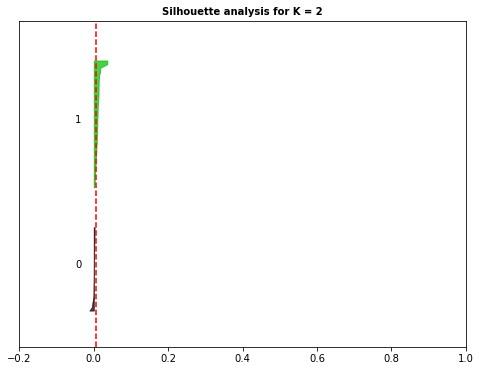

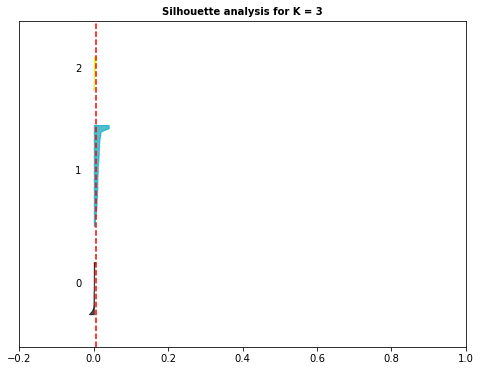

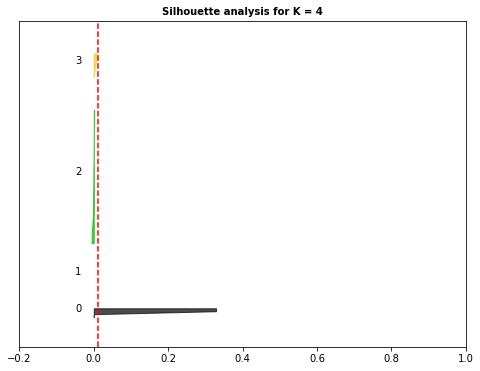

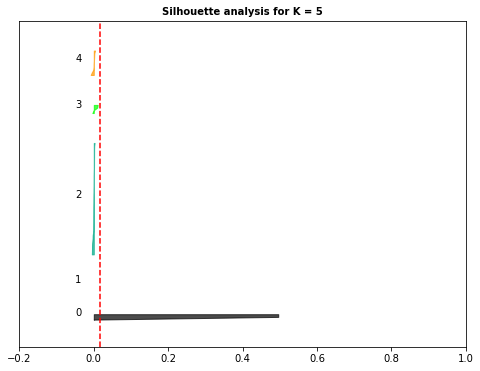

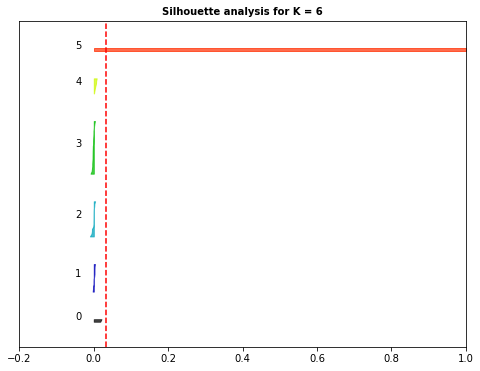

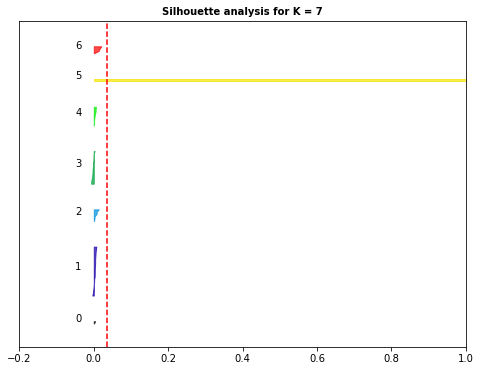

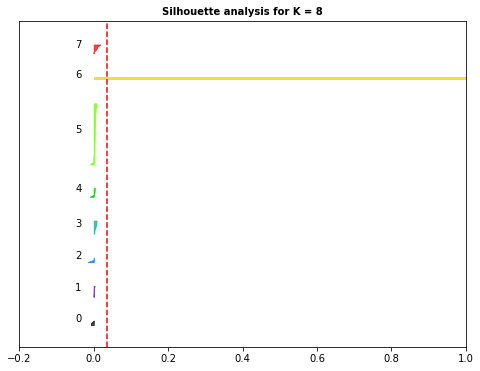

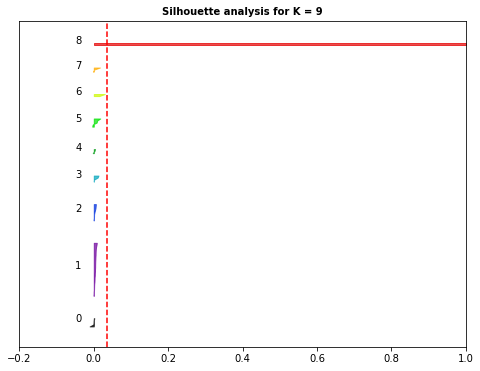

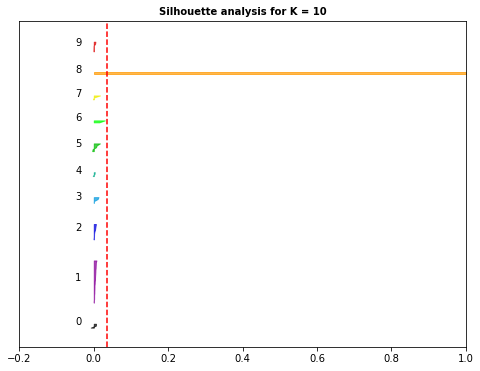

In [14]:
silhouette(kmeans_results, final_df, plot=True)

In [15]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

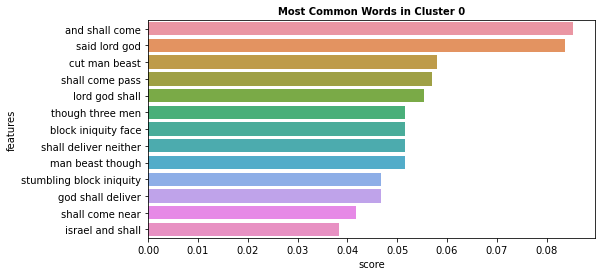

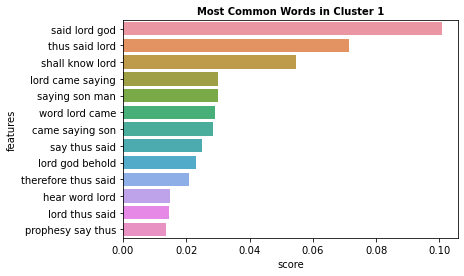

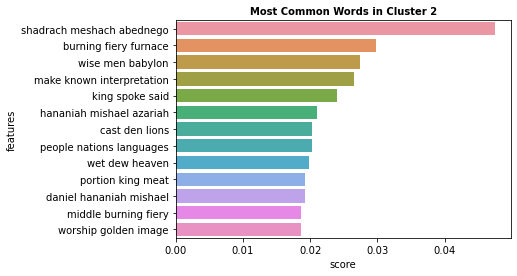

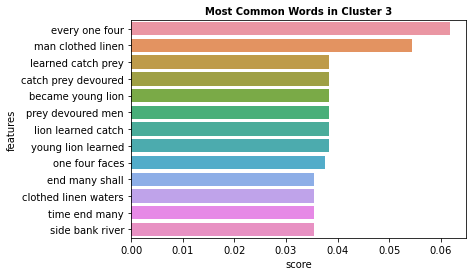

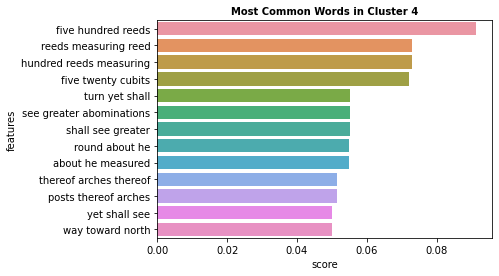

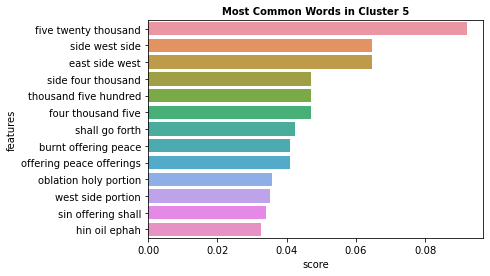

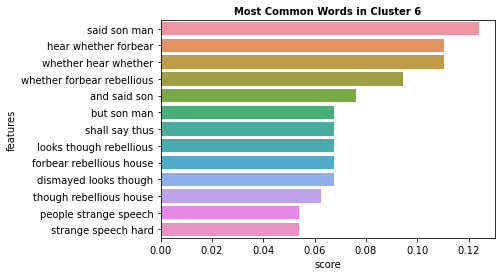

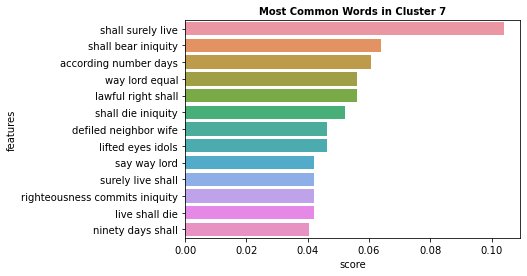

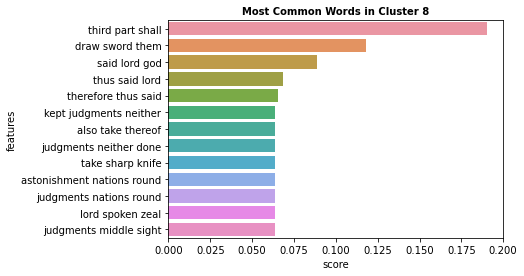

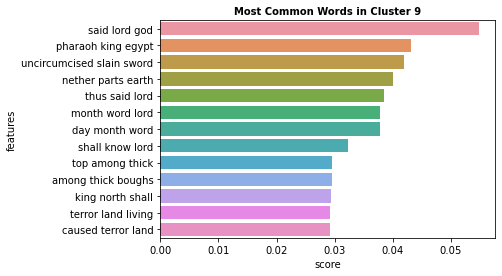

In [16]:
best_result = 10
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [17]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

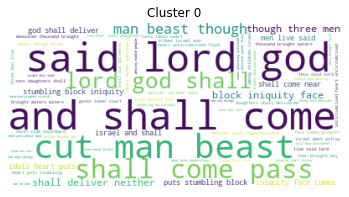

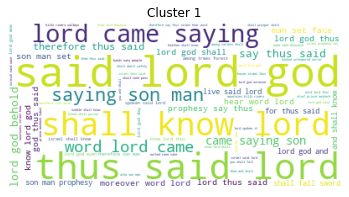

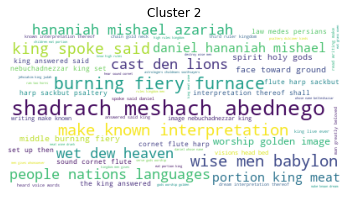

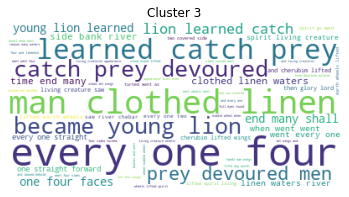

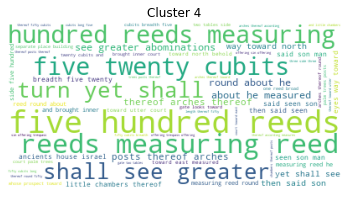

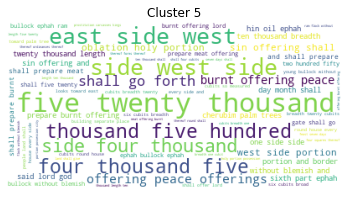

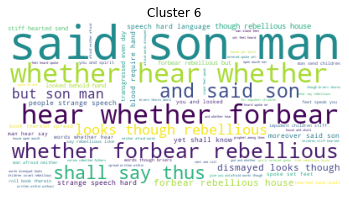

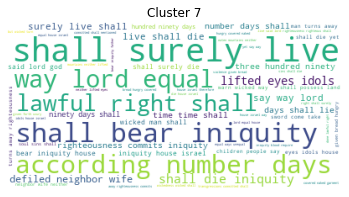

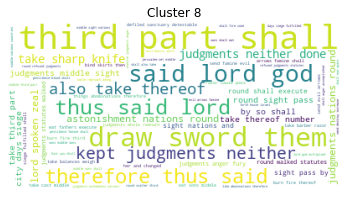

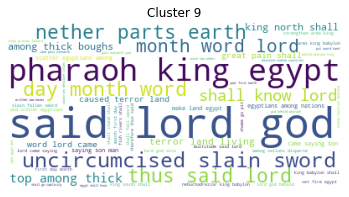

In [18]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [19]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Ezequiel_1,"'came', 'pass', 'thirtieth', 'year', ',', 'fou...",3
101,Ezequiel_2,"'said', ',', 'son', 'man', ',', 'stand', 'feet...",6
102,Ezequiel_3,"'moreover', 'said', ',', 'son', 'man', ',', 'e...",6
103,Ezequiel_4,"'also', ',', 'son', 'man', ',', 'take', 'tile'...",7
104,Ezequiel_5,"',', 'son', 'man', ',', 'take', 'sharp', 'knif...",8


In [20]:
print(df)

           Autor                                              Livro  label
100   Ezequiel_1  'came', 'pass', 'thirtieth', 'year', ',', 'fou...      3
101   Ezequiel_2  'said', ',', 'son', 'man', ',', 'stand', 'feet...      6
102   Ezequiel_3  'moreover', 'said', ',', 'son', 'man', ',', 'e...      6
103   Ezequiel_4  'also', ',', 'son', 'man', ',', 'take', 'tile'...      7
104   Ezequiel_5  ',', 'son', 'man', ',', 'take', 'sharp', 'knif...      8
105   Ezequiel_6  'word', 'lord', 'came', ',', 'saying', ',', 's...      1
106   Ezequiel_7  'moreover', 'word', 'lord', 'came', ',', 'sayi...      1
107   Ezequiel_8  'came', 'pass', 'sixth', 'year', ',', 'sixth',...      4
108   Ezequiel_9  ',', 'son', 'man', ',', 'take', 'sharp', 'knif...      8
109  Ezequiel_10  'looked', ',', ',', 'behold', ',', 'firmament'...      3
110  Ezequiel_11  'moreover', 'spirit', 'lifted', ',', 'brought'...      1
111  Ezequiel_12  'word', 'lord', 'also', 'came', ',', 'saying',...      1
112  Ezequiel_13  'word',